# Module 771767 - Applied Artificial Intelligence
# Natural Language Processing - Text(Topic) Classification with AG News Data

### Student ID: 202403820 | Samuel Datubo Jaja
### MSc Artificial Intelligence & Data Science | DAIM - Data-Science Artificial Intelligence & Modelling

# Installing and importing Libraries for AG News Dataset Processing 

In [1]:
"""
Applied AI Environment Setup and Configuration
Required for Text Classification with AG News Dataset
"""

"""
Important Setup Notes:
1. When using Jupyter Notebook, restart the kernel after installing packages
  to avoid ModuleNotFoundError: No module named 'datasets'
2. Matplotlib and Seaborn upgrades are crucial for proper confusion matrix visualization
3. All dependencies must be installed before importing any project modules
"""
#System and Environment Configuration
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages for cleaner output

# Package Installation and Updates
# Note: Execute these commands separately and restart kernel if using Jupyter Notebook
# Update visualization libraries for proper confusion matrix rendering
import subprocess
subprocess.run(['pip', 'install', '--upgrade', 'matplotlib', 'seaborn'])

# Install required machine learning and NLP packages
# Dependencies: datasets, transformers, tensorflow, scikit-learn, nltk
subprocess.run(['pip', 'install', 
              'datasets', 
              'transformers', 
              'tensorflow', 
              'scikit-learn', 
              'nltk'])

print("IMPORTANT: Please restart your Jupyter kernel now to ensure all packages are properly loaded.")

IMPORTANT: Please restart your Jupyter kernel now to ensure all packages are properly loaded.


## Loading Dataset at Runtime from Hugging Face

In [2]:
# Suppress all warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import required libraries
from datasets import load_dataset  # For loading the AG News dataset
import pandas as pd  # For data manipulation and DataFrame creation

# Print status message to indicate dataset loading
print("Loading AG News Dataset...")

# Load the AG News dataset from Hugging Face's datasets library
# This dataset contains news articles categorized into different topics
dataset = load_dataset("ag_news")

# Create training DataFrame with two columns:
# 'text': contains the news article text
# 'label': contains the category/classification
train_data = pd.DataFrame({
    'text': dataset['train']['text'], 
    'label': dataset['train']['label']
})

# Create testing DataFrame with the same structure
# This will be used to evaluate the model's performance
test_data = pd.DataFrame({
    'text': dataset['test']['text'], 
    'label': dataset['test']['label']
})

Loading AG News Dataset...


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

### Exploratory Data Analysis 

In [3]:
#Having of view of train data on pandas
train_data

text  label
0       Wall St. Bears Claw Back Into the Black (Reute...      2
1       Carlyle Looks Toward Commercial Aerospace (Reu...      2
2       Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3       Iraq Halts Oil Exports from Main Southern Pipe...      2
4       Oil prices soar to all-time record, posing new...      2
...                                                   ...    ...
119995  Pakistan's Musharraf Says Won't Quit as Army C...      0
119996  Renteria signing a top-shelf deal Red Sox gene...      1
119997  Saban not going to Dolphins yet The Miami Dolp...      1
119998  Today's NFL games PITTSBURGH at NY GIANTS Time...      1
119999  Nets get Carter from Raptors INDIANAPOLIS -- A...      1

[120000 rows x 2 columns]

In [4]:
#Having of view of test data on pandas
test_data

text  label
0     Fears for T N pension after talks Unions repre...      2
1     The Race is On: Second Private Team Sets Launc...      3
2     Ky. Company Wins Grant to Study Peptides (AP) ...      3
3     Prediction Unit Helps Forecast Wildfires (AP) ...      3
4     Calif. Aims to Limit Farm-Related Smog (AP) AP...      3
...                                                 ...    ...
7595  Around the world Ukrainian presidential candid...      0
7596  Void is filled with Clement With the supply of...      1
7597  Martinez leaves bitter Like Roger Clemens did ...      1
7598  5 of arthritis patients in Singapore take Bext...      2
7599  EBay gets into rentals EBay plans to buy the a...      2

[7600 rows x 2 columns]

In [5]:
import textwrap

#Specify the row you want to view
row_index = 2  # Adjust as needed
full_text = train_data.iloc[row_index]['text']

#Wrap the text to a specific line width
wrapped_text = textwrap.fill(full_text, width=50)  # Width is the max number of characters per line

#display the wrapped text
print(wrapped_text)

Oil and Economy Cloud Stocks' Outlook (Reuters)
Reuters - Soaring crude prices plus worries\about
the economy and the outlook for earnings are
expected to\hang over the stock market next week
during the depth of the\summer doldrums.


### AG News Data Word Cloud
The AG News dataset is a widely used benchmark for text classification tasks, particularly within the Natural Language Processing (NLP) domain. It comprises a total of 127,600 samples, with 120,000 designated for training and 7,600 for testing. Each sample includes a news article title and description, accompanied by a label indicating one of four categories: World, Sports, Business, or Sci/Tech. This dataset is particularly suitable for text classification problems due to its balanced class distribution; each category contains an equal number of samples, which helps prevent model bias toward any single class. Additionally, the dataset's structure—comprising concise textual data—facilitates efficient preprocessing and model training. The AG News dataset's balance and clear structure make it an excellent choice for developing and evaluating NLP models focused on news topic classification, it is readily accessible through the Hugging Face platform. 

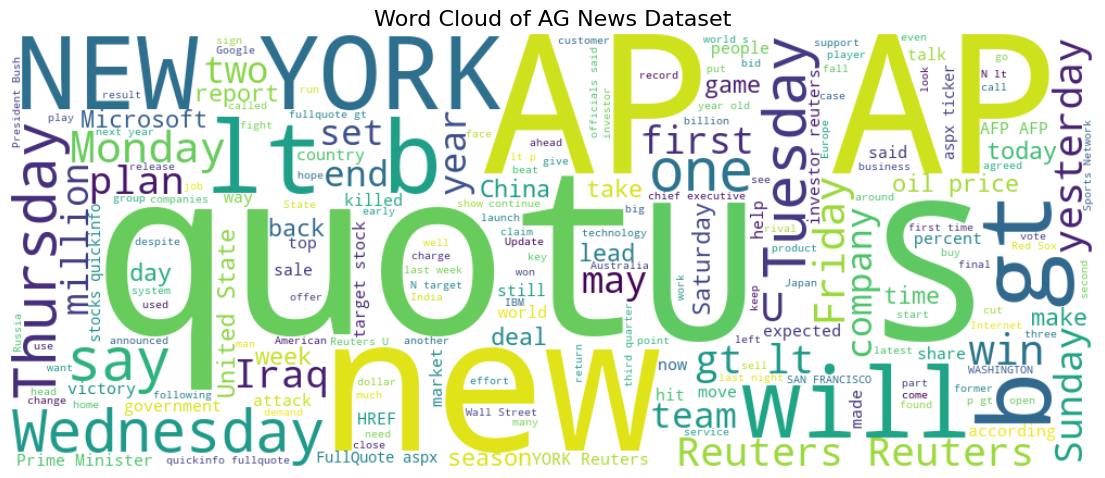

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Combine all text from the dataset into a single string
all_text = " ".join(train_data['text'])

#Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_text)

#Display the Word Cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of AG News Dataset", fontsize=16)
plt.savefig("Word_Cloud_of_AG_News_Dataset.png")
plt.show()

### AG News Word Cloud for Specific Categories/Classes

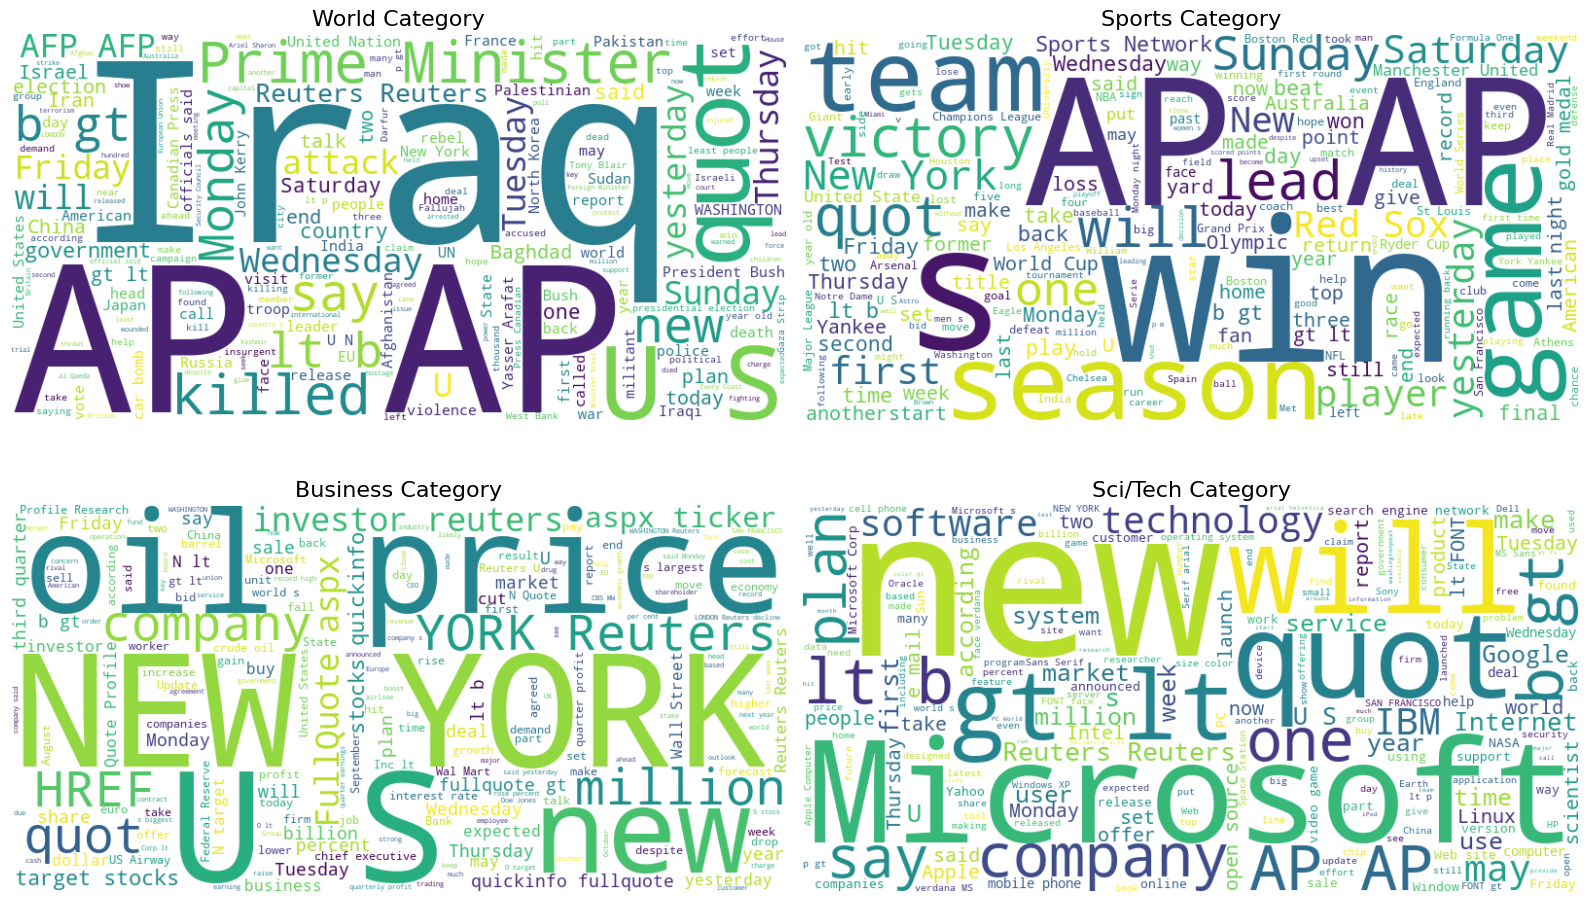

In [7]:
#categories in the dataset
categories = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}

#initialize a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  #2x2 grid for 4 categories
axes = axes.flatten()  #Flatten the 2D array of axes for easier iteration

#generate and display word clouds for each category
for idx, (label, category_name) in enumerate(categories.items()):
    category_text = " ".join(train_data[train_data['label'] == label]['text'])

    #generate the WordCloud with boundaries
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        contour_color='black',  # Color for the boundary
        contour_width=2         # Width of the boundary
    ).generate(category_text)

    #plot the word cloud in the corresponding subplot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis("off")  # Hide axes
    axes[idx].set_title(f"{category_name} Category", fontsize=16)  # Add a title to each subplot

#Adjust layout and display the figure
plt.tight_layout()
plt.savefig("Word_Cloud_Categories.png")
plt.show()


### Class Imbalance Check and Visualization 

Class Distribution
Category-wise Counts:
label
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64
Category-wise Proportions:
label
Business    25.00%
Sci/Tech    25.00%
Sports      25.00%
World       25.00%
Name: proportion, dtype: object


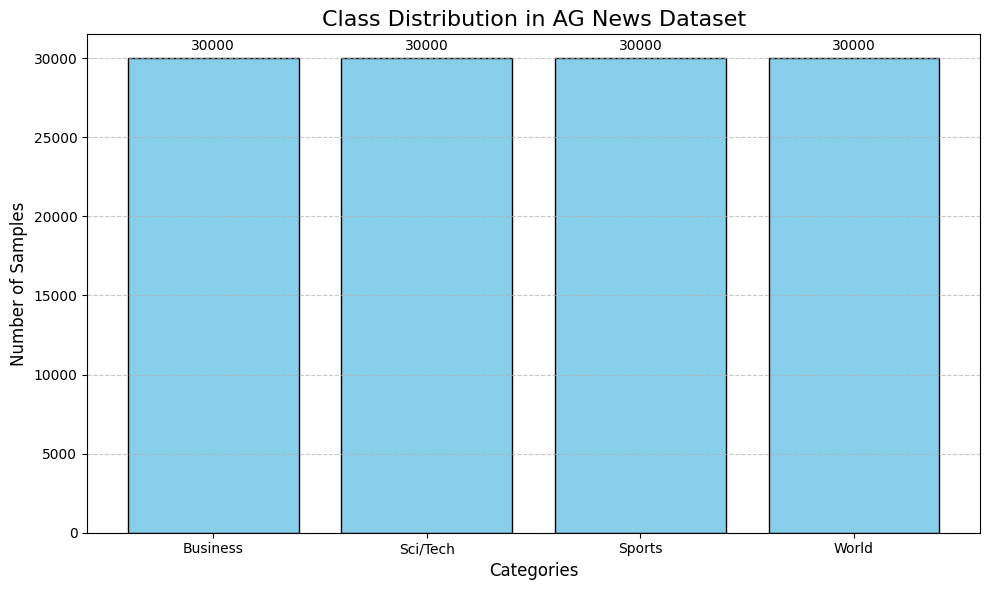

In [8]:
#definiing Category Mapping
categories = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}

#analyze Class Distribution
#count the number of instances per class and calculate proportions
class_counts = train_data['label'].value_counts()
class_proportions = train_data['label'].value_counts(normalize=True)

#map class indices to category names for better readability
category_names = [categories[label] for label in class_counts.index]

#displaying the e class counts 
print("Class Distribution")
print("Category-wise Counts:")
print(class_counts.rename(index=categories))
print("Category-wise Proportions:")
print(class_proportions.rename(index=categories).apply(lambda x: f"{x:.2%}"))  #Display proportions as percentages

#visualizing the Class Distribution
#creating a bar chart for class distribution
plt.figure(figsize=(10, 6))
plt.bar(category_names, class_counts.values, color='skyblue', edgecolor='black')
plt.title("Class Distribution in AG News Dataset", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

#add value annotations on top of each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 500, f"{count}", ha='center', fontsize=10)

#display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("AG_News_Class_Distribution.png")
plt.show()



Stopword removal is a common preprocessing step in traditional ML models (e.g., Naive Bayes, Random Forest, SVM) because these models rely on bag-of-words or TF-IDF representations, where frequent stopwords can add noise and affect performance. In contrast, deep learning models like LSTMs, BiLSTMs, and Transformers can automatically assign low weights to stopwords during training due to their ability to learn contextual importance, making explicit stopword removal unnecessary. This is a key reason for having separate preprocessing pipelines for Traditional Models (TM) and Deep Learning Models (DL).

In [9]:
import sklearn
print(sklearn.__version__) #verifying sklearn version

1.4.2


# Preprocessing for Traditional ML Models (Naive Bayes & Random Forest)

In [10]:
#Importing libraries for Traditional Ml Preporcessing and Modelling 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay

#Downloading required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
#shared Traditional ML Preprocessing Class
class TextPreprocessor:
    """
    A class for preprocessing text data for machine learning tasks.
    
    This class handles text cleaning, vectorization using TF-IDF, and dimensionality 
    reduction using PCA if specified. It's designed for processing text datasets
    for traditional machine learning algorithms.

    Attributes:
        vectorizer_params (dict): Parameters for TfidfVectorizer initialization
        vectorizer (TfidfVectorizer): Instance of TfidfVectorizer
        pca (PCA): Optional PCA transformer for dimensionality reduction
    """
    def __init__(self, vectorizer_params=None, pca_params=None):
        """
        Initialize the TextPreprocessor with vectorizer and PCA parameters.
        
        Args:
            vectorizer_params (dict, optional): Parameters for TfidfVectorizer. Defaults to {"max_features": 5000}
            pca_params (dict, optional): Parameters for PCA. Defaults to None
        """
        self.vectorizer_params = vectorizer_params or {"max_features": 5000}
        self.vectorizer = TfidfVectorizer(**self.vectorizer_params)
        self.pca = PCA(**pca_params) if pca_params else None
        
    def preprocess(self, train_data, test_data, apply_pca=False, for_rf=False):
        #text Cleaning Function
        def clean_text(text):
            lemmatizer = WordNetLemmatizer()
            stop_words = set(stopwords.words("english"))

            #Remove non-alphabetic characters and convert to lowercase
            text = re.sub(r"[^a-z\s]", "", text.lower())

            #Tokenize, remove stopwords, and lemmatize
            tokens = text.split()
            cleaned_tokens = [
                lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
            ]

            #join tokens back into a single string
            return " ".join(cleaned_tokens)

        #cleaning and Vectorizing
        train_data["cleaned_text"] = train_data["text"].apply(clean_text)
        test_data["cleaned_text"] = test_data["text"].apply(clean_text)
        X_train = self.vectorizer.fit_transform(train_data["cleaned_text"])
        X_test = self.vectorizer.transform(test_data["cleaned_text"])

        #apply PCA only if specified and it's for Random Forest
        if apply_pca and for_rf and self.pca:
            print("Applying PCA for Random Forest...")
            X_train = self.pca.fit_transform(X_train.toarray())
            X_test = self.pca.transform(X_test.toarray())

        return X_train, X_test, train_data["label"], test_data["label"]

    @staticmethod
    def plot_confusion_matrix(conf_matrix, class_names, title):
        """Plot a confusion matrix with class names."""
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(title)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.savefig("confusion_matrix_random_forest.png") #saving the last and modt optimal
        plt.show()

# Traditional ML Models (Naive Bayes & Random Forest) Class Implemenattion 

In [15]:
#Naive Bayes Model Class
class NaiveBayesModel:
    """
    A class implementing a Naive Bayes classifier with evaluation metrics.

    This class wraps scikit-learn's MultinomialNB classifier and provides methods
    for training, evaluation, and visualization of model performance through
    ROC curves and Precision-Recall curves.

    Attributes:
       alpha (float): Smoothing parameter for Naive Bayes (Laplace/Lidstone smoothing)
       model (MultinomialNB): Scikit-learn's Multinomial Naive Bayes classifier instance
    """
   
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model = MultinomialNB(alpha=self.alpha)

    def train(self, X_train, y_train):
        print("Training Naive Bayes...")
        self.model.fit(X_train, y_train)

    def plot_precision_recall_curve(y_test, y_pred_prob, model_name):
        disp = PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=y_pred_prob, name=model_name)
        disp.plot()
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.show()

    
    def evaluate(self, X_test, y_test, class_names):
        print("Evaluating Naive Bayes...")
        y_pred = self.model.predict(X_test)
        y_pred_prob = self.model.predict_proba(X_test)[:, 1]  #gets the probabilities for the positive class
        accuracy = accuracy_score(y_test, y_pred)

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name="Naive Bayes").plot()
        plt.title("ROC Curve - Naive Bayes")
        plt.tight_layout()
        plt.savefig("roc_curve.png")
        plt.show()

        # Plot Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label=1)
        PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name="Naive Bayes").plot()
        plt.title("Precision-Recall Curve - Naive Bayes")
        plt.tight_layout()            
        plt.savefig("precision_recall_curve.png")
        plt.show()

        return accuracy

In [16]:
# Random Forest Model Class
class RandomForestModel:
    """
    A class implementing a Random Forest classifier with evaluation metrics.
   
    This class wraps scikit-learn's RandomForestClassifier and provides methods
    for training and evaluation, including confusion matrix visualization and
    classification report generation.

    Attributes:
       rf_params (dict): Parameters for RandomForestClassifier initialization
       model (RandomForestClassifier): Scikit-learn's Random Forest classifier instance
    """
    
    def __init__(self, rf_params=None): 
        self.rf_params = rf_params or {"n_estimators": 100, "max_depth": None, "random_state": 42}
        self.model = RandomForestClassifier(**self.rf_params)

    def train(self, X_train, y_train):
        print("Training Random Forest...")
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test, class_names):
        print("Evaluating Random Forest...")
        y_pred = self.model.predict(X_test)
        y_pred_prob = self.model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)

        print(classification_report(y_test, y_pred))
        conf_matrix = confusion_matrix(y_test, y_pred)
        TextPreprocessor.plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix - Random Forest")

        return accuracy

In [17]:
class_names = ["World", "Sports", "Sci/Tech", "Business"]  #list of class names

#initialize Preprocessor
preprocessor = TextPreprocessor(vectorizer_params={"max_features": 1000})

#preprocess Data for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = preprocessor.preprocess(train_data, test_data, apply_pca=False)

# Naive Bayes Model

Training Naive Bayes...
Evaluating Naive Bayes...


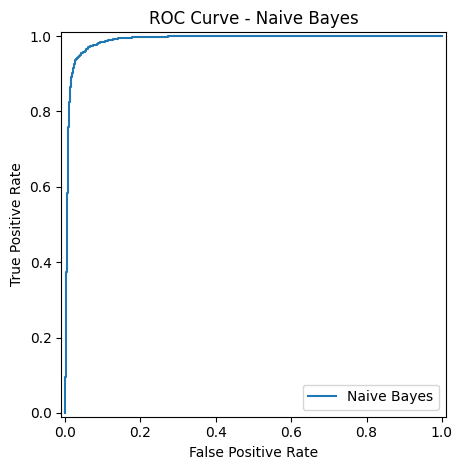

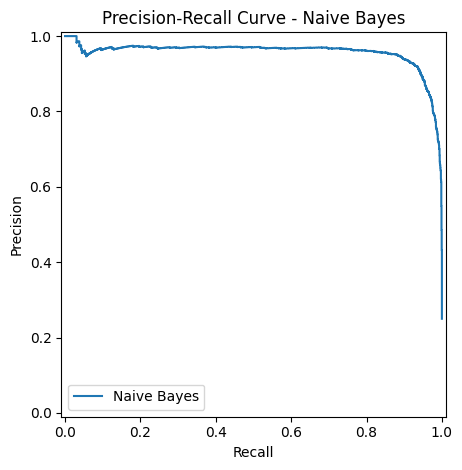

Naive Bayes Accuracy: 0.8533


In [18]:
#Naive Bayes Model Initialization and Training
nb_model = NaiveBayesModel(alpha=0.01)  #Initialize model with Laplace smoothing parameter
nb_model.train(X_train_nb, y_train_nb)  #Train model on preprocessed training data

#Model Evaluation
nb_accuracy = nb_model.evaluate(X_test_nb, y_test_nb, class_names)  #Evaluate on test data & generate plots
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")  #Display accuracy score to 4 decimal places

Training Naive Bayes...
Evaluating Naive Bayes...


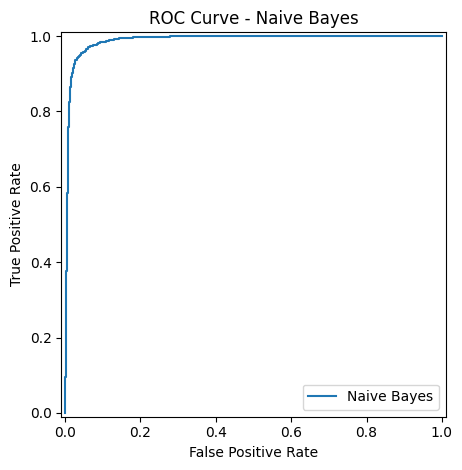

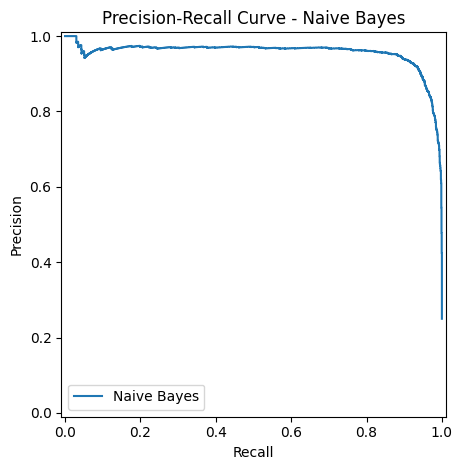

Naive Bayes Accuracy: 0.8536


In [19]:
# Naive Bayes Model with alpha=0.1
nb_model = NaiveBayesModel(alpha=0.1)
nb_model.train(X_train_nb, y_train_nb)
nb_accuracy = nb_model.evaluate(X_test_nb, y_test_nb, class_names)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Training Naive Bayes...
Evaluating Naive Bayes...


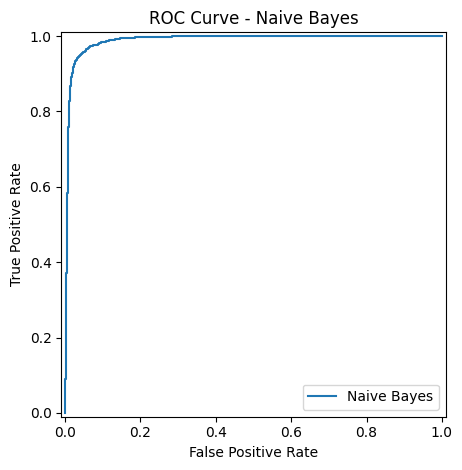

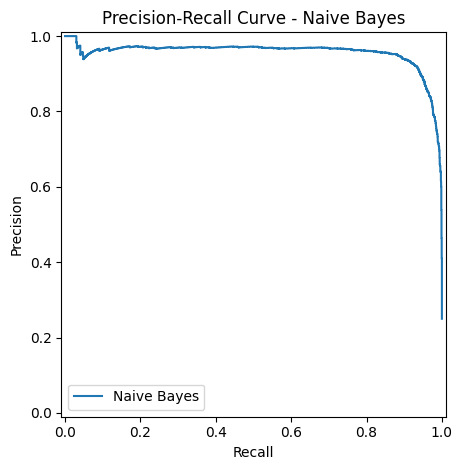

Naive Bayes Accuracy: 0.8538


In [20]:
# Naive Bayes Model alpha=0.6
nb_model = NaiveBayesModel(alpha=0.6)
nb_model.train(X_train_nb, y_train_nb)
nb_accuracy = nb_model.evaluate(X_test_nb, y_test_nb, class_names)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Training Naive Bayes...
Evaluating Naive Bayes...


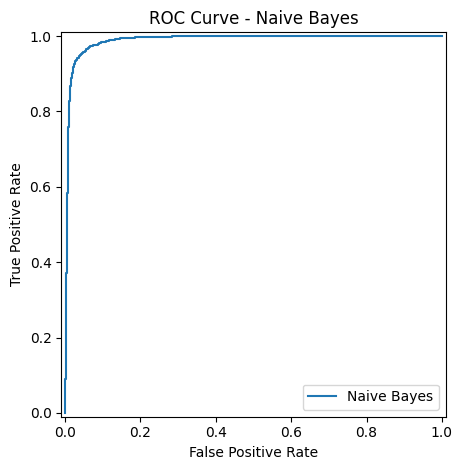

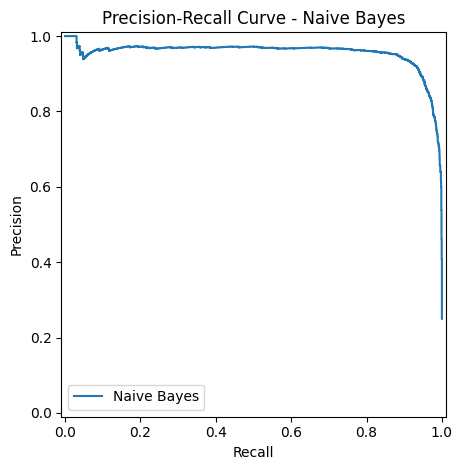

Naive Bayes Accuracy: 0.8537


In [21]:
# Naive Bayes Model alpha=0.7
nb_model = NaiveBayesModel(alpha=0.7)
nb_model.train(X_train_nb, y_train_nb)
nb_accuracy = nb_model.evaluate(X_test_nb, y_test_nb, class_names)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Training Naive Bayes...
Evaluating Naive Bayes...


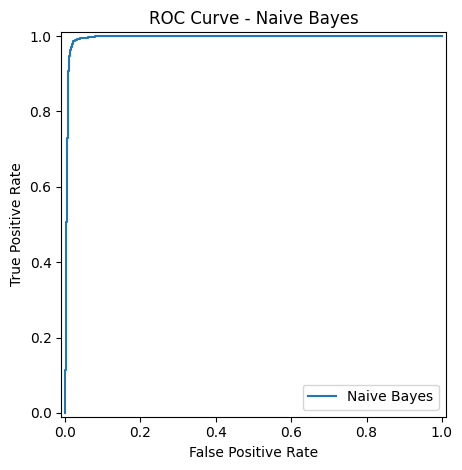

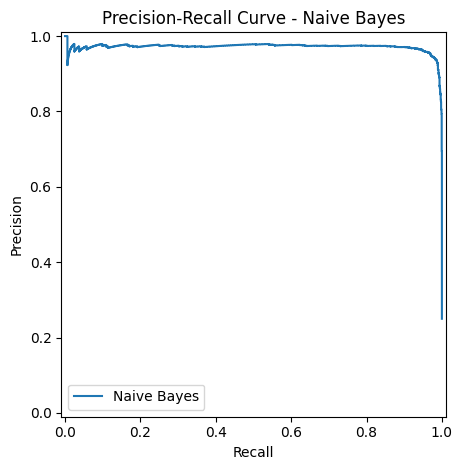

Naive Bayes Accuracy: 0.8970


In [22]:
#Initialize Preprocessor with max_features of 10000
preprocessor = TextPreprocessor(vectorizer_params={"max_features": 10000})

#Preprocess Data for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = preprocessor.preprocess(train_data, test_data, apply_pca=False)

#Naive Bayes Model with alpha 0.8
nb_model = NaiveBayesModel(alpha=0.8)
nb_model.train(X_train_nb, y_train_nb)
nb_accuracy = nb_model.evaluate(X_test_nb, y_test_nb, class_names)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Random Forest Model

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1900
           1       0.84      0.88      0.86      1900
           2       0.79      0.73      0.76      1900
           3       0.66      0.75      0.70      1900

    accuracy                           0.78      7600
   macro avg       0.79      0.78      0.78      7600
weighted avg       0.79      0.78      0.78      7600



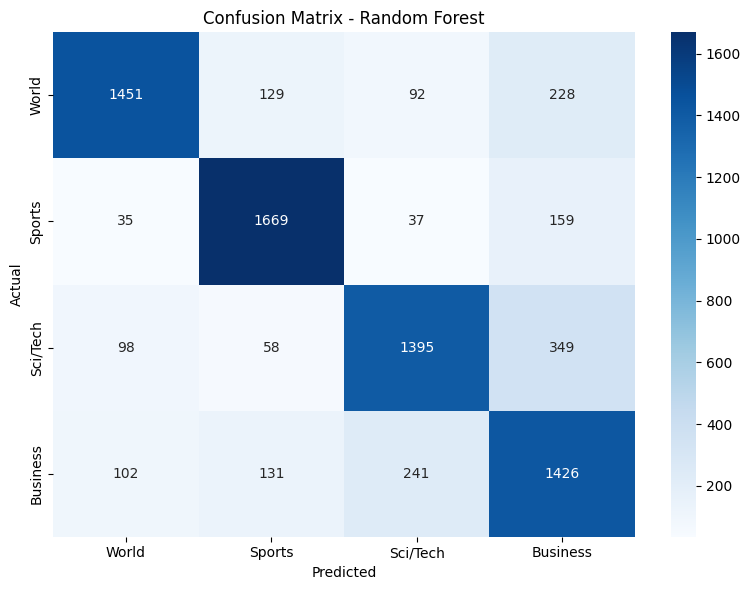

Random Forest Accuracy: 0.7817


In [23]:
#Preprocess Data for Random Forest Model
#Apply dimensionality reduction with PCA for better computational efficiency
X_train_rf, X_test_rf, y_train_rf, y_test_rf = preprocessor.preprocess(
   train_data, 
   test_data, 
   apply_pca=True,  #Enable PCA transformation
   for_rf=True      #Specify preprocessing is for Random Forest
)

#Random Forest Model Initialization and Training
rf_model = RandomForestModel(
   rf_params={
       "n_estimators": 50,     #Number of trees in the forest
       "max_depth": 10,        #Maximum depth of each tree
       "random_state": 42      #Seed for reproducibility
   }
)
rf_model.train(X_train_rf, y_train_rf)  #Train model on preprocessed data

#Model Evaluation
rf_accuracy = rf_model.evaluate(X_test_rf, y_test_rf, class_names)  #Evaluate and generate visualizations
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")  #Display accuracy score to 4 decimal places

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1900
           1       0.85      0.91      0.88      1900
           2       0.81      0.74      0.78      1900
           3       0.72      0.77      0.74      1900

    accuracy                           0.81      7600
   macro avg       0.81      0.81      0.81      7600
weighted avg       0.81      0.81      0.81      7600



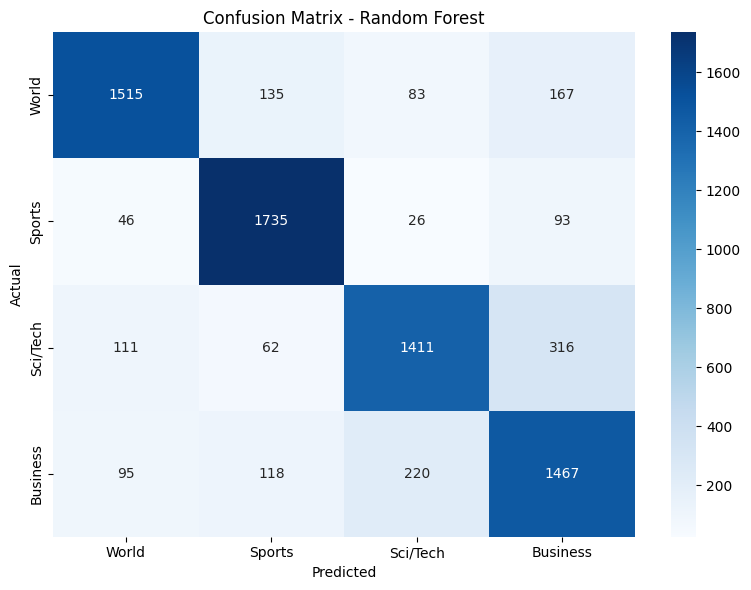

Random Forest Accuracy: 0.8063


In [24]:
#Random Forest Model with "n_estimators": 150, "max_depth": 10
rf_model = RandomForestModel(rf_params={"n_estimators": 150, "max_depth": 10, "random_state": 42})
rf_model.train(X_train_rf, y_train_rf)
rf_accuracy = rf_model.evaluate(X_test_rf, y_test_rf, class_names)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1900
           1       0.84      0.93      0.88      1900
           2       0.81      0.73      0.77      1900
           3       0.73      0.78      0.76      1900

    accuracy                           0.81      7600
   macro avg       0.81      0.81      0.81      7600
weighted avg       0.81      0.81      0.81      7600



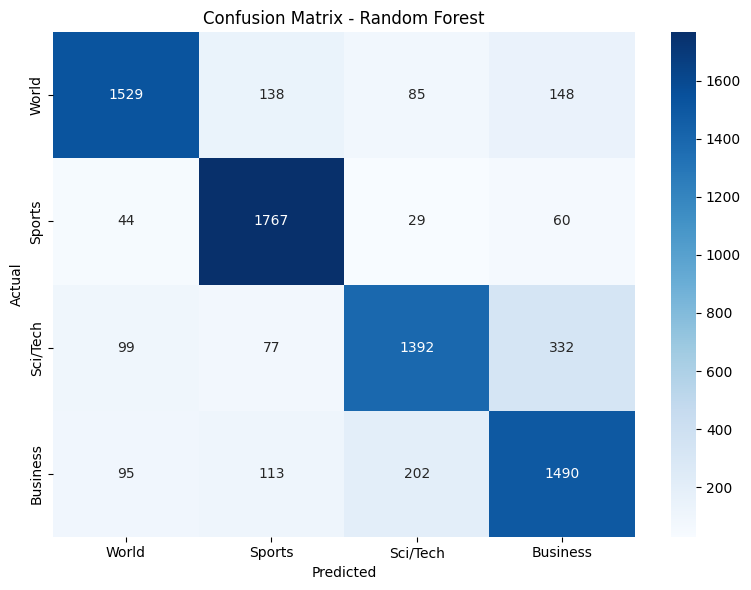

Random Forest Accuracy: 0.8129


In [25]:
#Random Forest Model n_estimators": 400, "max_depth": 10
rf_model = RandomForestModel(rf_params={"n_estimators": 400, "max_depth": 10, "random_state": 42})
rf_model.train(X_train_rf, y_train_rf)
rf_accuracy = rf_model.evaluate(X_test_rf, y_test_rf, class_names)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1900
           1       0.81      0.95      0.87      1900
           2       0.83      0.75      0.79      1900
           3       0.80      0.78      0.79      1900

    accuracy                           0.83      7600
   macro avg       0.83      0.83      0.82      7600
weighted avg       0.83      0.83      0.82      7600



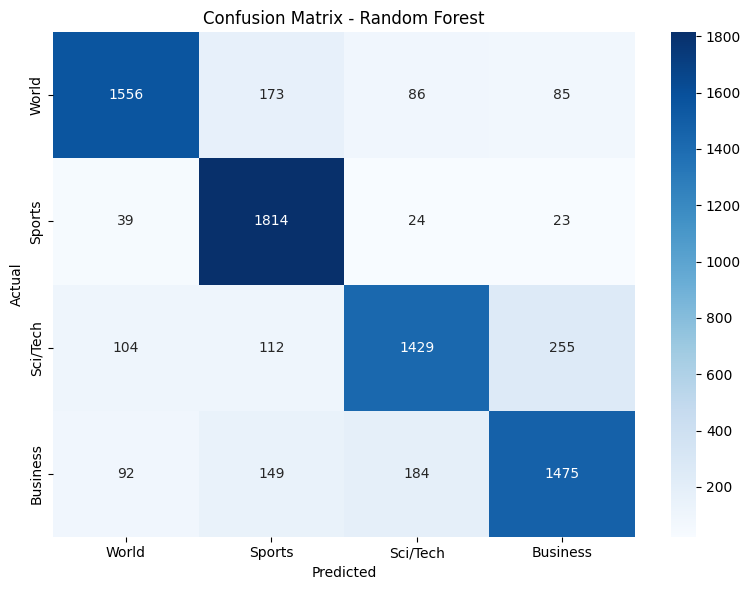

Random Forest Accuracy: 0.8255


In [26]:
#Random Forest Model n_estimators": 500, "max_depth": 20
rf_model = RandomForestModel(rf_params={"n_estimators": 500, "max_depth": 20, "random_state": 42})
rf_model.train(X_train_rf, y_train_rf)
rf_accuracy = rf_model.evaluate(X_test_rf, y_test_rf, class_names)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1900
           1       0.84      0.96      0.89      1900
           2       0.84      0.77      0.81      1900
           3       0.81      0.80      0.81      1900

    accuracy                           0.84      7600
   macro avg       0.84      0.84      0.84      7600
weighted avg       0.84      0.84      0.84      7600



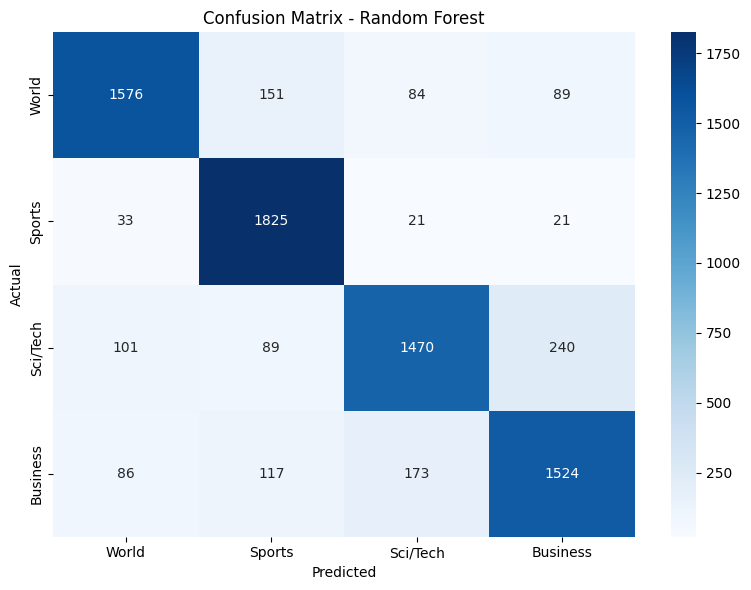

Random Forest Accuracy: 0.8414


In [27]:
# Random Forest Model n_estimators": 1000, "max_depth": 30
rf_model = RandomForestModel(rf_params={"n_estimators": 1000, "max_depth": 30, "random_state": 42})
rf_model.train(X_train_rf, y_train_rf)
rf_accuracy = rf_model.evaluate(X_test_rf, y_test_rf, class_names)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Deep Learning Models (LSTM & Bi-LSTM) - Class and Functions Implementation 

These models took longer to run especially Bi-LSTM even on DAIM PCs, had to use a bit of Colab for compute, runnig cells here can be demanding compared to the traditional models

In [12]:
#importing DL required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

In [13]:
# Defining the DynamicDeepLearningModels class
class DynamicDeepLearningModels:
    def __init__(self, max_words=10000, max_length=50, embedding_dim=128, batch_size=32, epochs=15):
        self.max_words = max_words  # Vocabulary size
        self.max_length = max_length  # Sequence length
        self.embedding_dim = embedding_dim  # Embedding dimensions
        self.batch_size = batch_size  # Batch size
        self.epochs = epochs  # Maximum epochs
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.history = None
        self.model = Sequential()  # Start with an empty model

    def preprocess(self, train_data, test_data):
        """Tokenize, pad, and preprocess the input data."""
        print("Tokenizing and padding sequences...")
        self.tokenizer.fit_on_texts(train_data['text'])

        X_train_seq = self.tokenizer.texts_to_sequences(train_data['text'])
        X_test_seq = self.tokenizer.texts_to_sequences(test_data['text'])

        X_train_padded = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        X_test_padded = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        y_train = tf.convert_to_tensor(train_data['label'], dtype=tf.int32)
        y_test = tf.convert_to_tensor(test_data['label'], dtype=tf.int32)

        return X_train_padded, X_test_padded, y_train, y_test

    def add_embedding_layer(self):
        """Add embedding layer."""
        self.model.add(Embedding(input_dim=self.max_words, output_dim=self.embedding_dim))

    def load_pretrained_embeddings(self, glove_path):
        """Load pretrained GloVe embeddings and create an embedding matrix."""
        print("Loading GloVe embeddings...")
        embeddings_index = {}
        with open(glove_path, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                vector = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = vector

        print(f"Loaded {len(embeddings_index)} word vectors.")

        #Create the embedding matrix
        embedding_matrix = np.zeros((self.max_words, self.embedding_dim))
        for word, i in self.tokenizer.word_index.items():
            if i >= self.max_words:
                continue
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # Words not found in embedding index will be all zeros
                embedding_matrix[i] = embedding_vector

        print("Embedding matrix created.")
        return embedding_matrix

    def add_pretrained_embedding(self, embedding_matrix, trainable=False):
        """Add pre-trained embedding layer."""
        print("Adding pre-trained embedding layer...")
    
        # Verify input_dim and output_dim compatibility
        input_dim, output_dim = embedding_matrix.shape
    
        # Explicitly define the embeddings_initializer instead of weights
        embedding_layer = Embedding(
            input_dim=input_dim,
            output_dim=output_dim,
            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
            trainable=trainable
        )
        self.model.add(embedding_layer)

    def add_lstm_layer(self, units=128, dropout_rate=0.2, recurrent_dropout=0.2):
        """Add LSTM layer dynamically."""
        print("Adding LSTM layer...")
        self.model.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout))

    def add_bilstm_layer(self, units=128, dropout_rate=0.2, recurrent_dropout=0.2):
        """Add BiLSTM layer dynamically."""
        print("Adding BiLSTM layer...")
        self.model.add(Bidirectional(LSTM(units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout)))

    def add_dense_layer(self, units=128, dropout_rate=0.1, activation='relu', batch_norm=False):
        """Add Dense and optional Batch Normalization layer dynamically."""
        if batch_norm:
            print("Adding Batch Normalization...")
            self.model.add(BatchNormalization())
        self.model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            self.model.add(Dropout(dropout_rate))

    def compile_model(self, optimizer='adam', learning_rate=0.001, loss='sparse_categorical_crossentropy', metrics=['accuracy']):
        print("Compiling model...")
        if optimizer == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.add(Dense(4, activation='softmax'))
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def train(self, X_train, y_train, X_val, y_val):
        """Train the model with EarlyStopping."""
        print("Training model...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=self.epochs,
            batch_size=self.batch_size,
            callbacks=[early_stopping]
        )

    def evaluate(self, X_test, y_test):
        """Evaluate the model and print accuracy."""
        print("Evaluating model...")
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Accuracy: {accuracy:.4f}")
        return accuracy

    def plot_metrics(self):
        """Plot training and validation accuracy/loss curves."""
        history_dict = self.history.history
        plt.figure(figsize=(10, 5))
        plt.plot(history_dict['accuracy'], label='Training Accuracy')
        plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(history_dict['loss'], label='Training Loss')
        plt.plot(history_dict['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


    def plot_confusion_matrix(self, X_test, y_test, class_names, filename="confusion_matrix.png"):
        """Generate, display, and save a confusion matrix."""
        print("Generating confusion matrix...")
        y_pred = np.argmax(self.model.predict(X_test), axis=-1)
        conf_matrix = confusion_matrix(y_test.numpy(), y_pred)
    
        # Adjust figure size, resolution, and annotation font size
        plt.figure(figsize=(8, 6), dpi=120)  # Larger size and higher resolution
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 10})  # Adjust font size
        plt.title('Confusion Matrix', fontsize=14)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.tight_layout()  # Prevent clipping
    
        # Save directly to the current directory
        plt.savefig(filename, dpi=120)
        print(f"Confusion matrix saved as '{filename}' in the current directory.")
    
        plt.show()
 
    def plot_roc_auc(self, X_test, y_test, class_names):
        """
        Plot ROC-AUC curves for multi-class classification.
        """
        print("Generating ROC-AUC curves...")
        y_test_bin = label_binarize(y_test.numpy(), classes=[0, 1, 2, 3])  # One-hot encode labels
        y_pred_prob = self.model.predict(X_test)  # Predict probabilities

        plt.figure(figsize=(10, 7))
        for i in range(len(class_names)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # Compute FPR and TPR
            roc_auc = auc(fpr, tpr)  # Calculate AUC
            plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')  # Plot ROC curve

        # Add diagonal reference line
        plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
        plt.title("ROC-AUC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    def plot_prediction_confidence(self, X_test, y_test, filename="prediction_confidence.png"):
        """
        Plot the distribution of prediction confidence scores.
        Separate correct vs. incorrect predictions.
        """
        print("Plotting prediction confidence...")
        y_pred_prob = self.model.predict(X_test)  # Get prediction probabilities
        y_pred = np.argmax(y_pred_prob, axis=-1)  # Convert probabilities to predicted classes
        y_test_array = y_test.numpy()  # Convert tensor to numpy array
    
        # Confidence is the max probability of the predicted class
        confidence_scores = np.max(y_pred_prob, axis=-1)
    
        # Separate correct and incorrect predictions
        correct_confidences = confidence_scores[y_pred == y_test_array]
        incorrect_confidences = confidence_scores[y_pred != y_test_array]
    
        # Plot the confidence scores
        plt.figure(figsize=(10, 6))
        sns.histplot(correct_confidences, color="green", label="Correct Predictions", kde=True, bins=30)
        sns.histplot(incorrect_confidences, color="red", label="Incorrect Predictions", kde=True, bins=30)
        plt.title("Prediction Confidence Distribution")
        plt.xlabel("Confidence Score")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()

        # Save the plot
        plt.savefig(filename)
        print(f"Prediction confidence plot saved as '{filename}'.")
        plt.show

    def plot_misclassification_analysis(self, X_test, y_test, class_names, filename="misclassification_analysis.png"):
        """
        Plot a heatmap of misclassified examples.
        Shows which classes are most commonly confused.
        """
        print("Plotting misclassification analysis...")
        y_pred = np.argmax(self.model.predict(X_test), axis=-1)
        conf_matrix = confusion_matrix(y_test.numpy(), y_pred)
    
        # Normalize the confusion matrix to show proportions of misclassifications
        conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1, keepdims=True)
    
        # Set diagonal elements (correct classifications) to 0 for better visualization of misclassifications
        np.fill_diagonal(conf_matrix_normalized, 0)
    
        # Plot the misclassification heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Reds",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title("Misclassification Analysis Heatmap")
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.tight_layout()
    
        # Save the plot
        plt.savefig(filename)
        print(f"Misclassification analysis heatmap saved as '{filename}'.")
        plt.show()


    def generate_classification_report(self, X_test, y_test, class_names):
        """Generate and print classification report."""
        print("Generating classification report...")
        y_pred = np.argmax(self.model.predict(X_test), axis=-1)
        report = classification_report(y_test.numpy(), y_pred, target_names=class_names)
        print(report)

In [14]:
print("Working with AG News Dataset which is already Loaded...")

# Initialize Class and Preprocess Data
model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

Working with AG News Dataset which is already Loaded...
Tokenizing and padding sequences...


# Long Short-Term Memory - LSTM

LSTM - Deep Learning Class Initialization and Function Invocation/Call for Model Building, Training and Evaluation

---LSTM Model ---
Adding LSTM layer...
Compiling model...
Training model...
Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 73s 19ms/step - accuracy: 0.5989 - loss: 0.8561 - val_accuracy: 0.9039 - val_loss: 0.3022
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 68s 18ms/step - accuracy: 0.9157 - loss: 0.2692 - val_accuracy: 0.9151 - val_loss: 0.2578
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.9345 - loss: 0.2070 - val_accuracy: 0.9161 - val_loss: 0.2513
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 19ms/step - accuracy: 0.9438 - loss: 0.1676 - val_accuracy: 0.9128 - val_loss: 0.2634
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.9545 - loss: 0.1321 - val_accuracy: 0.9155 - val_loss: 0.2708
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.9637 - loss: 0.1041 - val_accuracy: 0.9155 - val_loss: 0.2918
Evaluating model...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9158 - loss: 0.2644
Test Accuracy: 0.9161


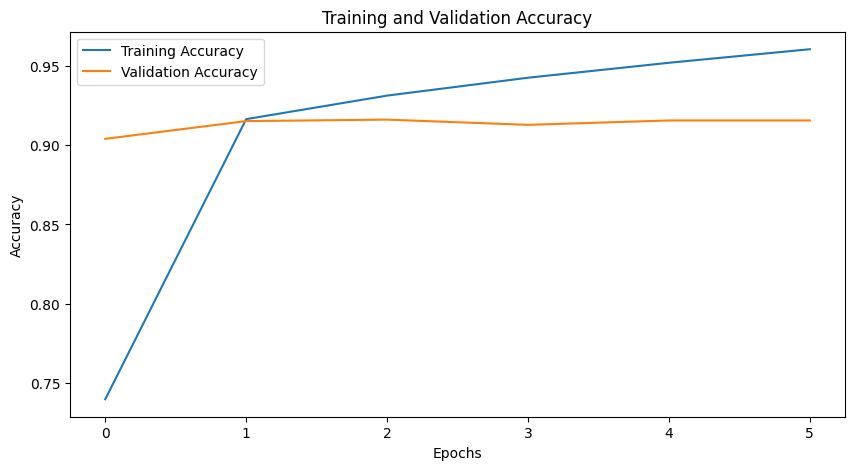

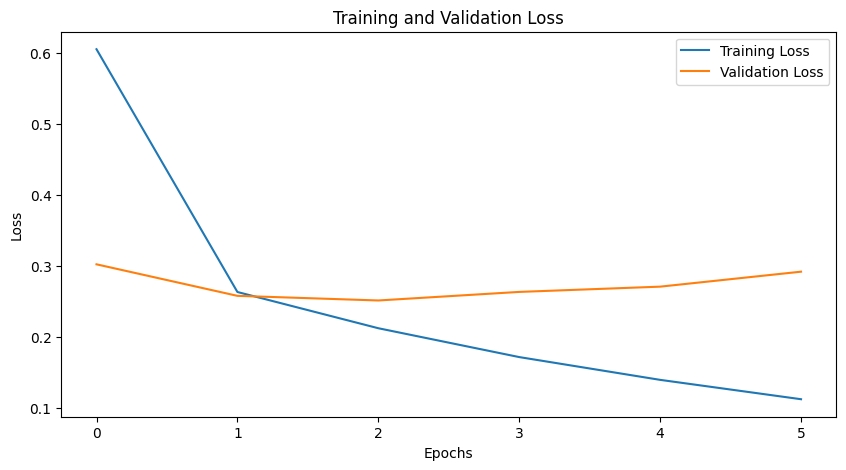

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


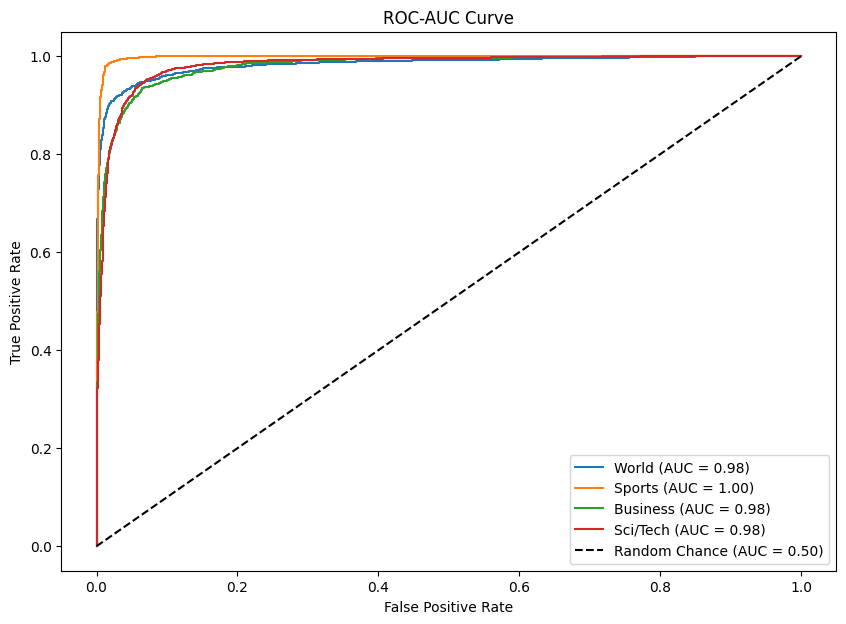

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

       World       0.94      0.90      0.92      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.90      0.87      0.88      1900
    Sci/Tech       0.87      0.91      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


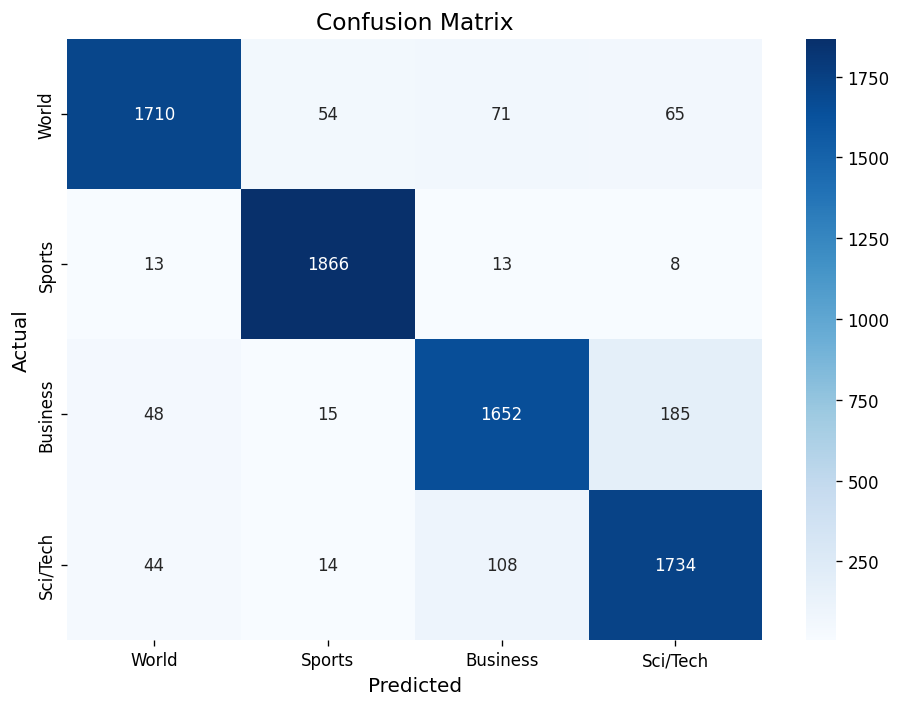

In [19]:
#Build and Train Dynamic LSTM 
print("---LSTM Model ---")
model.add_embedding_layer()
model.add_lstm_layer(units=128)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)


### LSTM Refinement 1: Hyperparameter tuning with dropout_rate=0.5, recurrent_dropout=0.5, epochs=20 

Tokenizing and padding sequences...

--- Dynamic LSTM Model ---
Adding LSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 151s 40ms/step - accuracy: 0.3709 - loss: 1.2777 - val_accuracy: 0.5091 - val_loss: 0.9471
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 146s 39ms/step - accuracy: 0.7045 - loss: 0.7047 - val_accuracy: 0.9024 - val_loss: 0.2977
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 147s 39ms/step - accuracy: 0.9068 - loss: 0.3120 - val_accuracy: 0.9136 - val_loss: 0.2727
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 148s 39ms/step - accuracy: 0.9228 - loss: 0.2542 - val_accuracy: 0.9122 - val_loss: 0.2583
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 160s 43ms/step - accuracy: 0.9283 - loss: 0.2285 - val_accuracy: 0.9149 - val_loss: 0.2642
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 149s 40ms/step - accuracy: 0.9345 - loss: 0.2092 - val_accuracy: 0.9133 - val_loss: 0.2595
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 149s 40m

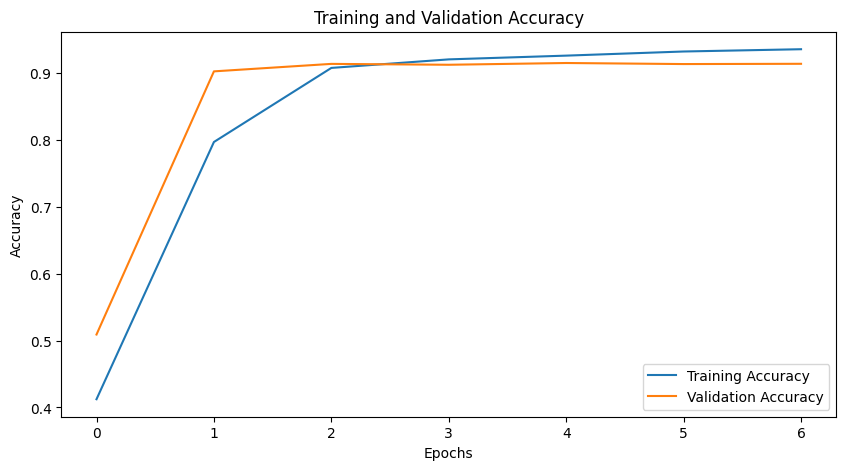

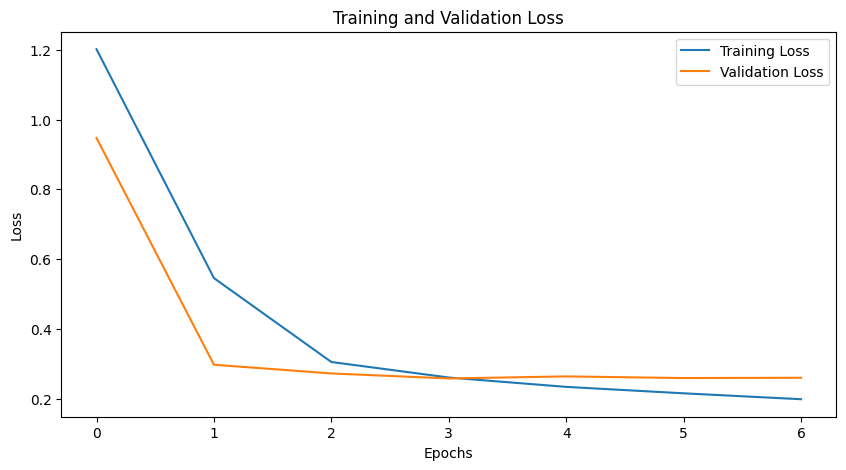

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


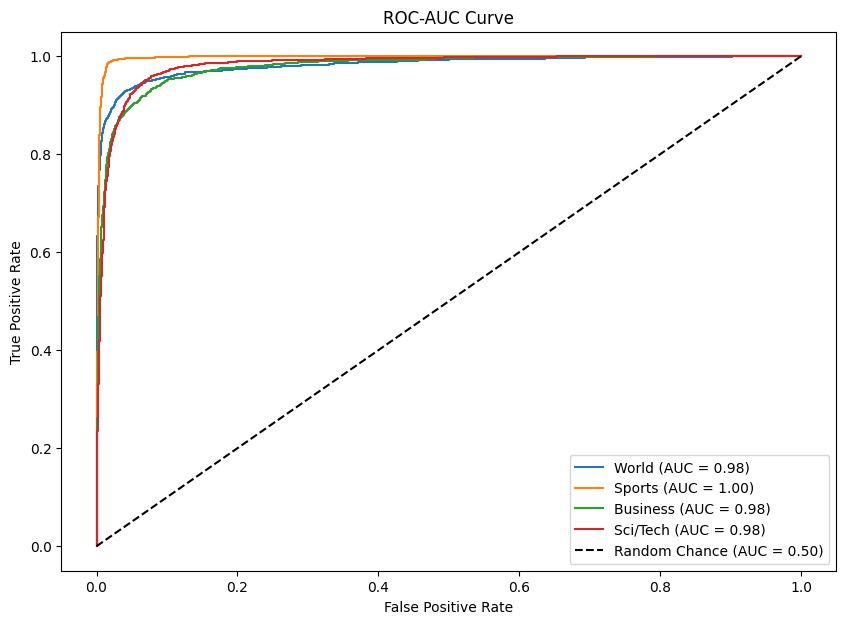

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
              precision    recall  f1-score   support

       World       0.93      0.89      0.91      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.89      0.88      0.88      1900
    Sci/Tech       0.88      0.90      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


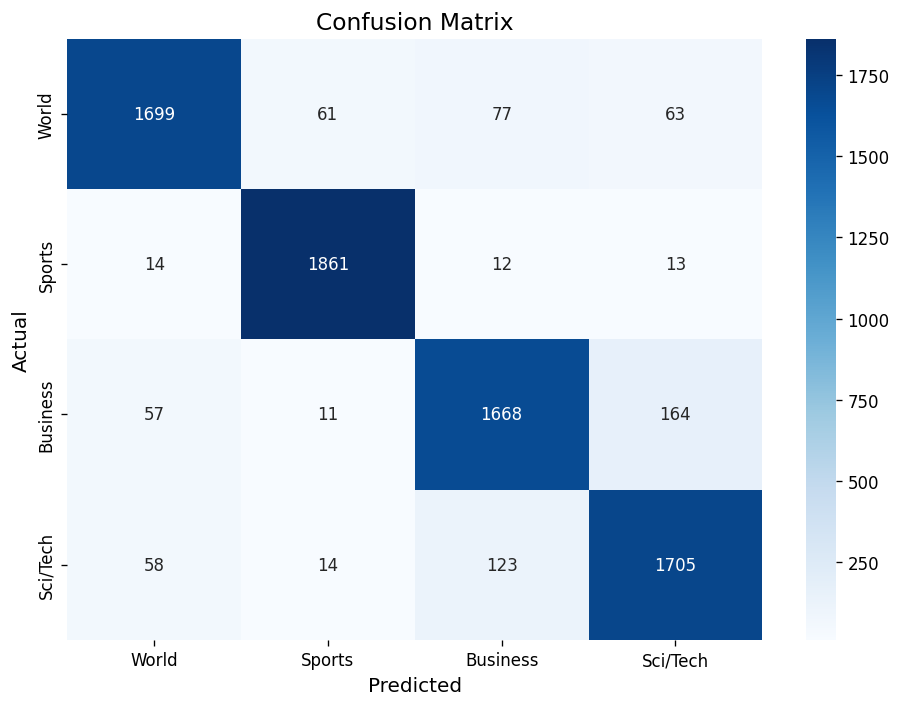

In [20]:
# Initialize Class and Preprocess Data
model = DynamicDeepLearningModels(epochs=20)
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Build and Train Dynamic LSTM
print("\n--- Dynamic LSTM Model ---")
model.add_embedding_layer()
model.add_lstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.5)
model.add_dense_layer(units=64, dropout_rate=0.4, activation='relu', batch_norm=True)
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

### LSTM Refinement 2: Hyperparameter tuning with dropout_rate=0.5, recurrent_dropout=0.4, learning_rate=0.0001

Tokenizing and padding sequences...

--- Dynamic LSTM Model ---
Adding LSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.3793 - loss: 1.2711 - val_accuracy: 0.8670 - val_loss: 0.4956
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 89s 24ms/step - accuracy: 0.7919 - loss: 0.5780 - val_accuracy: 0.8972 - val_loss: 0.3351
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 94s 25ms/step - accuracy: 0.8774 - loss: 0.4050 - val_accuracy: 0.9047 - val_loss: 0.3100
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 78s 21ms/step - accuracy: 0.9019 - loss: 0.3476 - val_accuracy: 0.9091 - val_loss: 0.3081
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 88s 23ms/step - accuracy: 0.9089 - loss: 0.3241 - val_accuracy: 0.9034 - val_loss: 0.3048
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 87s 23ms/step - accuracy: 0.9161 - loss: 0.3042 - val_accuracy: 0.9092 - val_loss: 0.3130
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 103s 28ms/step

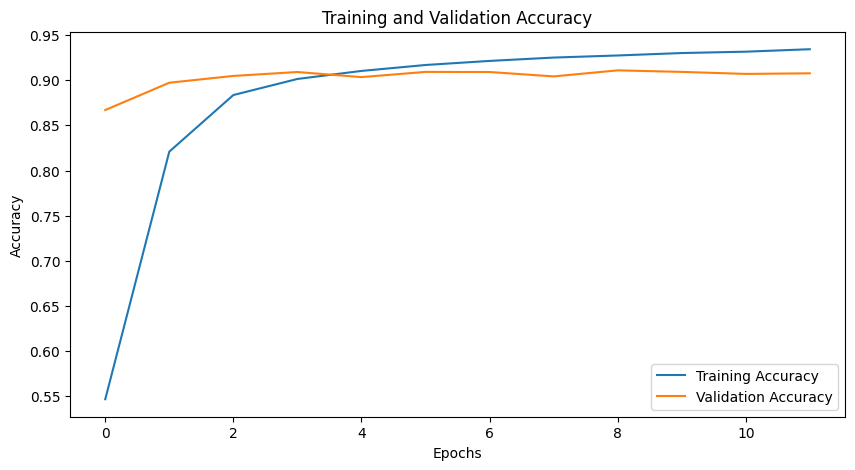

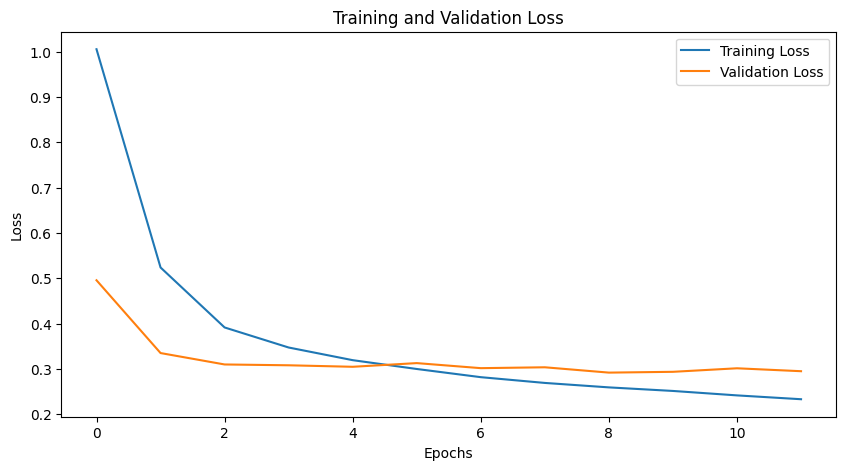

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


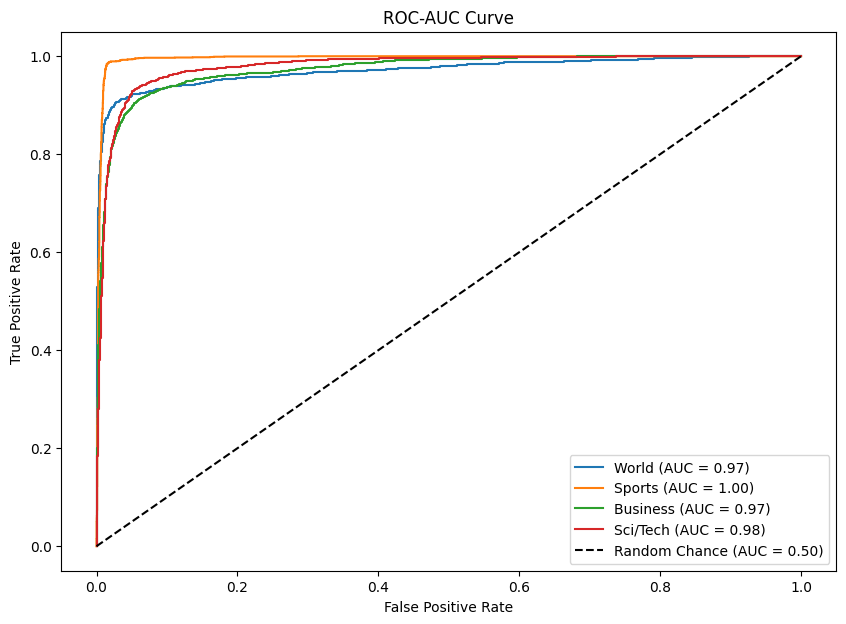

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
              precision    recall  f1-score   support

       World       0.94      0.89      0.91      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.86      0.89      0.87      1900
    Sci/Tech       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


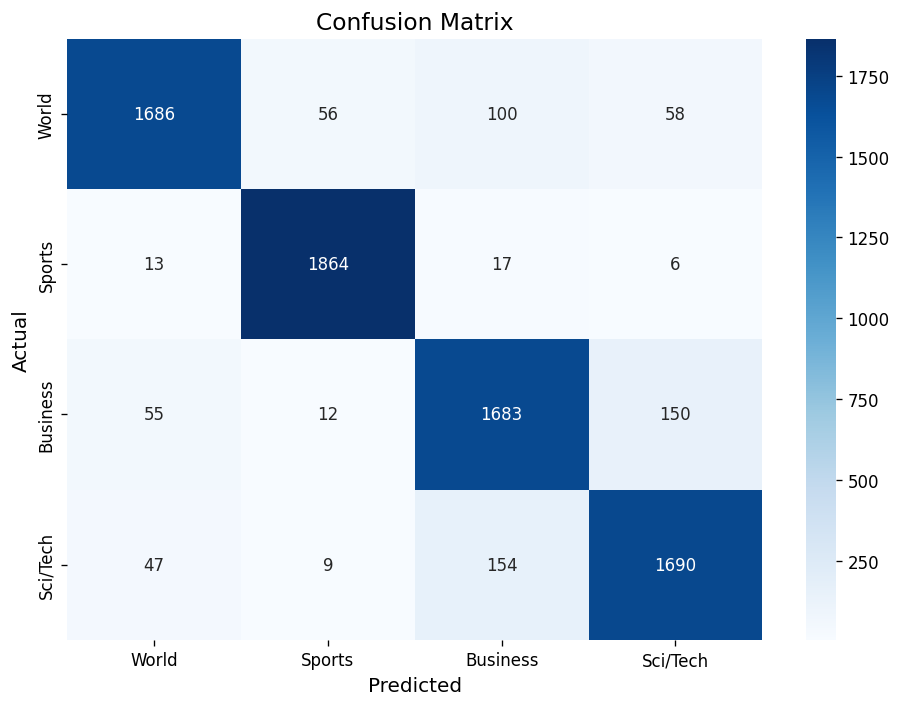

In [21]:
# Initialize Class and Preprocess Data
model = DynamicDeepLearningModels(epochs=20)
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Build and Train Dynamic LSTM
print("\n--- Dynamic LSTM Model ---")
model.add_embedding_layer()
model.add_lstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=64, dropout_rate=0.3, activation='relu', batch_norm=True)
model.compile_model(learning_rate=0.0001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

### LSTM Refinement 3: Hyperparameter tuning with lstm_dropout_rate=0.5, recurrent_dropout=0.4, dense_dropout_rate=0.3, epoch = 30

Tokenizing and padding sequences...

--- Dynamic LSTM Model ---
Adding LSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.3770 - loss: 1.2673 - val_accuracy: 0.8501 - val_loss: 0.5057
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - accuracy: 0.7877 - loss: 0.5827 - val_accuracy: 0.8876 - val_loss: 0.3488
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 78s 21ms/step - accuracy: 0.8709 - loss: 0.4184 - val_accuracy: 0.8970 - val_loss: 0.3264
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 85s 23ms/step - accuracy: 0.8934 - loss: 0.3655 - val_accuracy: 0.9033 - val_loss: 0.3169
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 136s 21ms/step - accuracy: 0.9054 - loss: 0.3313 - val_accuracy: 0.9049 - val_loss: 0.3149
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9116 - loss: 0.3146 - val_accuracy: 0.9078 - val_loss: 0.3068
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step

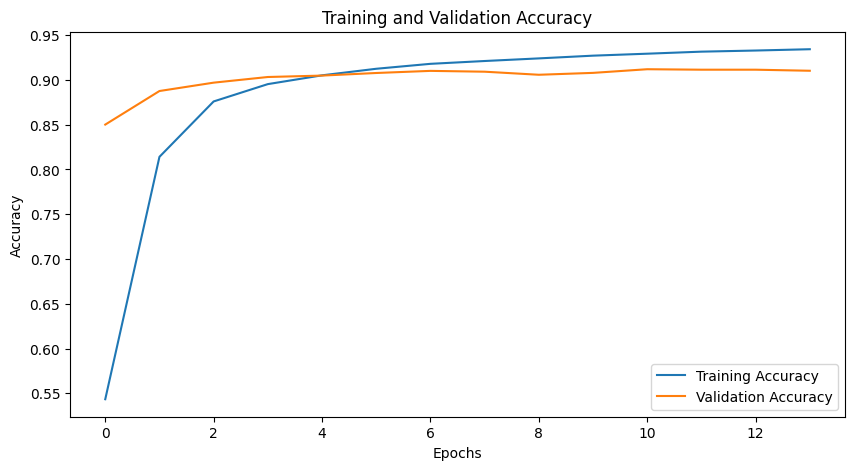

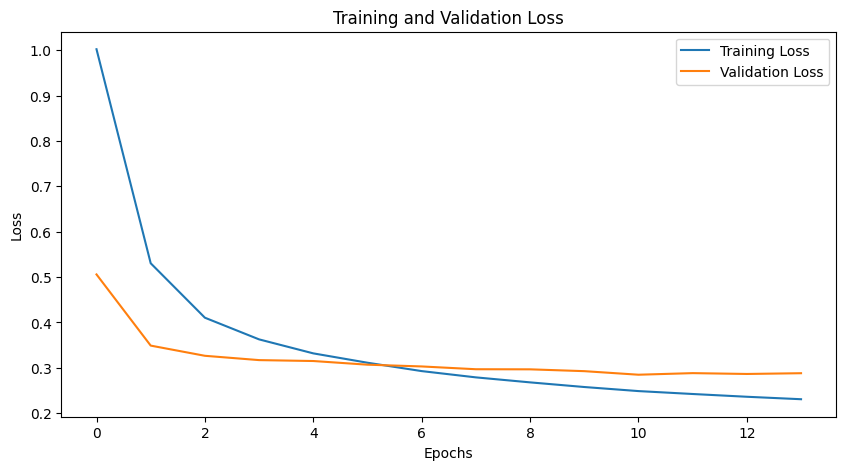

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


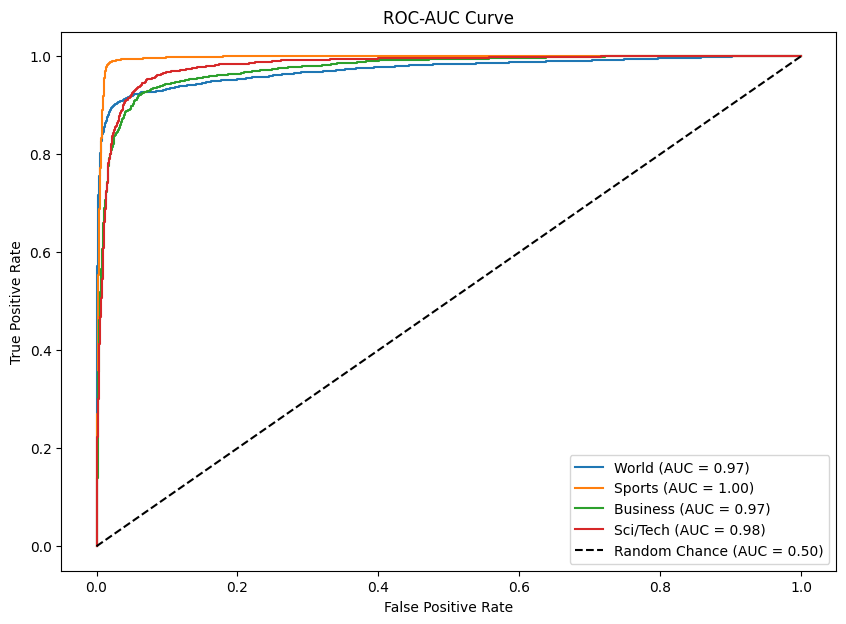

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

       World       0.91      0.90      0.91      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.88      0.88      0.88      1900
    Sci/Tech       0.90      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


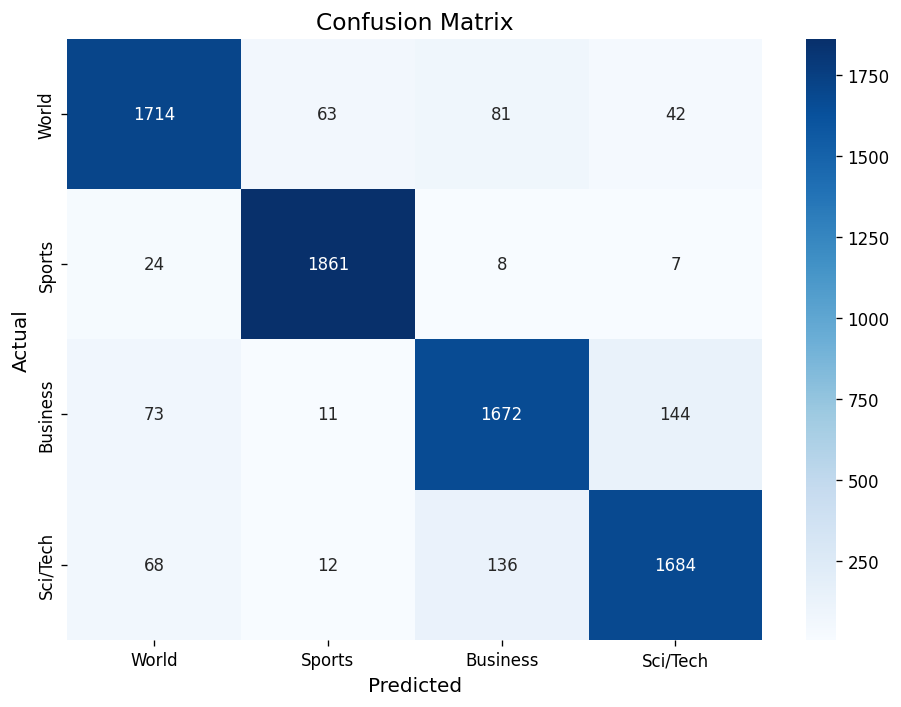

In [22]:
# Initialize Class and Preprocess Data
model = DynamicDeepLearningModels(epochs=30) # Increased epoch to 30
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Build and Train Dynamic LSTM
print("\n--- Dynamic LSTM Model ---")
model.add_embedding_layer()
model.add_lstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=64, dropout_rate=0.3, activation='relu', batch_norm=True)
model.compile_model(learning_rate=0.0001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

### LSTM Refinement 4: GloVe Embeddings file with trainable=False

### Hyperparameter tuning with lstm_dropout_rate=0.5, recurrent_dropout=0.4, dense_dropout_rate=0.3, epoch = 40

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding LSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 57s 15ms/step - accuracy: 0.4475 - loss: 1.2552 - val_accuracy: 0.8549 - val_loss: 0.4455
Epoch 2/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.7735 - loss: 0.6554 - val_accuracy: 0.8720 - val_loss: 0.3947
Epoch 3/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.8173 - loss: 0.5497 - val_accuracy: 0.8818 - val_loss: 0.3561
Epoch 4/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - accuracy: 0.8343 - loss: 0.4904 - val_accuracy: 0.8855 - val_loss: 0.3384
Epoch 5/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 53s 14ms/step - accuracy: 0.8481 - loss: 0.4483 - val_accuracy: 0.8872 - val_loss: 0.3300
Epoch 6/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 53s 14

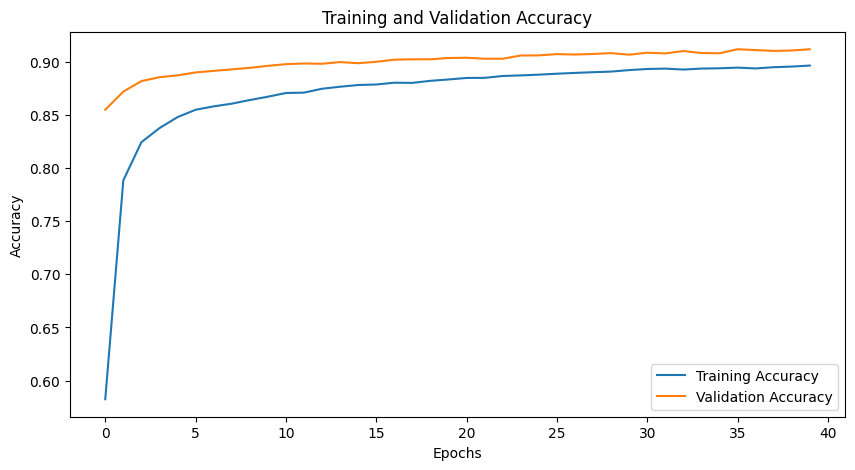

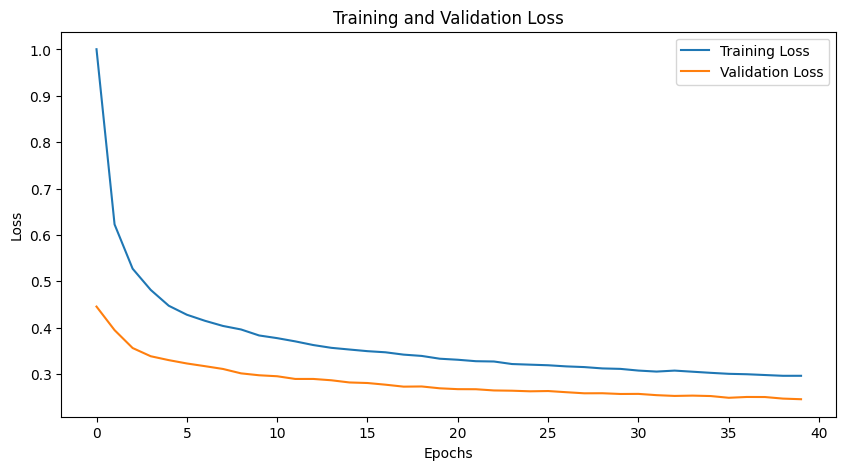

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


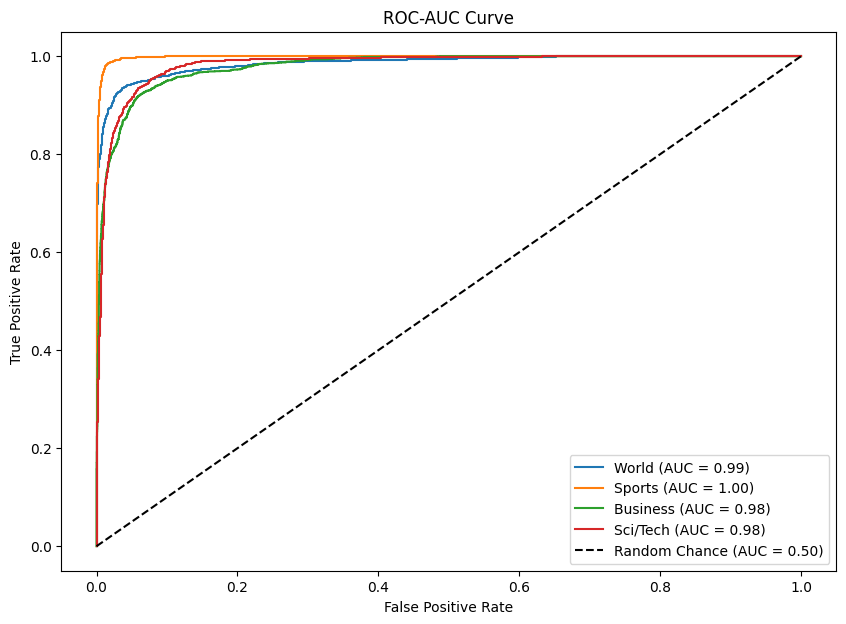

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
              precision    recall  f1-score   support

       World       0.94      0.89      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.88      0.86      0.87      1900
    Sci/Tech       0.87      0.91      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


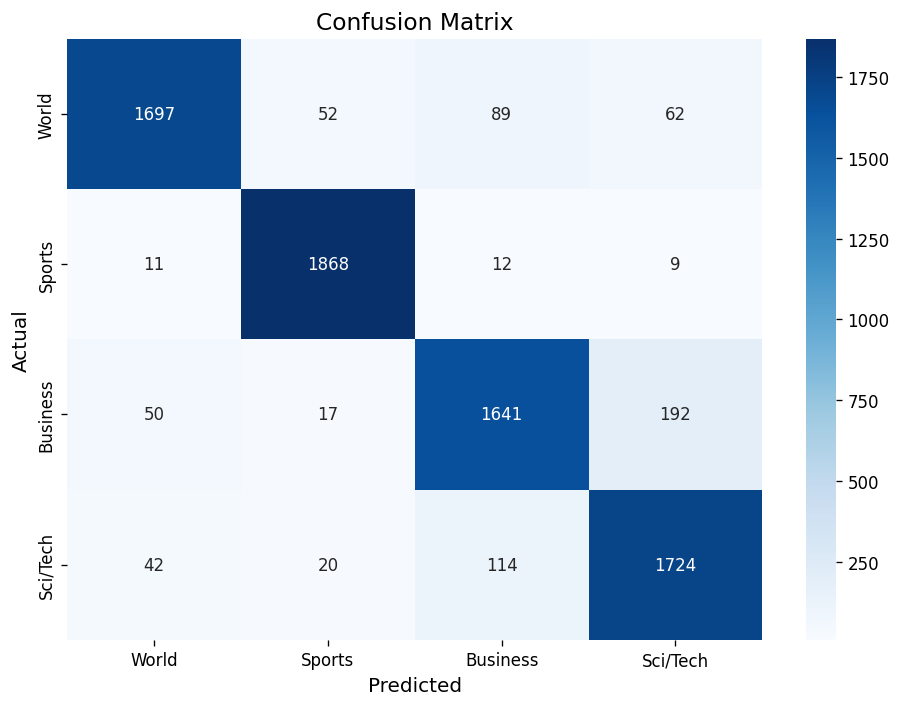

In [15]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=False
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=40)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=False)
model.add_lstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=64, dropout_rate=0.3, activation='relu', batch_norm=True)
model.compile_model(learning_rate=0.0001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

### LSTM Refinement 5 with GloVe Embeddings with trainable=False and other parameters set to default from DynamicDeepLearningModels class

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding LSTM layer...
Compiling model...
Training model...
Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 64s 17ms/step - accuracy: 0.8126 - loss: 0.5242 - val_accuracy: 0.8962 - val_loss: 0.3025
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 63s 17ms/step - accuracy: 0.8932 - loss: 0.3090 - val_accuracy: 0.9053 - val_loss: 0.2658
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 61s 16ms/step - accuracy: 0.9019 - loss: 0.2776 - val_accuracy: 0.9145 - val_loss: 0.2453
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 62s 17ms/step - accuracy: 0.9124 - loss: 0.2512 - val_accuracy: 0.9172 - val_loss: 0.2405
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 62s 17ms/step - accuracy: 0.9153 - loss: 0.2392 - val_accuracy: 0.9201 - val_loss: 0.2306
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 63s 17ms/step - accuracy: 0.9202 - l

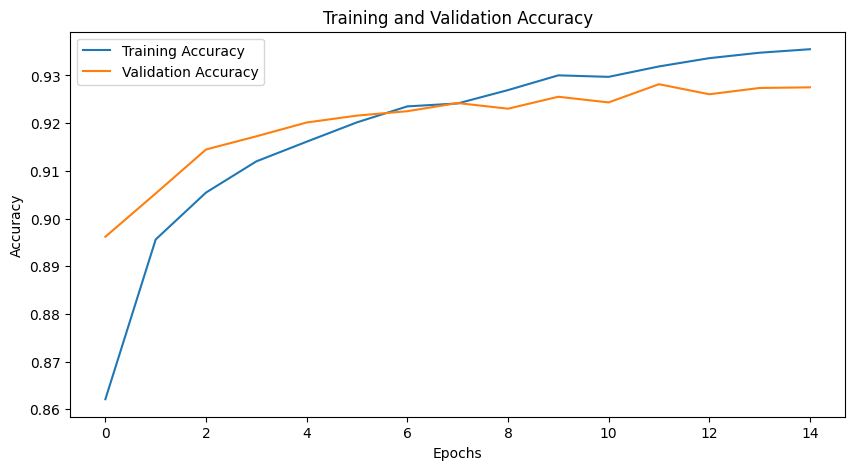

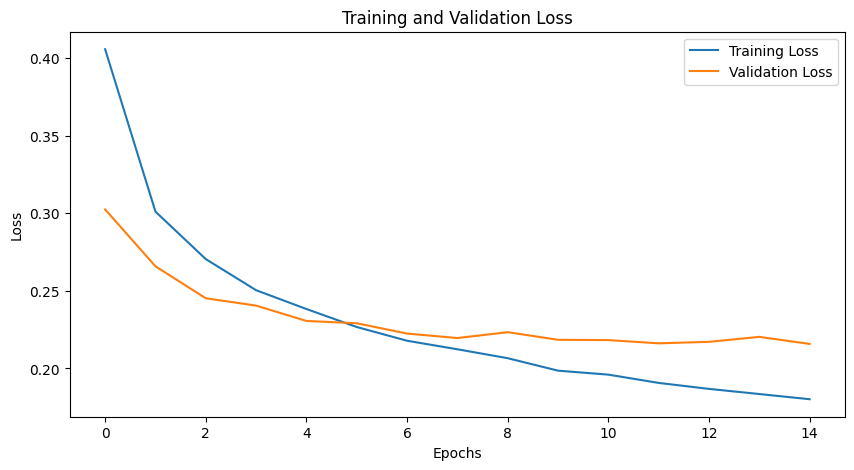

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


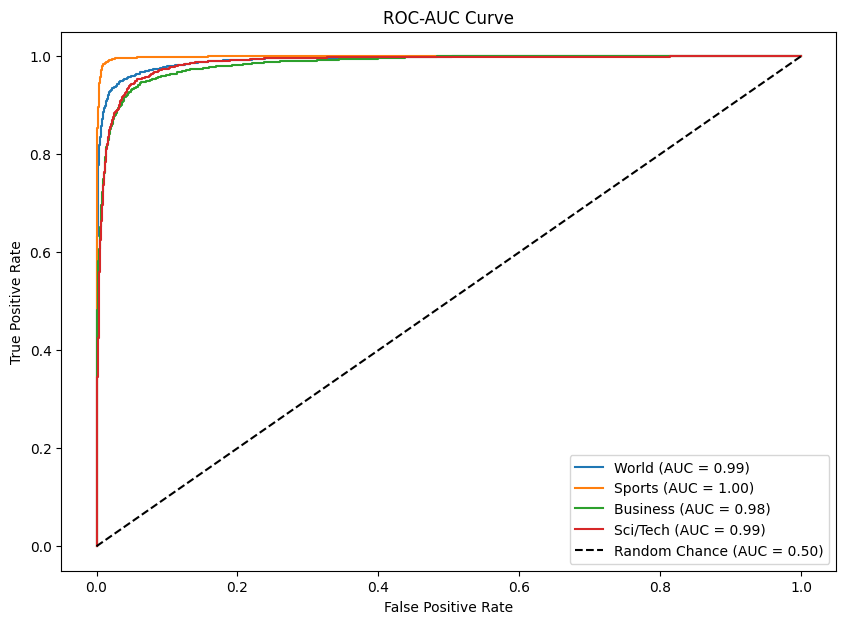

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

       World       0.94      0.92      0.93      1900
      Sports       0.97      0.98      0.98      1900
    Business       0.90      0.90      0.90      1900
    Sci/Tech       0.90      0.91      0.90      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


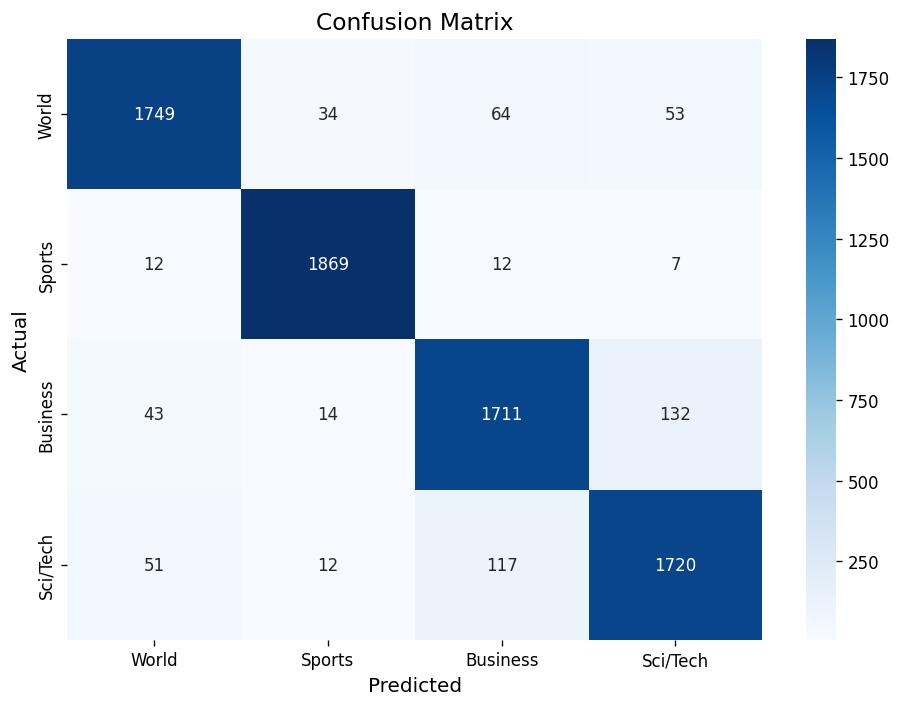

In [24]:
## Initialize the model with embedding_dim matching the GloVe file with trainable=False
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=40)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=False)
model.add_lstm_layer(units=128)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

### LSTM Refinement 6 LSTM with GloVe Embeddings with trainable=True

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding LSTM layer...
Compiling model...
Training model...
Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 75s 20ms/step - accuracy: 0.8202 - loss: 0.5062 - val_accuracy: 0.9136 - val_loss: 0.2587
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.9182 - loss: 0.2434 - val_accuracy: 0.9226 - val_loss: 0.2279
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.9311 - loss: 0.2014 - val_accuracy: 0.9249 - val_loss: 0.2290
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 19ms/step - accuracy: 0.9430 - loss: 0.1693 - val_accuracy: 0.9254 - val_loss: 0.2259
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.9486 - loss: 0.1481 - val_accuracy: 0.9250 - val_loss: 0.2320
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.9554 - l

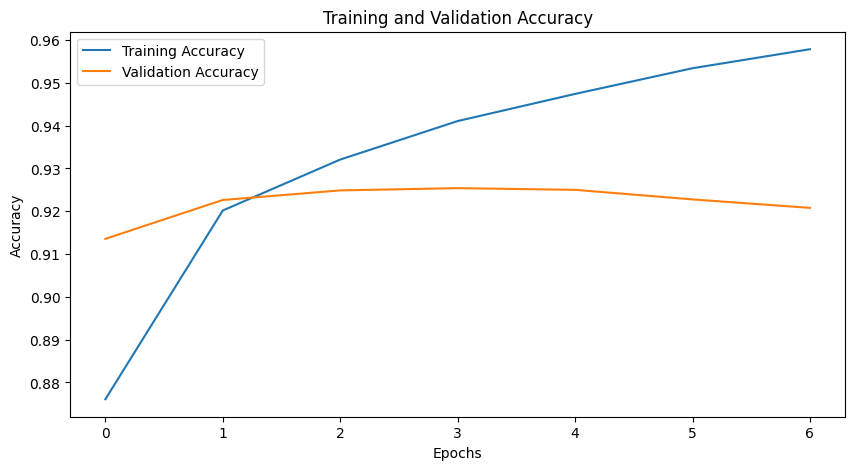

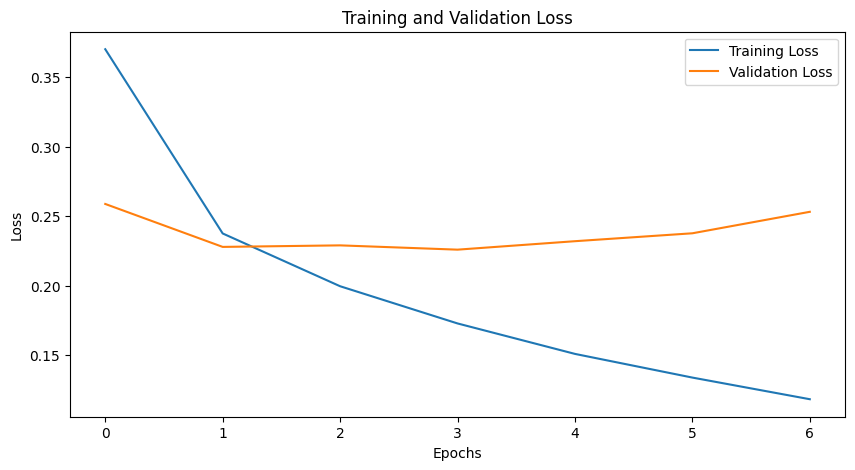

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step


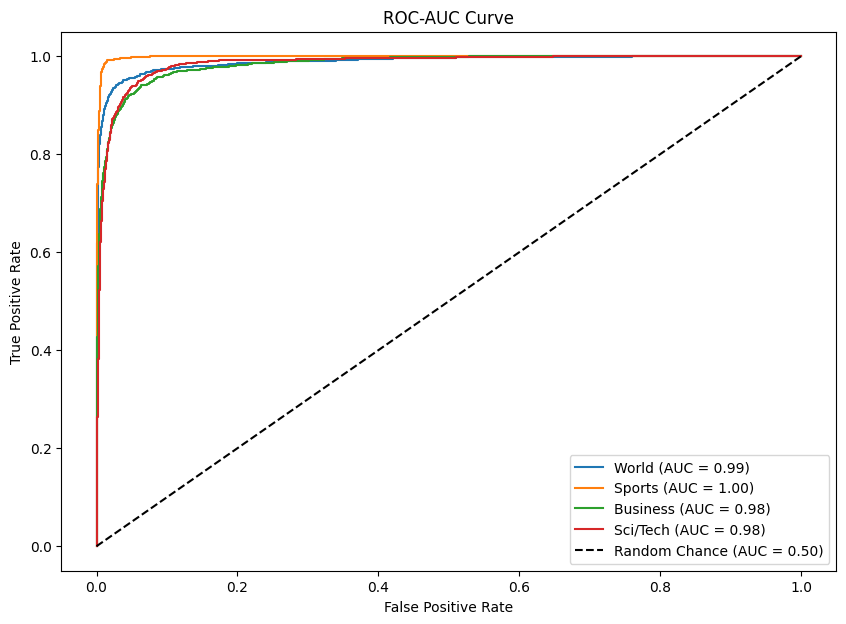

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

       World       0.94      0.92      0.93      1900
      Sports       0.96      0.99      0.97      1900
    Business       0.91      0.88      0.90      1900
    Sci/Tech       0.89      0.91      0.90      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


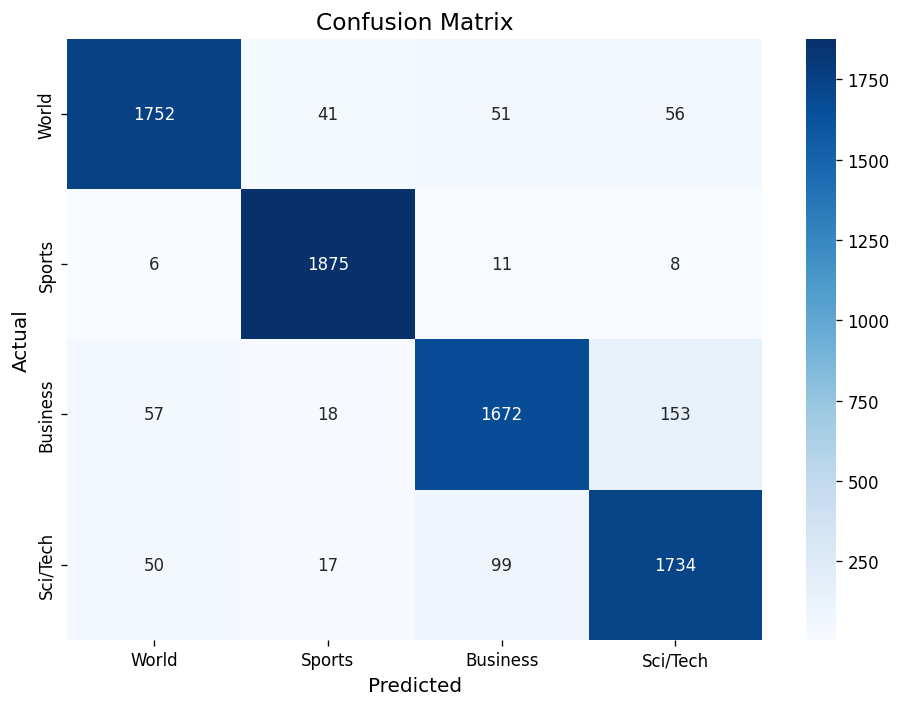

In [25]:
 # Initialize the model with embedding_dim matching the GloVe file with trainable=True
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=30)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_lstm_layer(units=128)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)

# Bi-directional Long Short-Term Memory [Bi-LSTM]

 Bi-directional LSTM  - Deep Learning Function Invocation/Call for Model Building, Training and Evaluation

--- BiLSTM Model ---
Tokenizing and padding sequences...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 108s 28ms/step - accuracy: 0.8302 - loss: 0.4543 - val_accuracy: 0.9120 - val_loss: 0.2730
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - accuracy: 0.9237 - loss: 0.2264 - val_accuracy: 0.9155 - val_loss: 0.2479
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 114s 30ms/step - accuracy: 0.9391 - loss: 0.1770 - val_accuracy: 0.9141 - val_loss: 0.2583
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.9517 - loss: 0.1378 - val_accuracy: 0.9138 - val_loss: 0.2648
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 101s 27ms/step - accuracy: 0.9631 - loss: 0.1040 - val_accuracy: 0.9132 - val_loss: 0.2984
Evaluating model...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9133 - loss: 0.2605
Test Accuracy: 0.9155


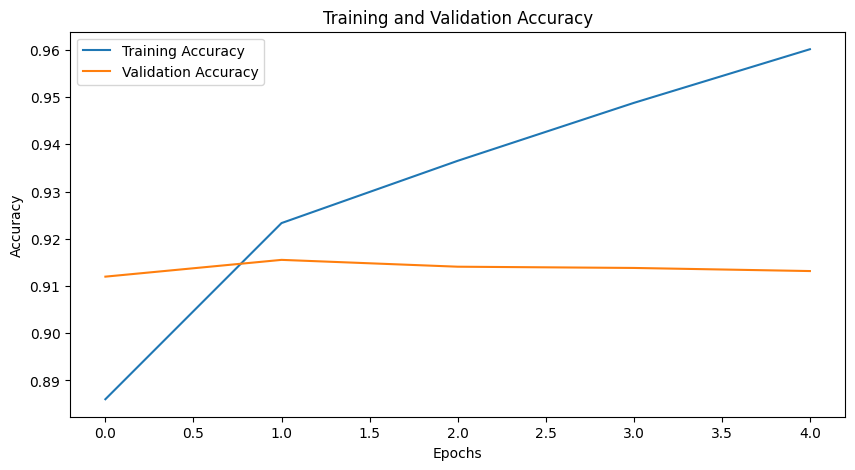

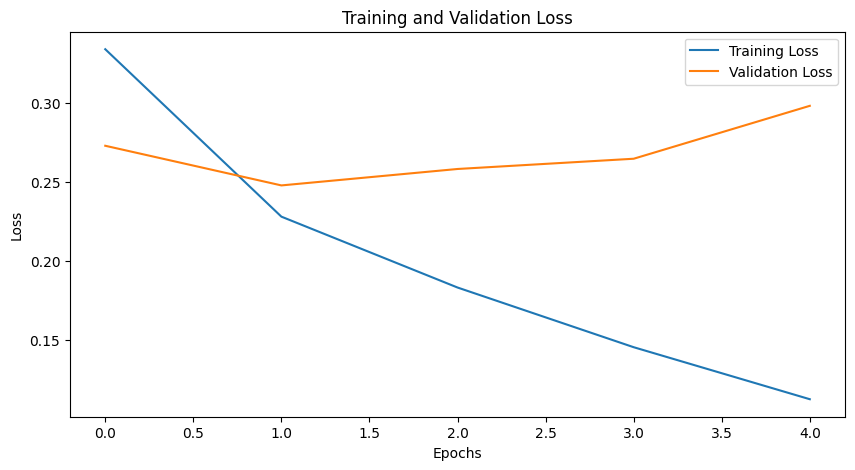

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


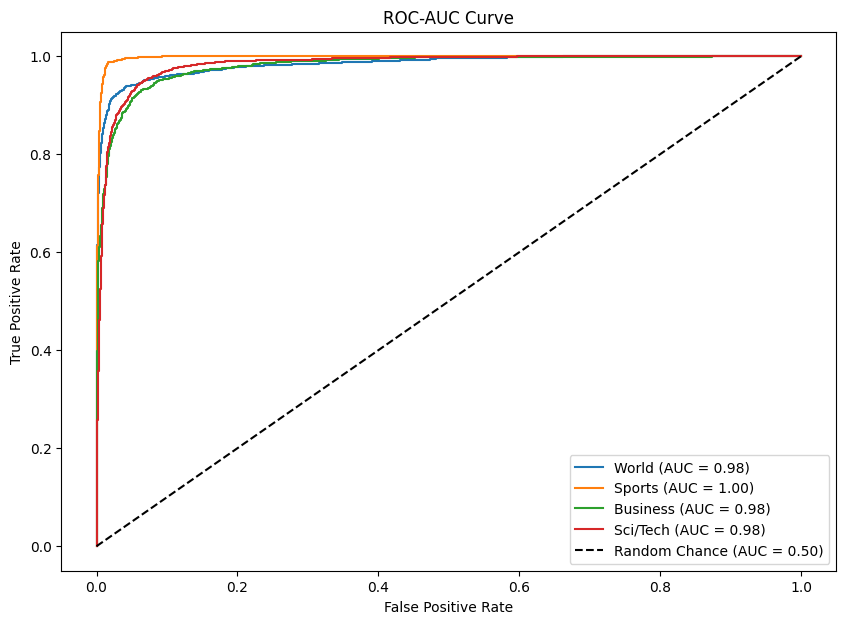

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
              precision    recall  f1-score   support

       World       0.95      0.89      0.92      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.90      0.87      0.88      1900
    Sci/Tech       0.86      0.92      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


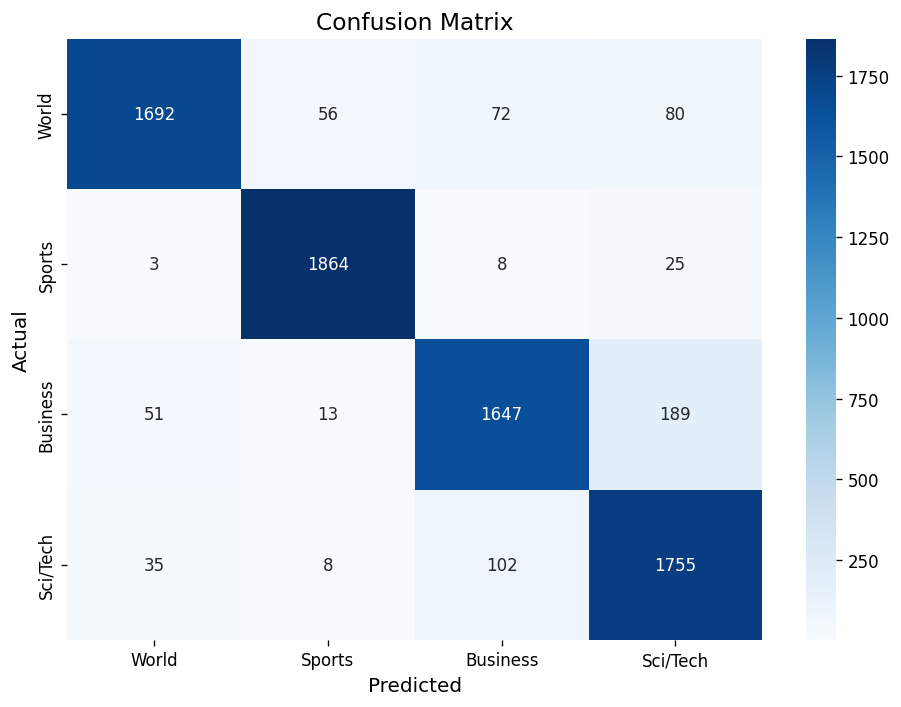

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


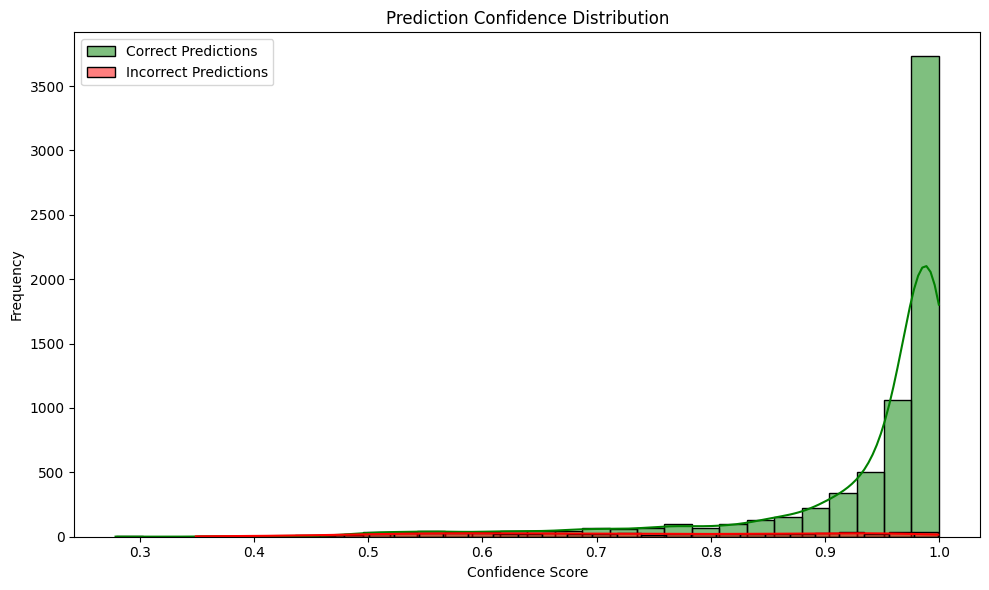

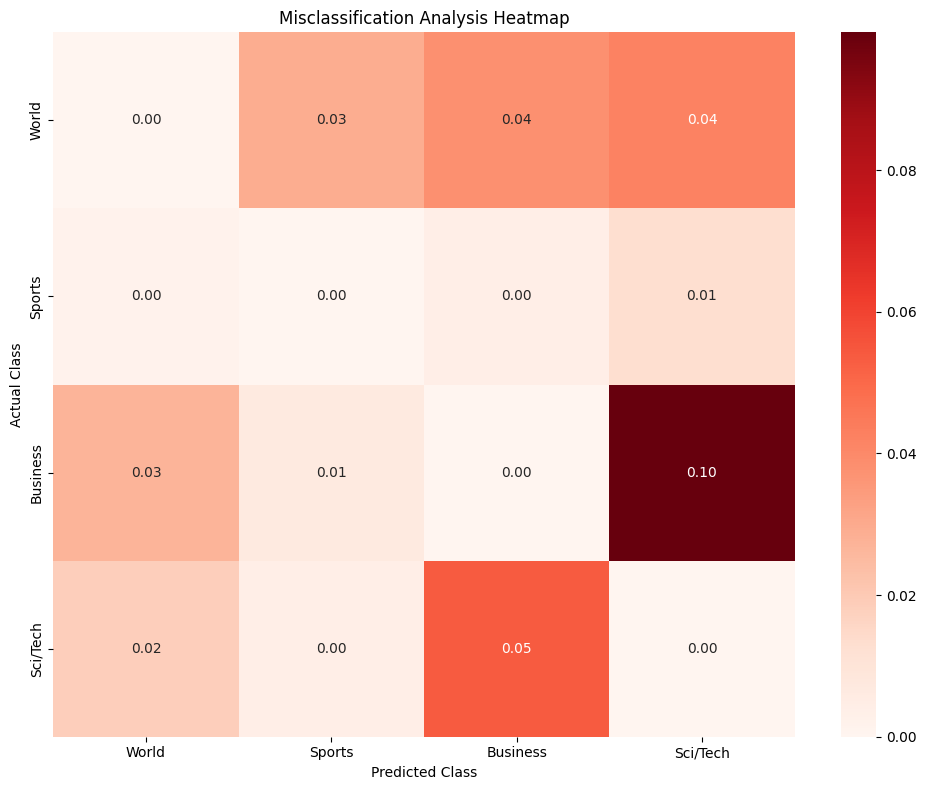

In [16]:
# Build and Train Dynamic BiLSTM
print("--- BiLSTM Model ---")
model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
model.add_embedding_layer()
model.add_bilstm_layer(units=128)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 1


--- Dynamic BiLSTM Model ---
Tokenizing and padding sequences...
Adding BiLSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 89s 23ms/step - accuracy: 0.7915 - loss: 0.5660 - val_accuracy: 0.9068 - val_loss: 0.2789
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 96s 26ms/step - accuracy: 0.9123 - loss: 0.2793 - val_accuracy: 0.9130 - val_loss: 0.2578
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - accuracy: 0.9241 - loss: 0.2326 - val_accuracy: 0.9154 - val_loss: 0.2587
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9326 - loss: 0.2006 - val_accuracy: 0.9136 - val_loss: 0.2592
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 88s 23ms/step - accuracy: 0.9387 - loss: 0.1755 - val_accuracy: 0.9182 - val_loss: 0.2669
Evaluating model...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9132 - loss: 0.2682
Test Accuracy: 0.9130


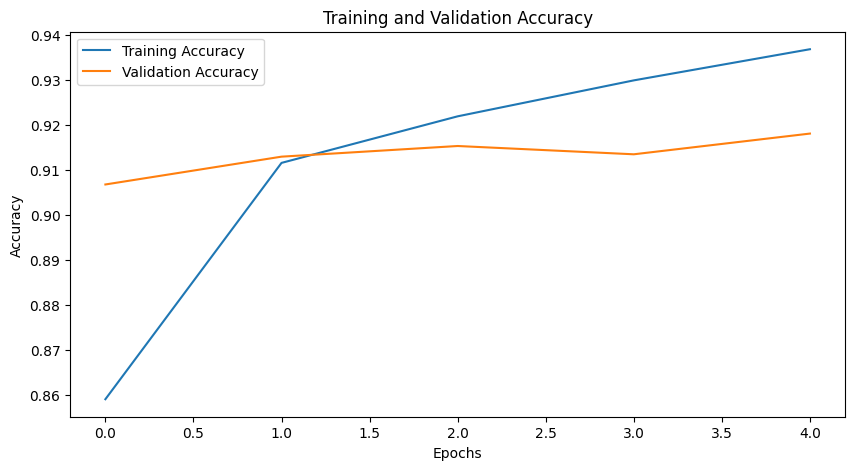

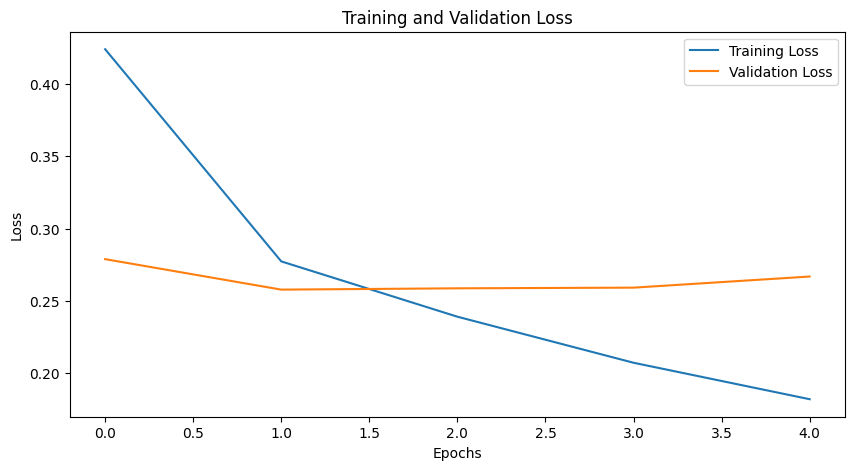

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


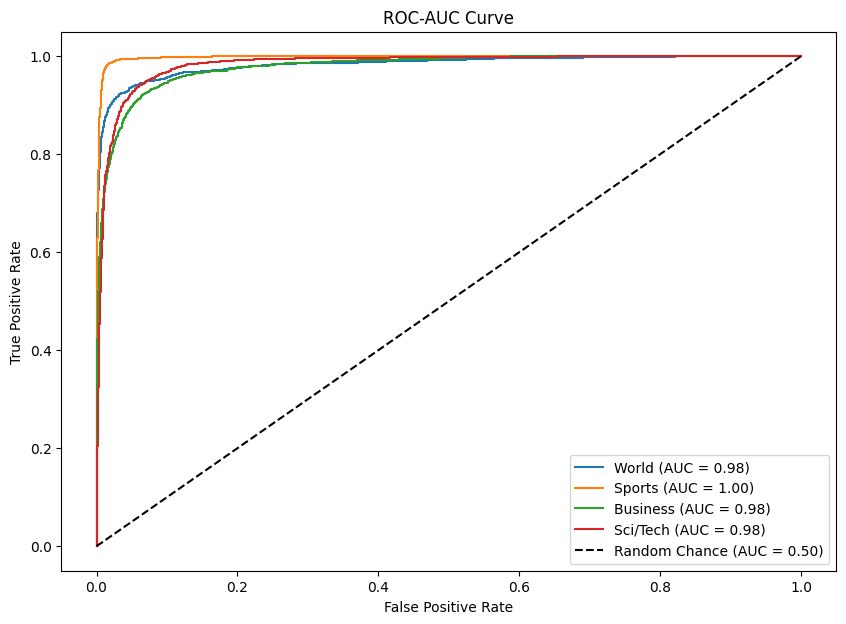

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

       World       0.95      0.88      0.91      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.92      0.90      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


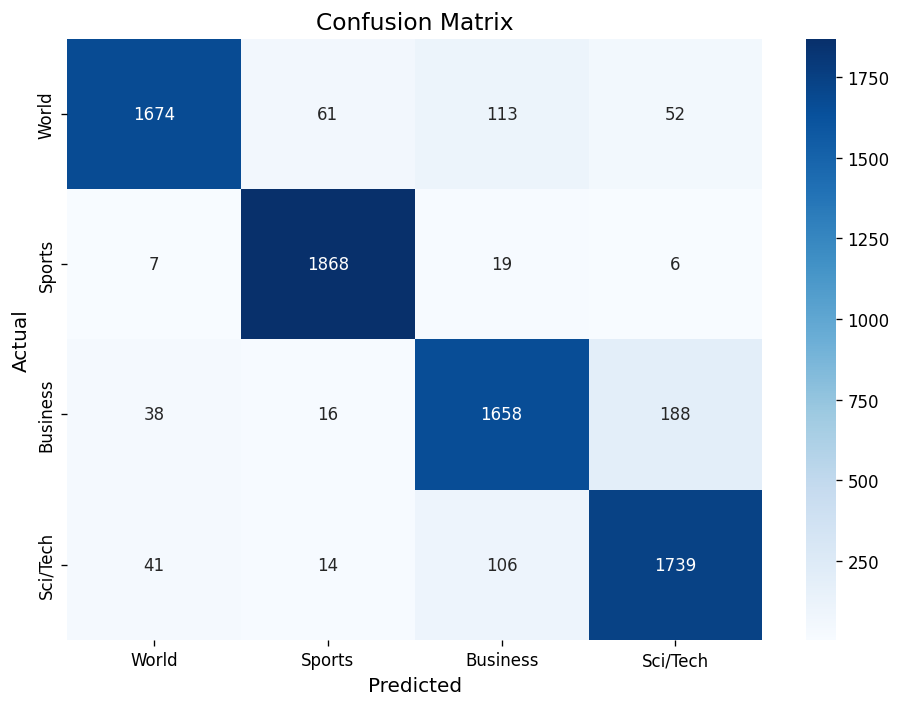

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


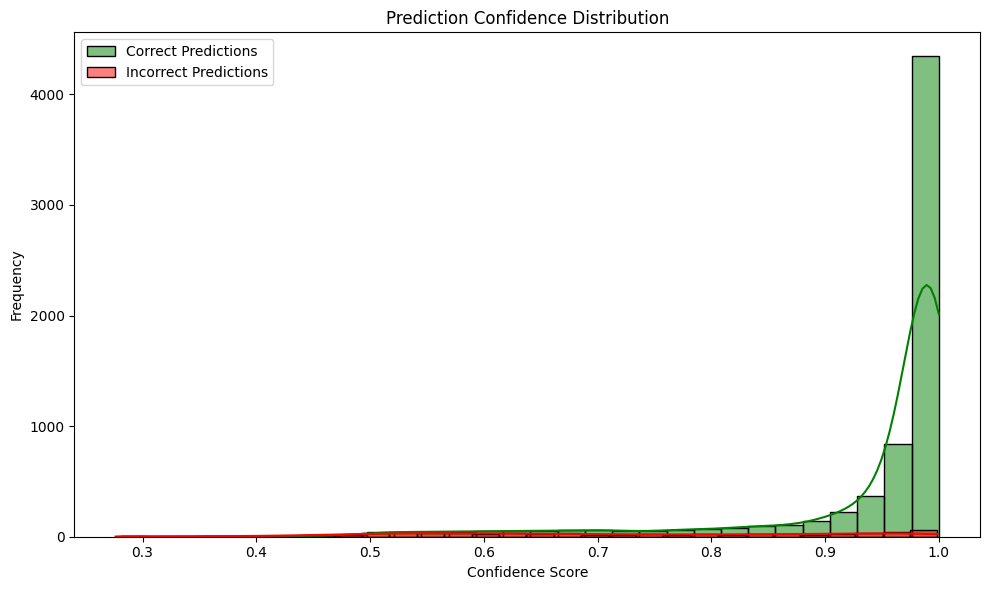

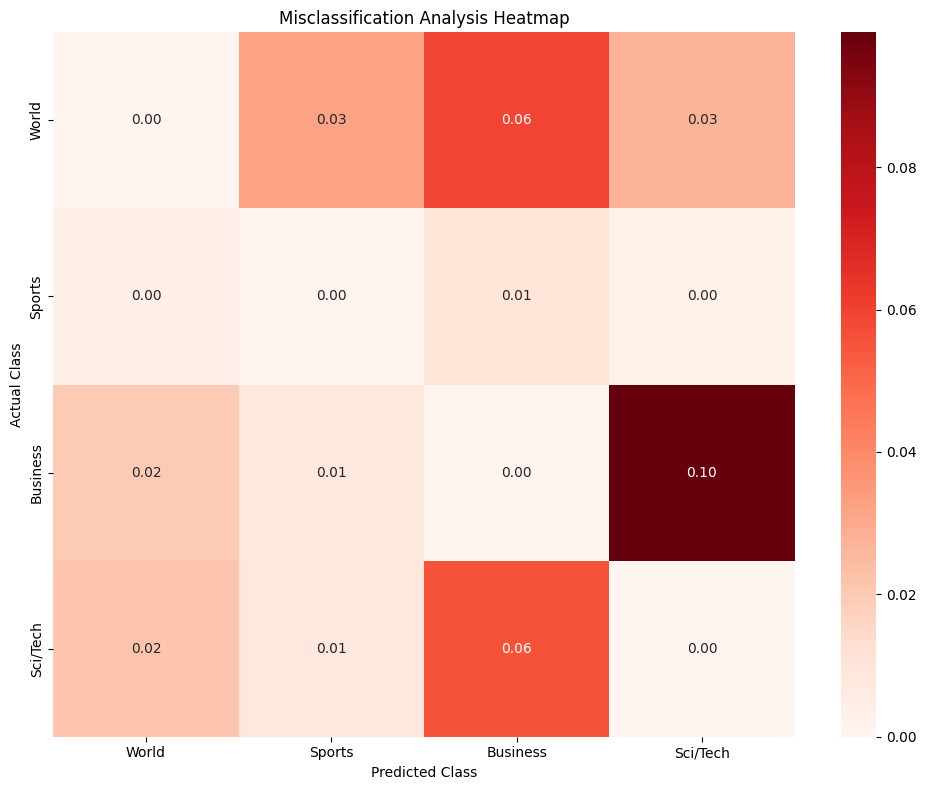

In [17]:
# Build and Train Dynamic BiLSTM
print("\n--- Dynamic BiLSTM Model ---")
model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
model.add_embedding_layer()
model.add_bilstm_layer(units=128, dropout_rate=0.4, recurrent_dropout=0.4)
model.add_dense_layer(units=64, dropout_rate=0.4, activation='relu', batch_norm=True)
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 2: Hyperparameter tuning with dropout_rate=0.5, recurrent_dropout=0.5


--- Dynamic BiLSTM Model ---
Tokenizing and padding sequences...
Adding BiLSTM layer...
Adding Batch Normalization...
Compiling model...
Training model...
Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 97s 25ms/step - accuracy: 0.7660 - loss: 0.6213 - val_accuracy: 0.9068 - val_loss: 0.2811
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 87s 23ms/step - accuracy: 0.9072 - loss: 0.2912 - val_accuracy: 0.9138 - val_loss: 0.2566
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 92s 24ms/step - accuracy: 0.9215 - loss: 0.2394 - val_accuracy: 0.9170 - val_loss: 0.2475
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.9318 - loss: 0.2061 - val_accuracy: 0.9191 - val_loss: 0.2536
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 90s 24ms/step - accuracy: 0.9388 - loss: 0.1825 - val_accuracy: 0.9174 - val_loss: 0.2509
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 89s 24ms/step - accuracy: 0.9442 - loss: 0.1618 - val_accuracy: 0.9182 - val_loss: 0.2637
Evaluating model...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 

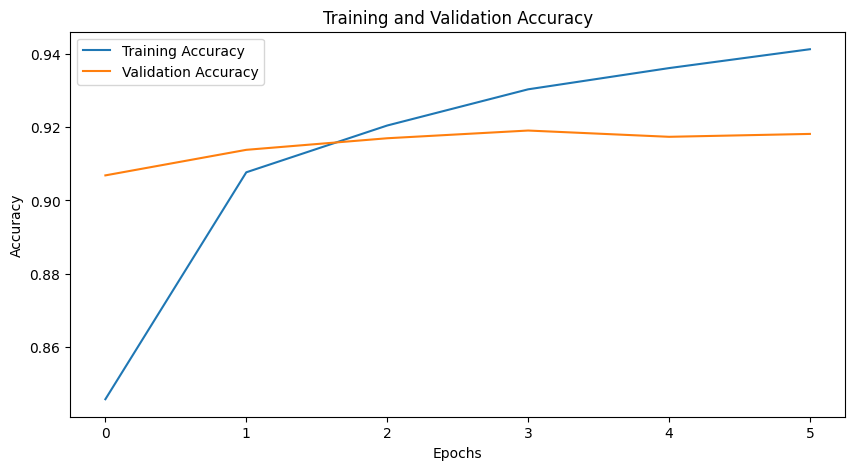

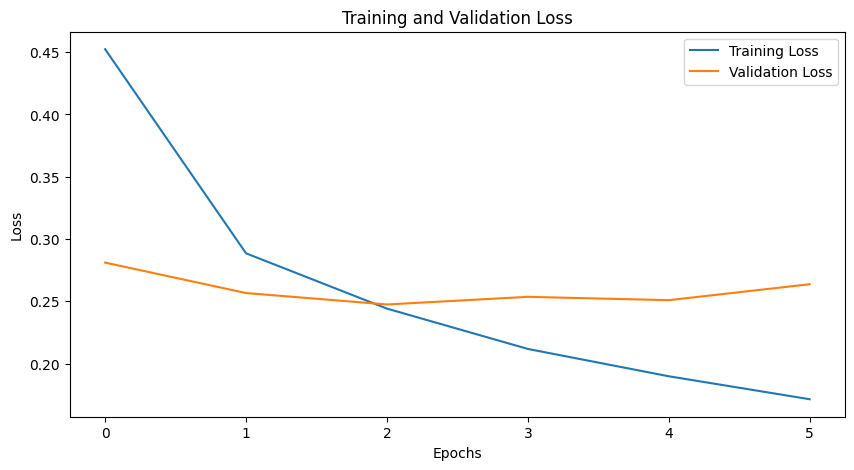

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


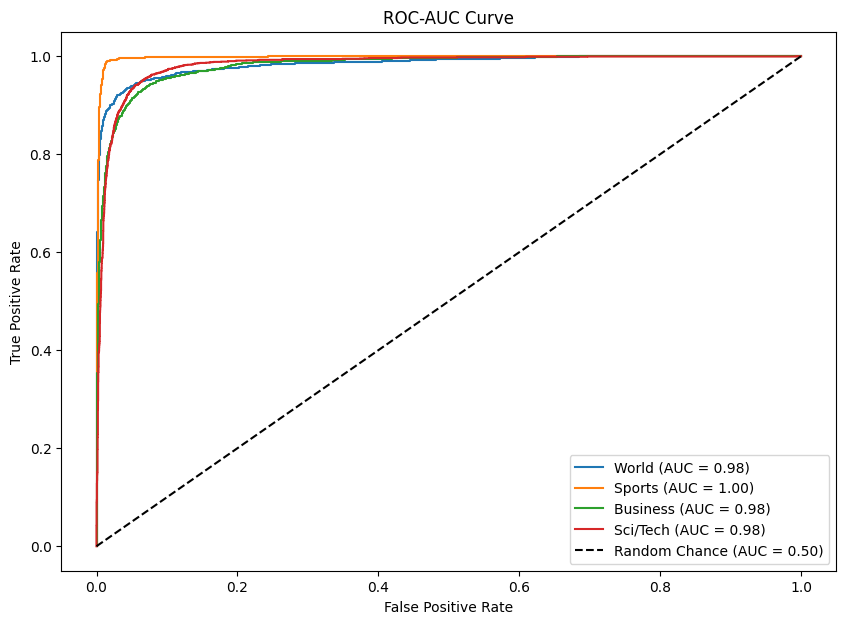

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
              precision    recall  f1-score   support

       World       0.92      0.91      0.92      1900
      Sports       0.95      0.99      0.97      1900
    Business       0.90      0.87      0.88      1900
    Sci/Tech       0.89      0.90      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


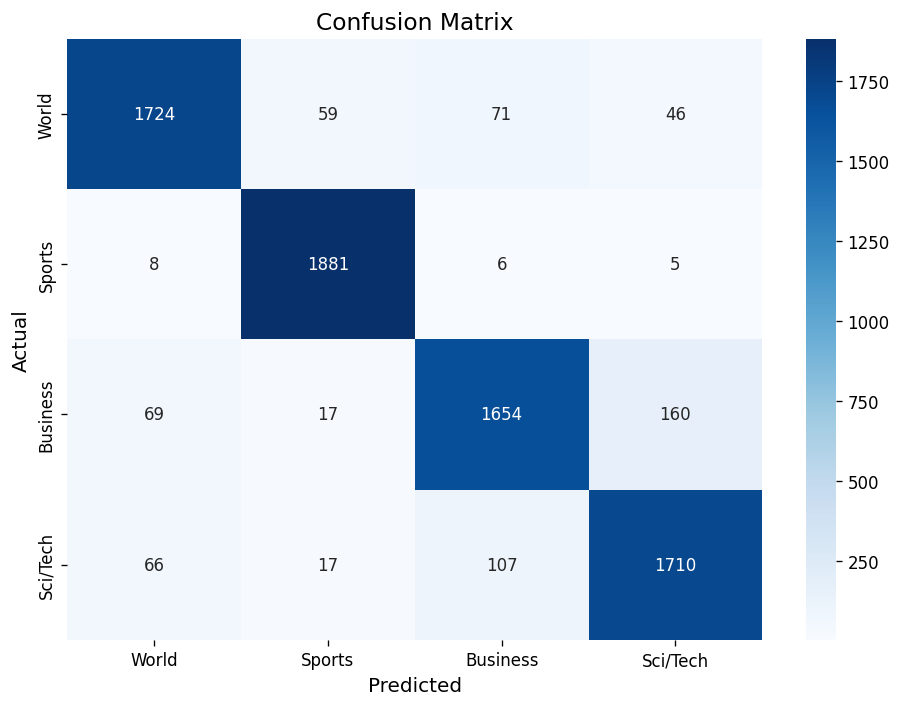

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


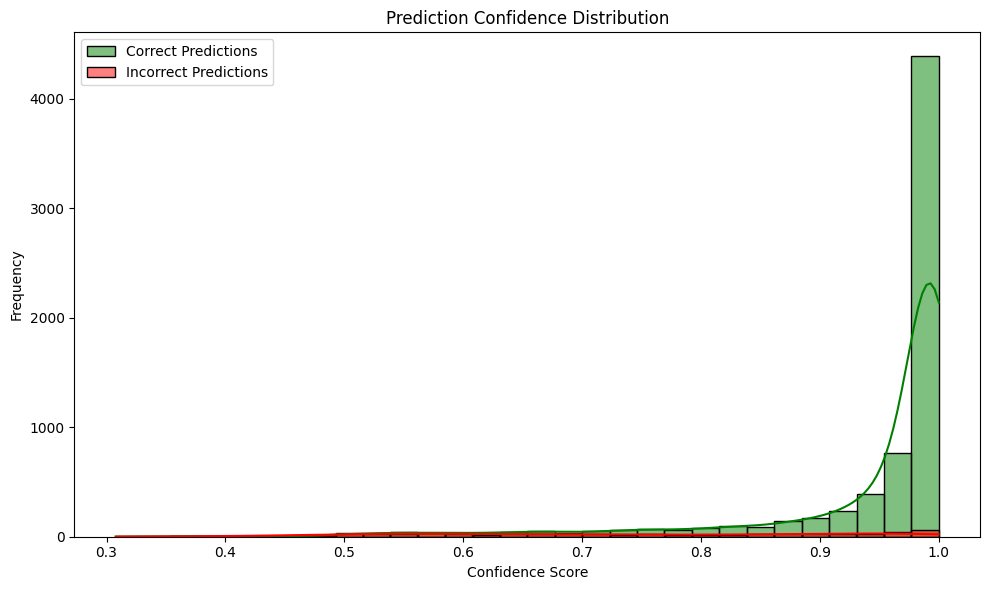

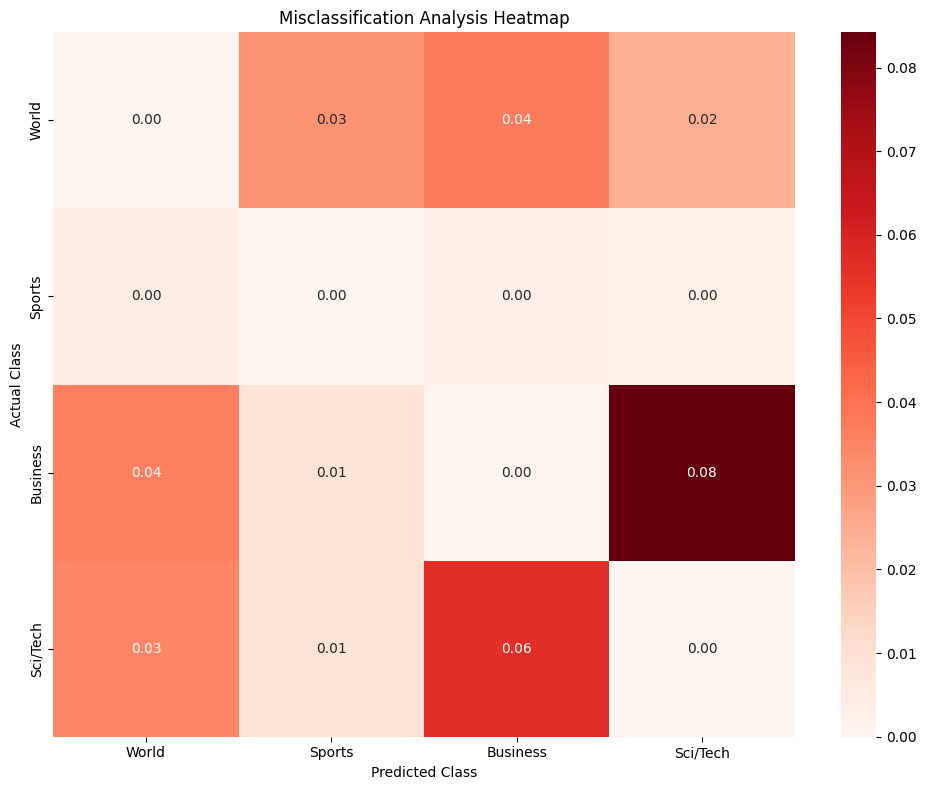

In [18]:
# Build and Train Dynamic BiLSTM
print("\n--- Dynamic BiLSTM Model ---")
model = DynamicDeepLearningModels(epochs=20)
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
model.add_embedding_layer()
model.add_bilstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.5)
model.add_dense_layer(units=64, dropout_rate=0.4, activation='relu', batch_norm=True)
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 3: with GloVe file with trainable=False

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 95s 25ms/step - accuracy: 0.8071 - loss: 0.5259 - val_accuracy: 0.8995 - val_loss: 0.2951
Epoch 2/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 88s 23ms/step - accuracy: 0.8810 - loss: 0.3379 - val_accuracy: 0.9042 - val_loss: 0.2741
Epoch 3/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 77s 21ms/step - accuracy: 0.8943 - loss: 0.3020 - val_accuracy: 0.9071 - val_loss: 0.2593
Epoch 4/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.8966 - loss: 0.2865 - val_accuracy: 0.9124 - val_loss: 0.2452
Epoch 5/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.9034 - loss: 0.2752 - val_accuracy: 0.9157 - val_loss: 0.2402
Epoch 6/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.9042 -

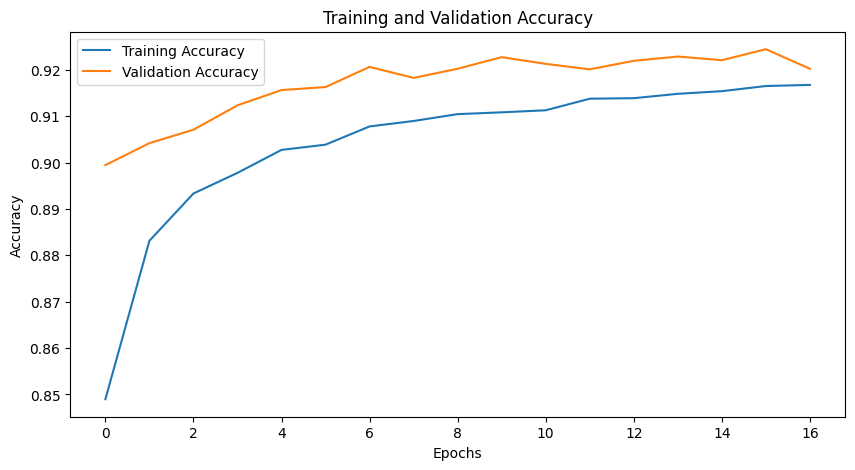

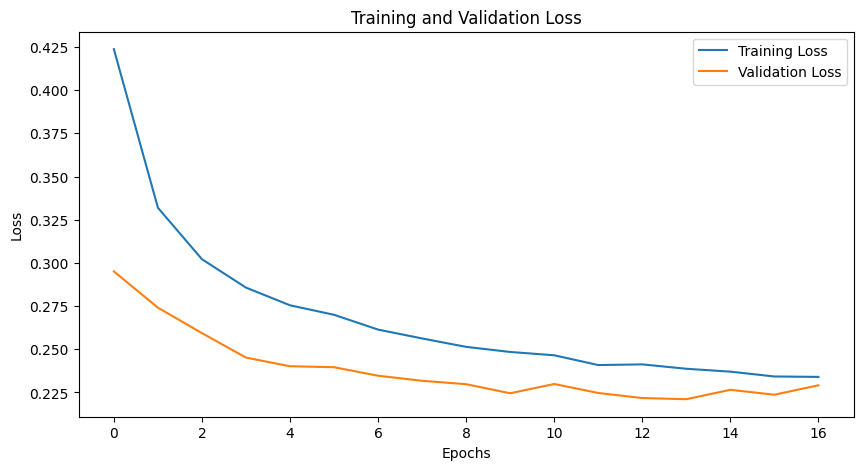

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


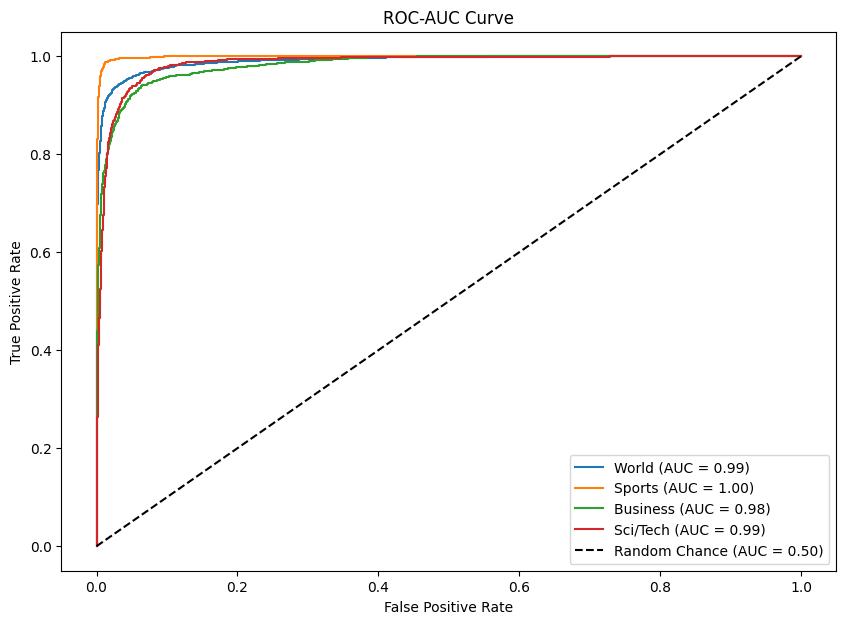

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
              precision    recall  f1-score   support

       World       0.95      0.92      0.93      1900
      Sports       0.97      0.98      0.97      1900
    Business       0.90      0.87      0.89      1900
    Sci/Tech       0.87      0.92      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


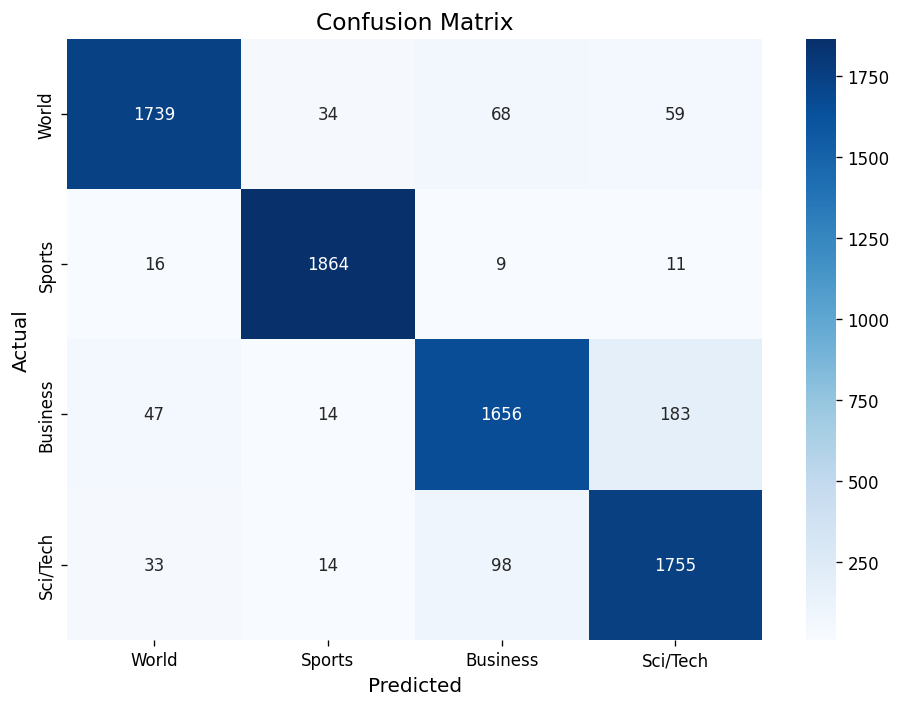

In [16]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=False
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=25)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #I need to zipped with my submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=False)
model.add_bilstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.5)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 4: with GloVe file with trainable=False dropout_rate=0.4, recurrent_dropout=0.4

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 172s 44ms/step - accuracy: 0.8240 - loss: 0.4811 - val_accuracy: 0.8992 - val_loss: 0.2825
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 165s 44ms/step - accuracy: 0.8884 - loss: 0.3148 - val_accuracy: 0.9059 - val_loss: 0.2700
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 165s 44ms/step - accuracy: 0.8997 - loss: 0.2837 - val_accuracy: 0.9086 - val_loss: 0.2550
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 164s 44ms/step - accuracy: 0.9078 - loss: 0.2619 - val_accuracy: 0.9170 - val_loss: 0.2389
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 170s 45ms/step - accuracy: 0.9109 - loss: 0.2503 - val_accuracy: 0.9176 - val_loss: 0.2340
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 168s 45ms/step - accuracy: 0.

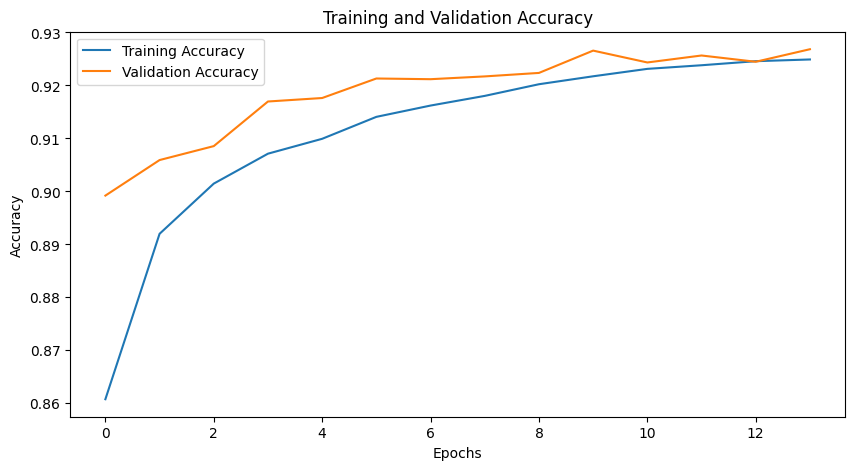

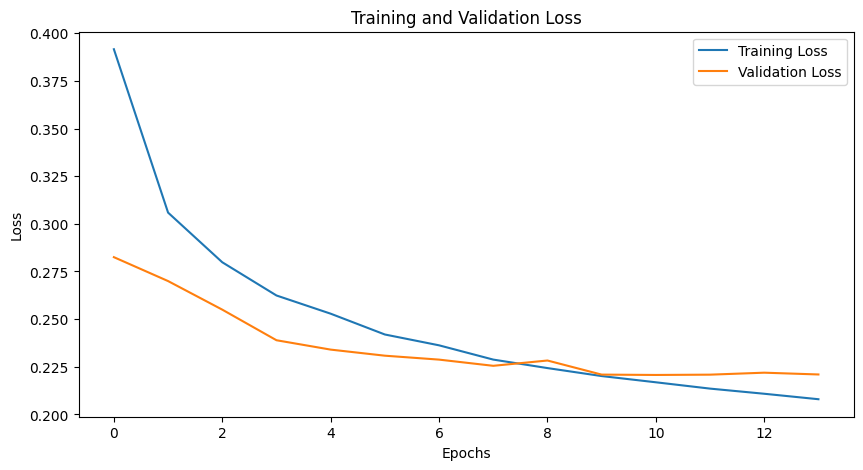

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


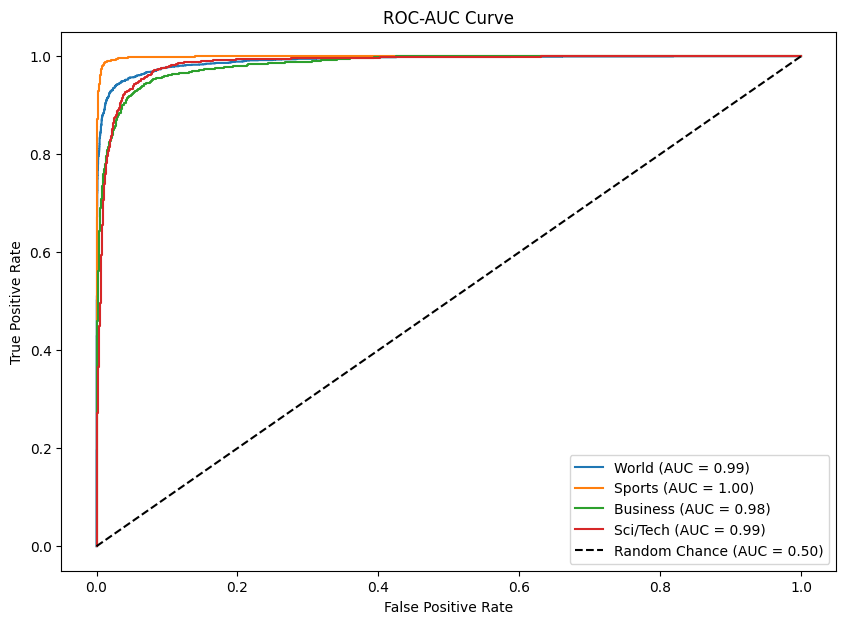

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

       World       0.94      0.93      0.93      1900
      Sports       0.97      0.98      0.98      1900
    Business       0.92      0.86      0.89      1900
    Sci/Tech       0.87      0.93      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


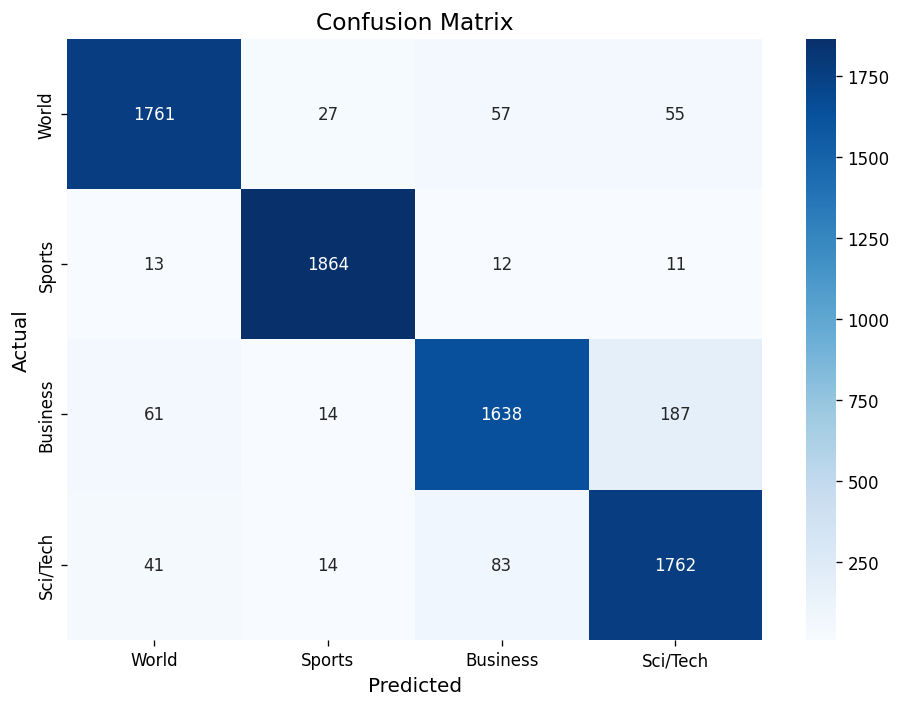

In [17]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=False
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=False)
model.add_bilstm_layer(units=128, dropout_rate=0.4, recurrent_dropout=0.4)
model.add_dense_layer(units=64, activation='relu')
model.compile_model()
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 5

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 178s 46ms/step - accuracy: 0.8107 - loss: 0.5147 - val_accuracy: 0.8974 - val_loss: 0.3004
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 172s 46ms/step - accuracy: 0.8812 - loss: 0.3363 - val_accuracy: 0.9032 - val_loss: 0.2749
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 173s 46ms/step - accuracy: 0.8922 - loss: 0.3040 - val_accuracy: 0.9097 - val_loss: 0.2562
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 167s 45ms/step - accuracy: 0.8978 - loss: 0.2854 - val_accuracy: 0.9126 - val_loss: 0.2458
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 166s 44ms/step - accuracy: 0.9027 - loss: 0.2728 - val_accuracy: 0.9141 - val_loss: 0.2384
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 165s 44ms/step - accuracy: 0.

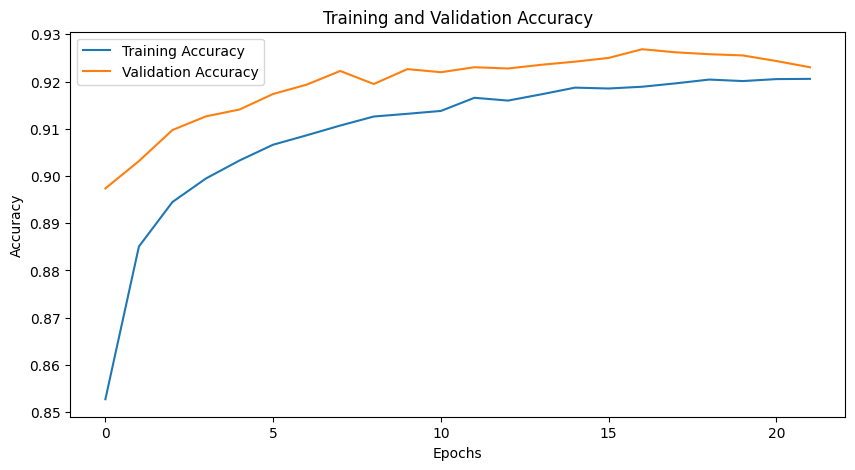

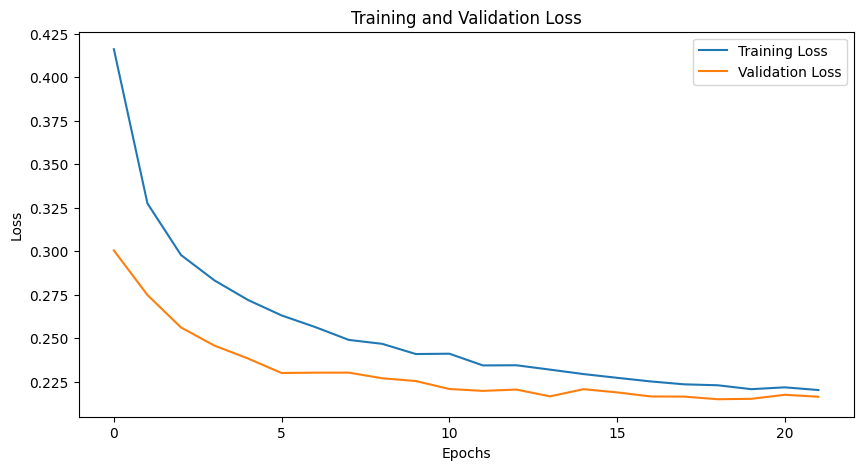

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


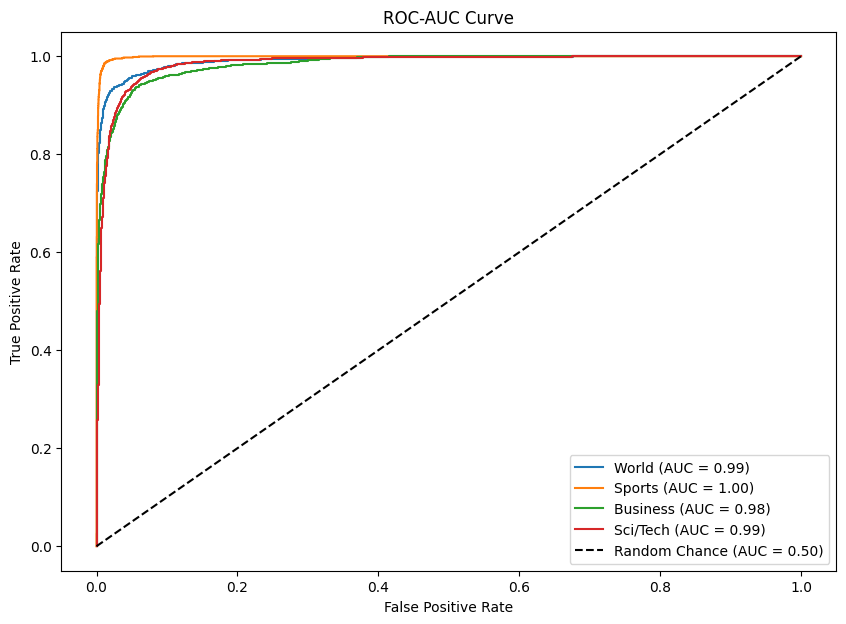

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
              precision    recall  f1-score   support

       World       0.95      0.91      0.93      1900
      Sports       0.96      0.99      0.97      1900
    Business       0.90      0.88      0.89      1900
    Sci/Tech       0.89      0.92      0.90      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


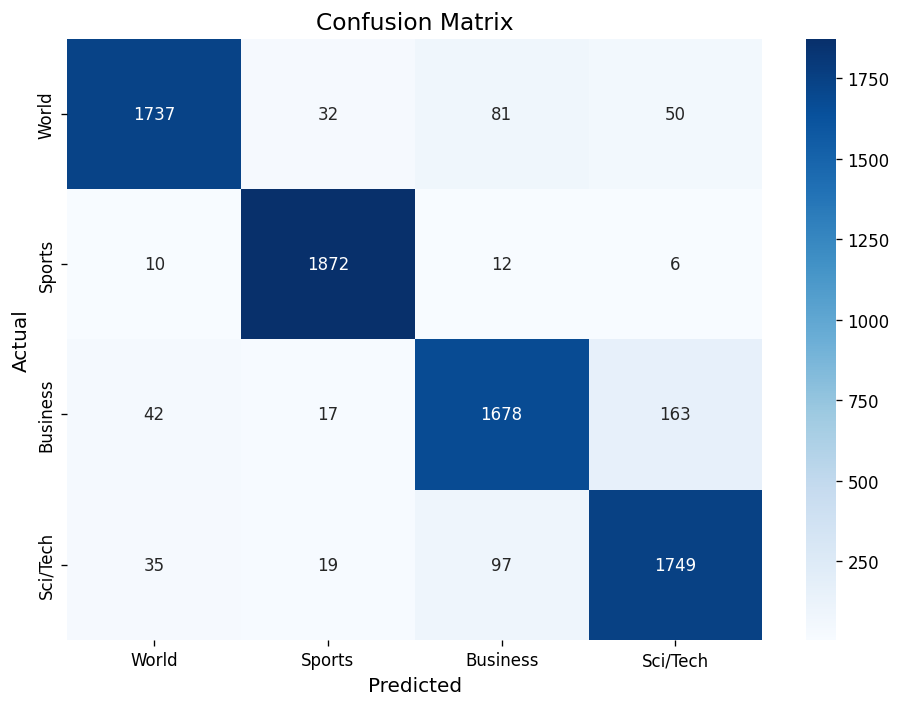

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


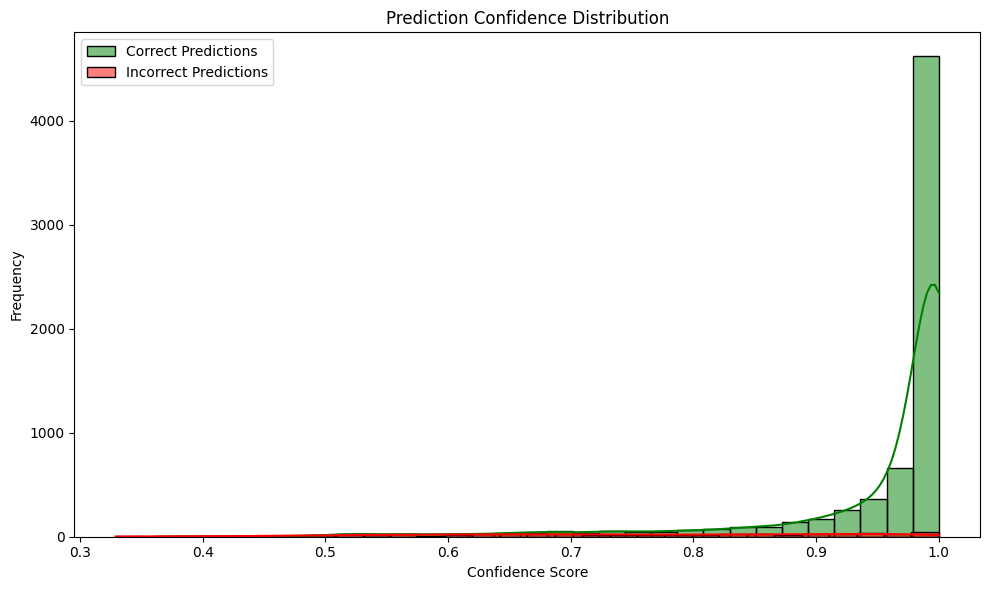

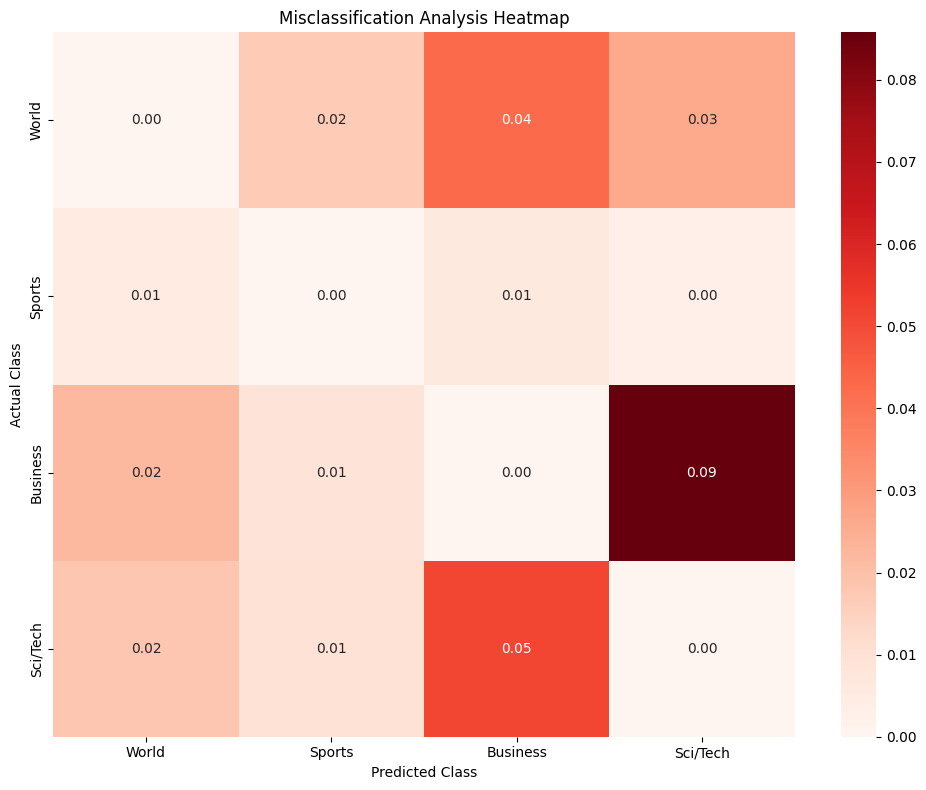

In [19]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=False
model = DynamicDeepLearningModels(max_words=10000, max_length=50, embedding_dim=100, batch_size=32, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=False)
model.add_bilstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=64, activation='relu')
model.compile_model(learning_rate=0.001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 6

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 178s 47ms/step - accuracy: 0.8278 - loss: 0.4779 - val_accuracy: 0.9142 - val_loss: 0.2509
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 167s 45ms/step - accuracy: 0.9121 - loss: 0.2595 - val_accuracy: 0.9212 - val_loss: 0.2301
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 164s 44ms/step - accuracy: 0.9231 - loss: 0.2214 - val_accuracy: 0.9266 - val_loss: 0.2235
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 164s 44ms/step - accuracy: 0.9317 - loss: 0.2014 - val_accuracy: 0.9283 - val_loss: 0.2173
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 164s 44ms/step - accuracy: 0.9358 - loss: 0.1859 - val_accuracy: 0.9292 - val_loss: 0.2181
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 166s 44ms/step - accuracy: 0.

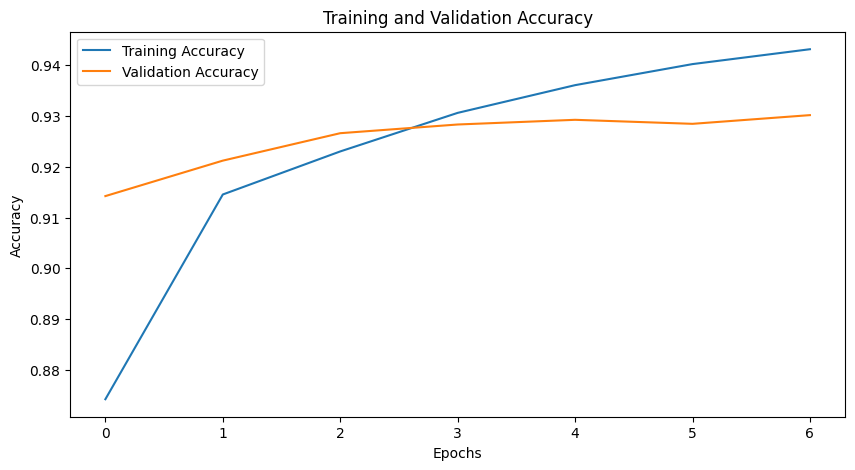

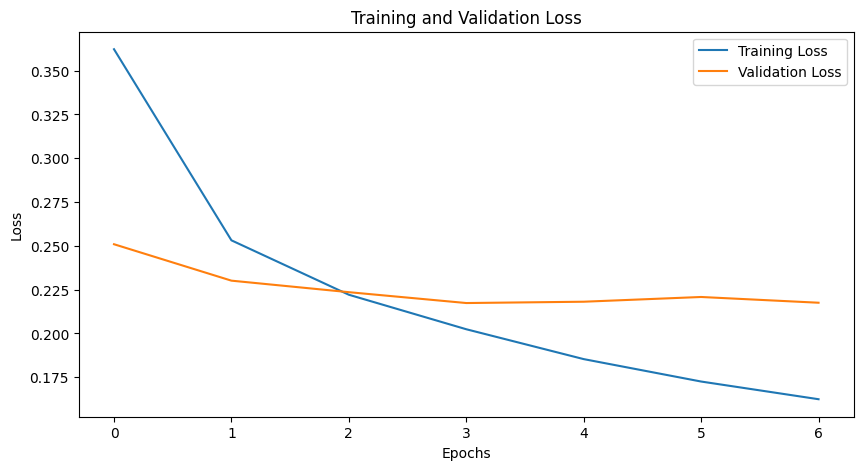

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step


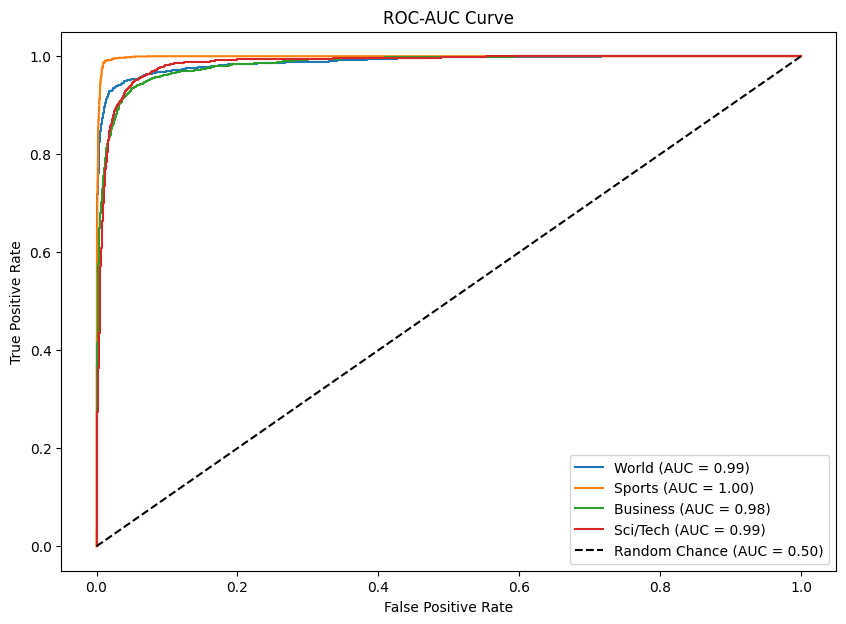

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
              precision    recall  f1-score   support

       World       0.94      0.92      0.93      1900
      Sports       0.97      0.99      0.98      1900
    Business       0.91      0.89      0.90      1900
    Sci/Tech       0.90      0.91      0.90      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


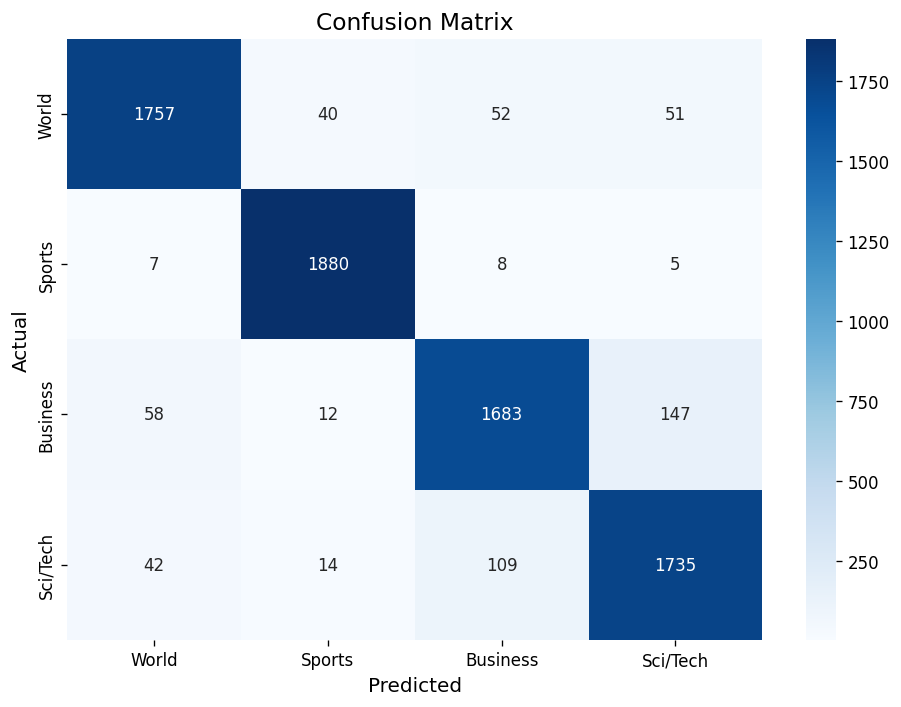

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


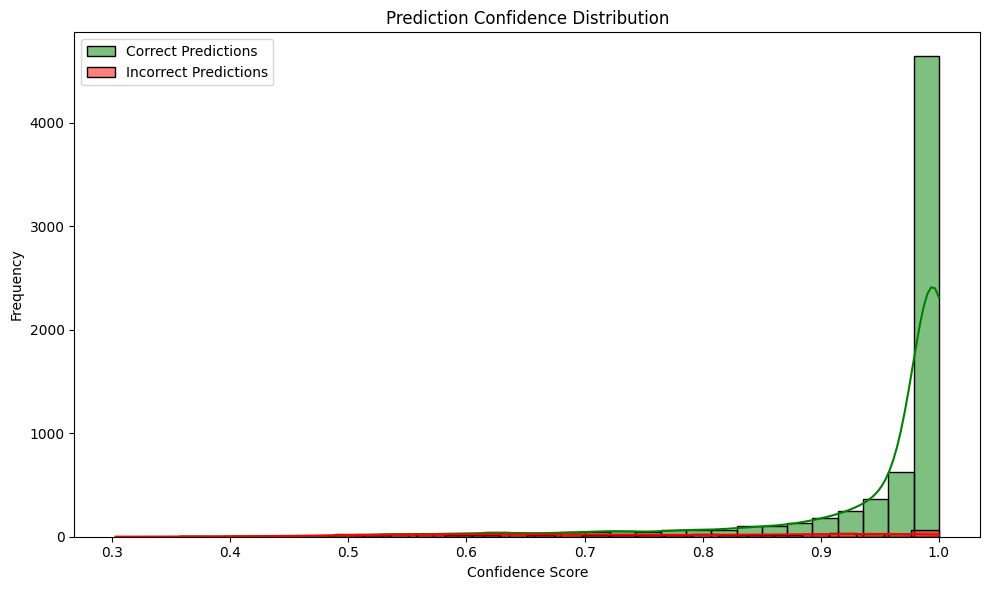

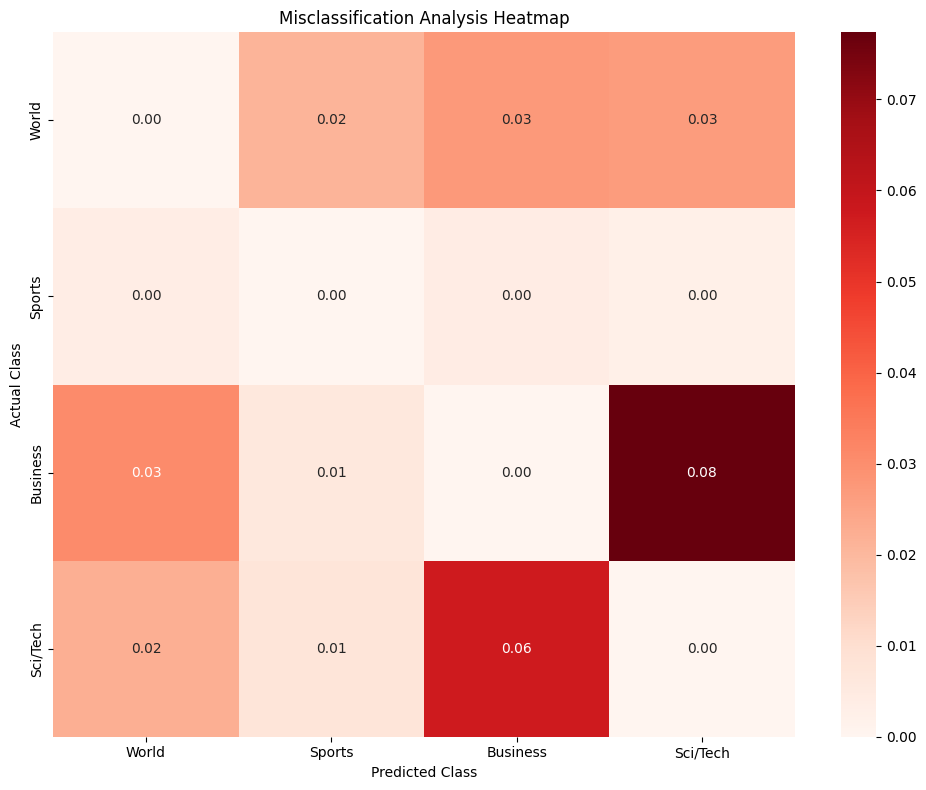

In [29]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=True with max_length=100
model = DynamicDeepLearningModels(max_words=10000, max_length=100, embedding_dim=100, batch_size=32, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_bilstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=64, activation='relu')
model.compile_model(learning_rate=0.001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 7

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 603s 160ms/step - accuracy: 0.8302 - loss: 0.4692 - val_accuracy: 0.9143 - val_loss: 0.2535
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 565s 151ms/step - accuracy: 0.9118 - loss: 0.2590 - val_accuracy: 0.9236 - val_loss: 0.2284
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 616s 164ms/step - accuracy: 0.9246 - loss: 0.2212 - val_accuracy: 0.9275 - val_loss: 0.2176
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1132s 302ms/step - accuracy: 0.9318 - loss: 0.1983 - val_accuracy: 0.9289 - val_loss: 0.2150
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1154s 308ms/step - accuracy: 0.9366 - loss: 0.1829 - val_accuracy: 0.9309 - val_loss: 0.2116
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1248s 333ms/step - acc

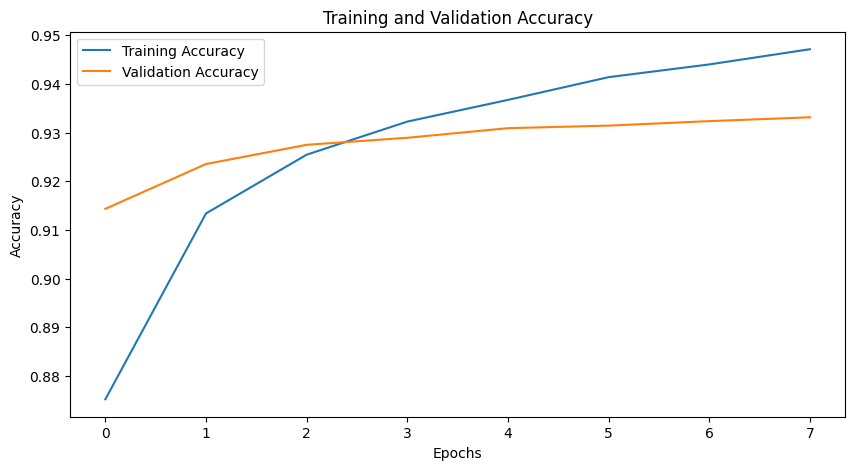

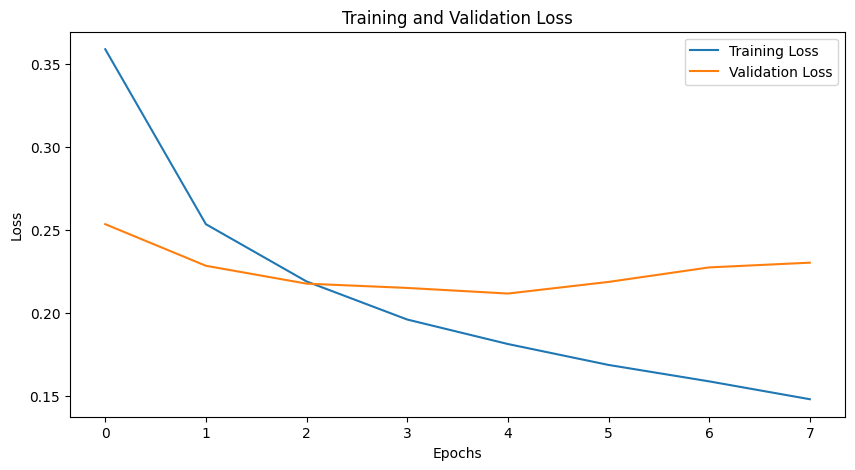

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step


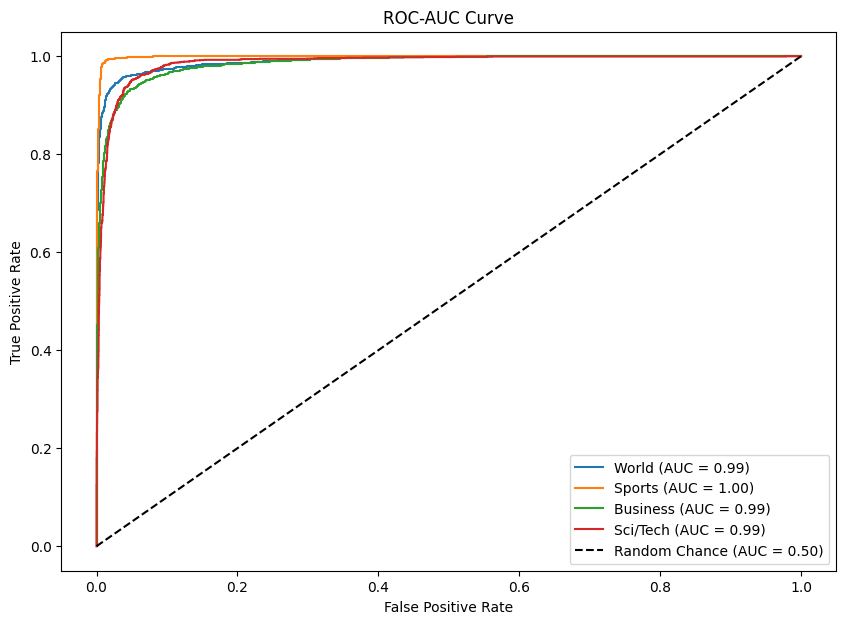

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step
              precision    recall  f1-score   support

       World       0.94      0.94      0.94      1900
      Sports       0.97      0.99      0.98      1900
    Business       0.91      0.89      0.90      1900
    Sci/Tech       0.91      0.91      0.91      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


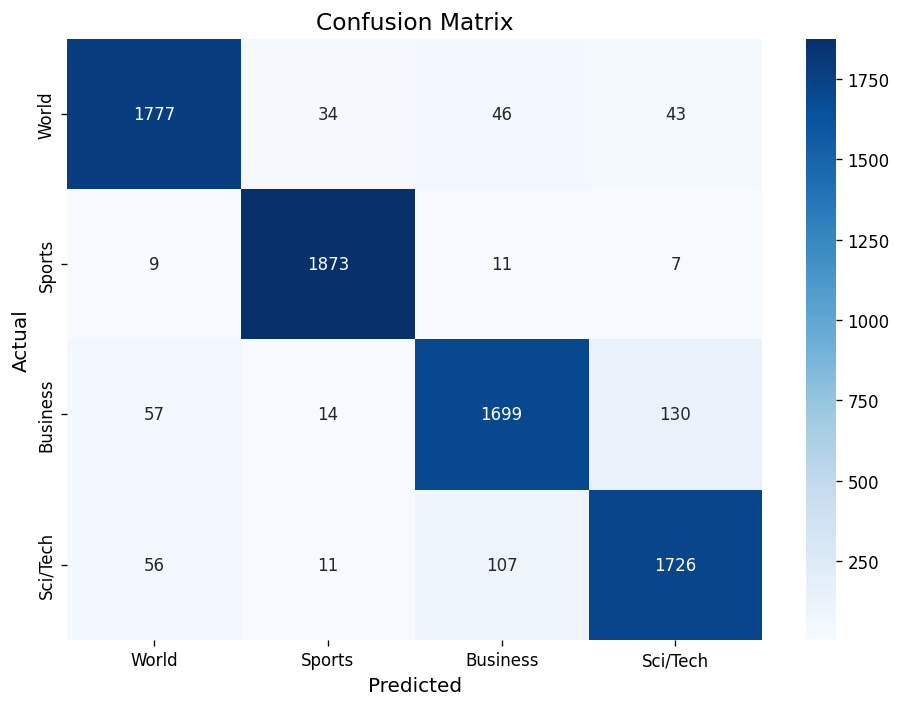

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


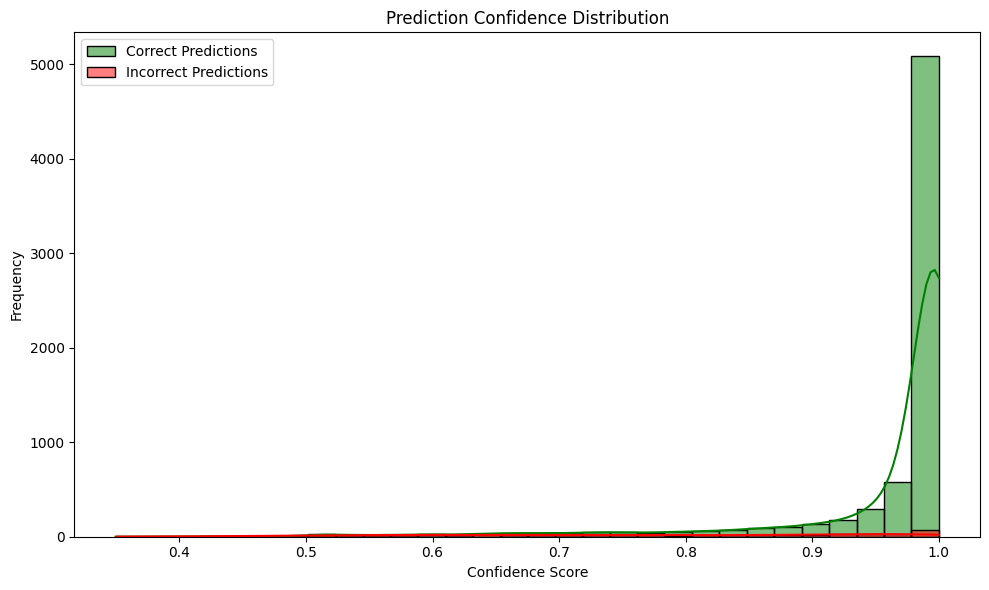

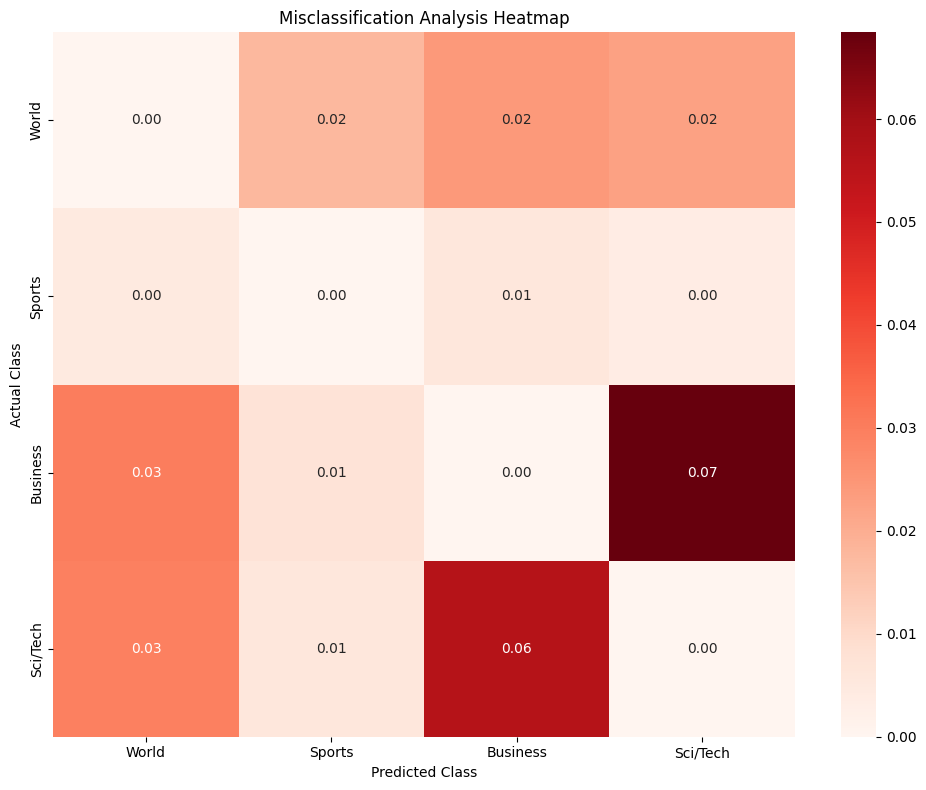

In [30]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=True with max_length=100
#model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4) model.add_dense_layer(units=128, activation='relu')
model = DynamicDeepLearningModels(max_words=10000, max_length=100, embedding_dim=100, batch_size=32, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=128, activation='relu')
model.compile_model(learning_rate=0.001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 8 - Batch size 64

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 582s 308ms/step - accuracy: 0.8199 - loss: 0.4942 - val_accuracy: 0.9129 - val_loss: 0.2594
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 570s 304ms/step - accuracy: 0.9070 - loss: 0.2707 - val_accuracy: 0.9201 - val_loss: 0.2351
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 579s 309ms/step - accuracy: 0.9201 - loss: 0.2327 - val_accuracy: 0.9243 - val_loss: 0.2256
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 578s 308ms/step - accuracy: 0.9283 - loss: 0.2084 - val_accuracy: 0.9280 - val_loss: 0.2141
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 576s 307ms/step - accuracy: 0.9362 - loss: 0.1847 - val_accuracy: 0.9316 - val_loss: 0.2090
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 587s 313ms/step - accura

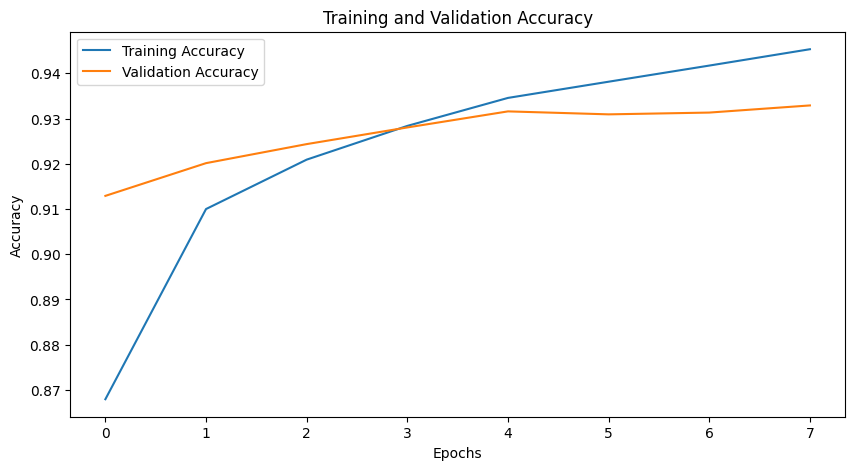

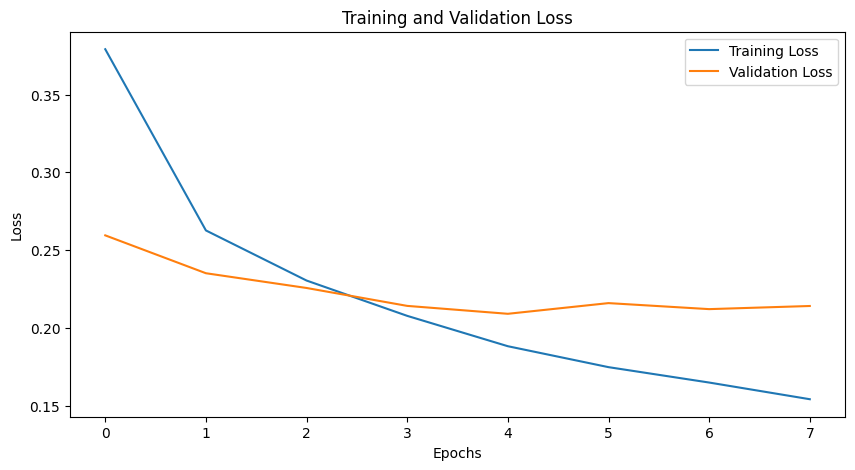

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step


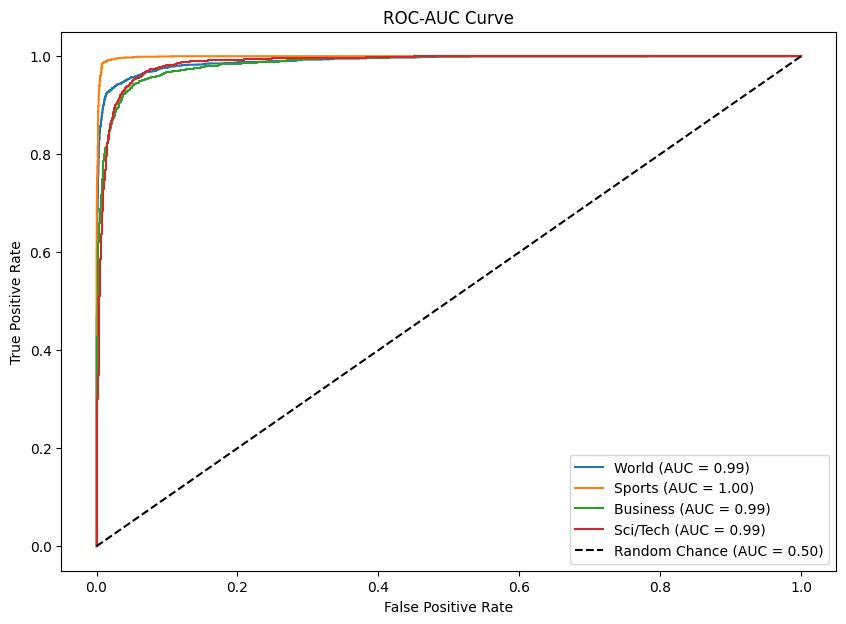

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step
              precision    recall  f1-score   support

       World       0.96      0.92      0.94      1900
      Sports       0.97      0.99      0.98      1900
    Business       0.91      0.89      0.90      1900
    Sci/Tech       0.89      0.93      0.91      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


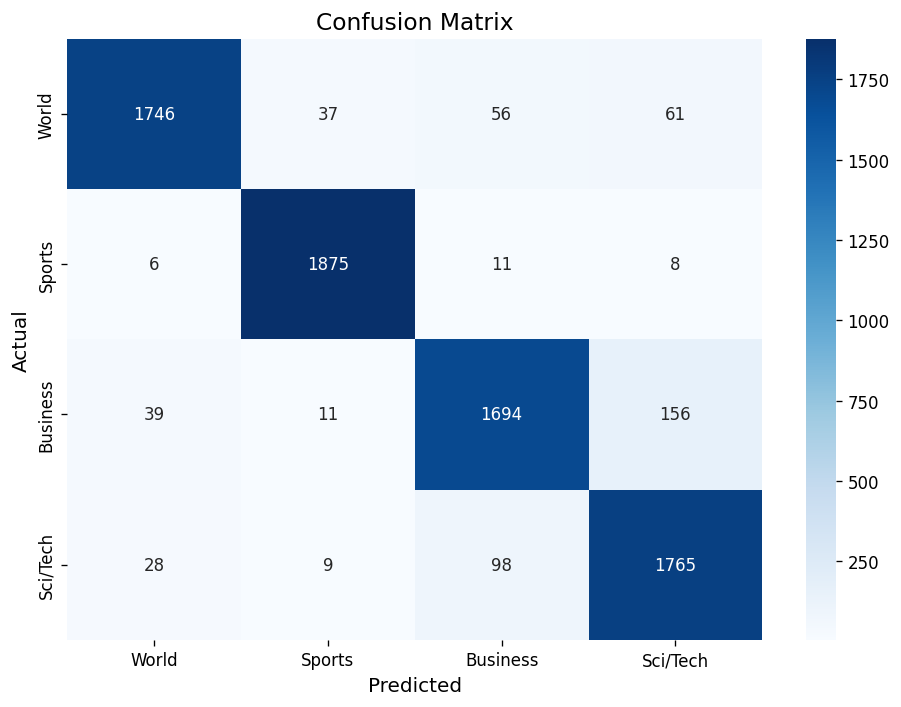

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


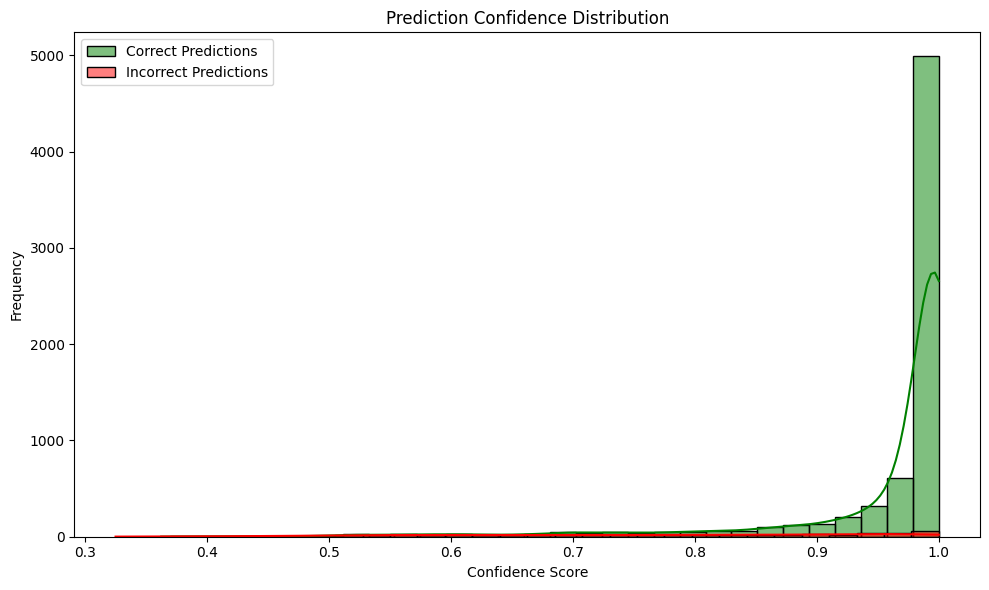

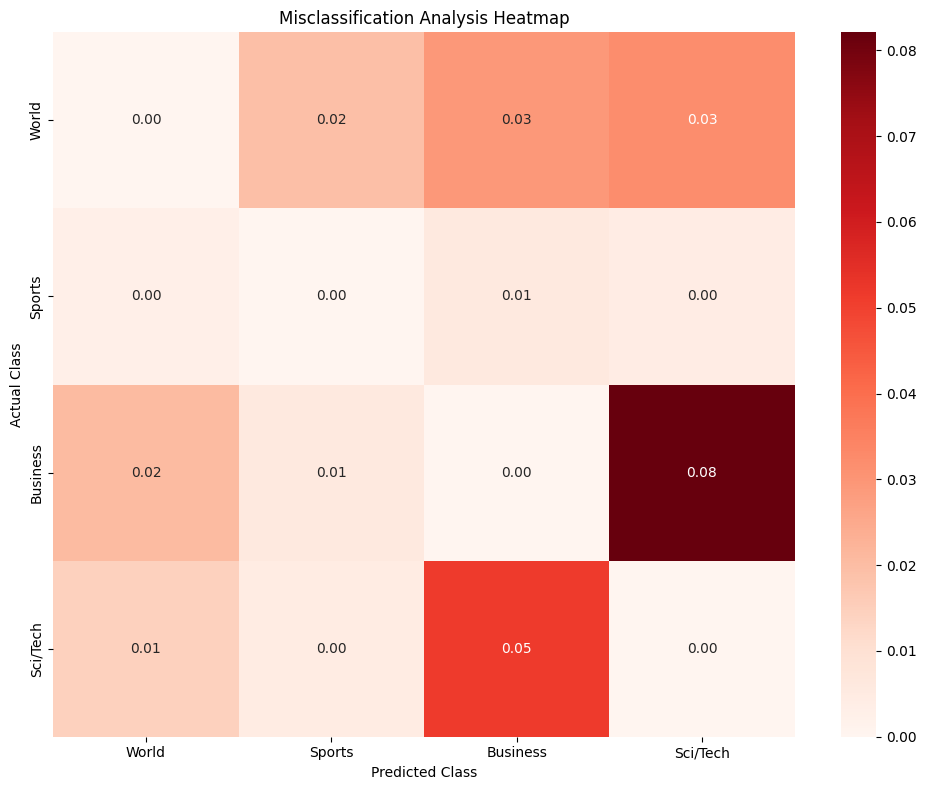

In [16]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=True with max_length=100
#model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4) model.add_dense_layer(units=128, activation='relu')
model = DynamicDeepLearningModels(max_words=10000, max_length=100, embedding_dim=100, batch_size=64, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=128, activation='relu')
model.compile_model(learning_rate=0.001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 9 

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 399s 212ms/step - accuracy: 0.7008 - loss: 0.7591 - val_accuracy: 0.8816 - val_loss: 0.3533
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 432s 231ms/step - accuracy: 0.8450 - loss: 0.4430 - val_accuracy: 0.8934 - val_loss: 0.3252
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 430s 229ms/step - accuracy: 0.8655 - loss: 0.3937 - val_accuracy: 0.8982 - val_loss: 0.3040
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 401s 214ms/step - accuracy: 0.8773 - loss: 0.3526 - val_accuracy: 0.9018 - val_loss: 0.2868
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 387s 206ms/step - accuracy: 0.8845 - loss: 0.3320 - val_accuracy: 0.9029 - val_loss: 0.2791
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 395s 211ms/step - accura

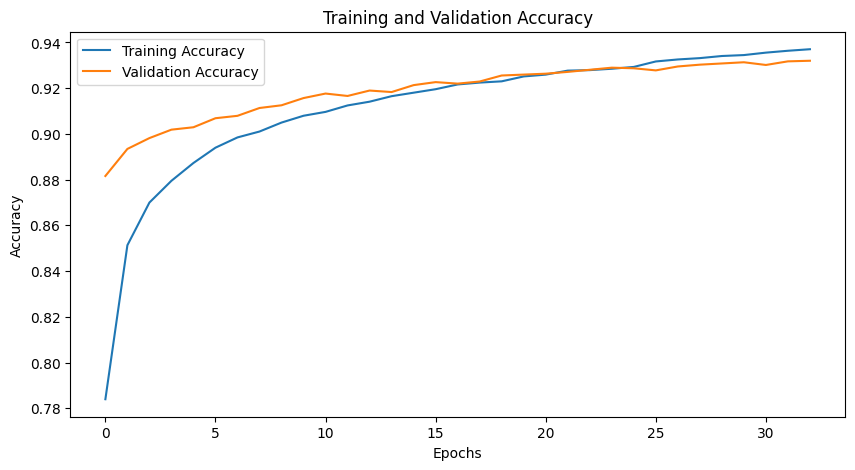

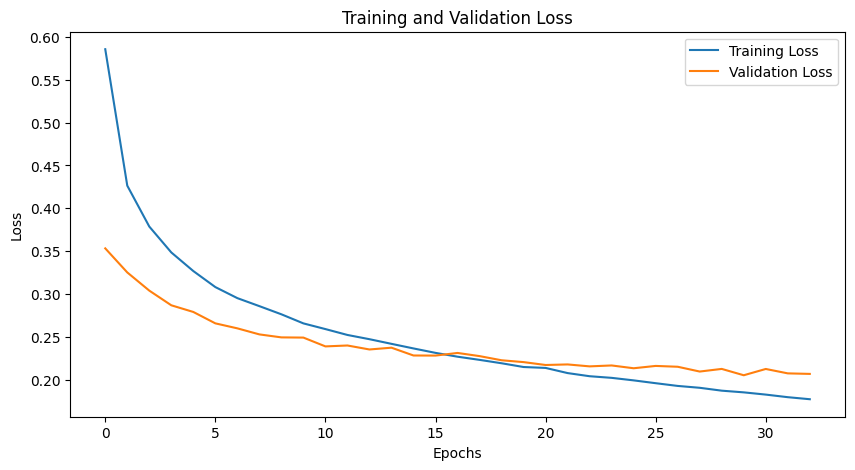

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step


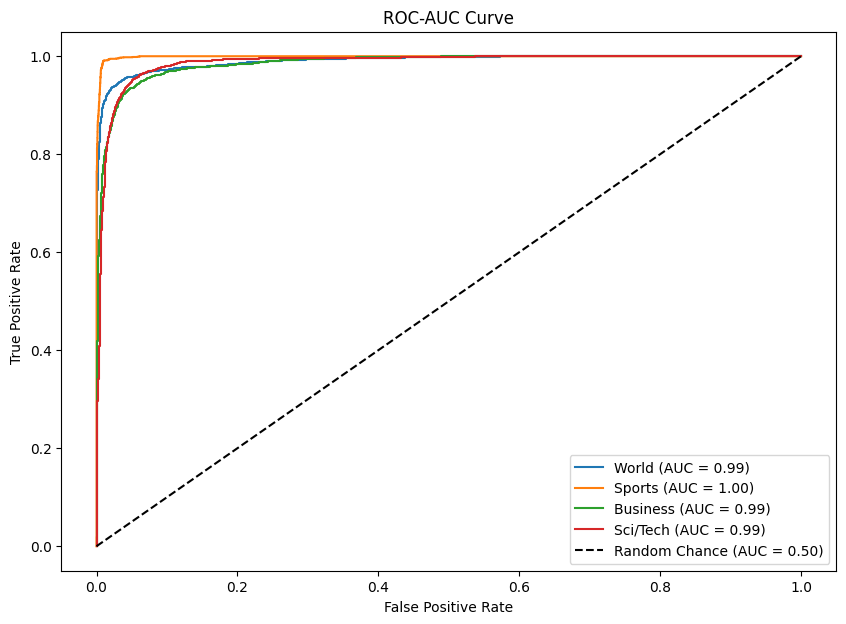

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step
              precision    recall  f1-score   support

       World       0.95      0.92      0.94      1900
      Sports       0.97      0.99      0.98      1900
    Business       0.91      0.90      0.90      1900
    Sci/Tech       0.90      0.92      0.91      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


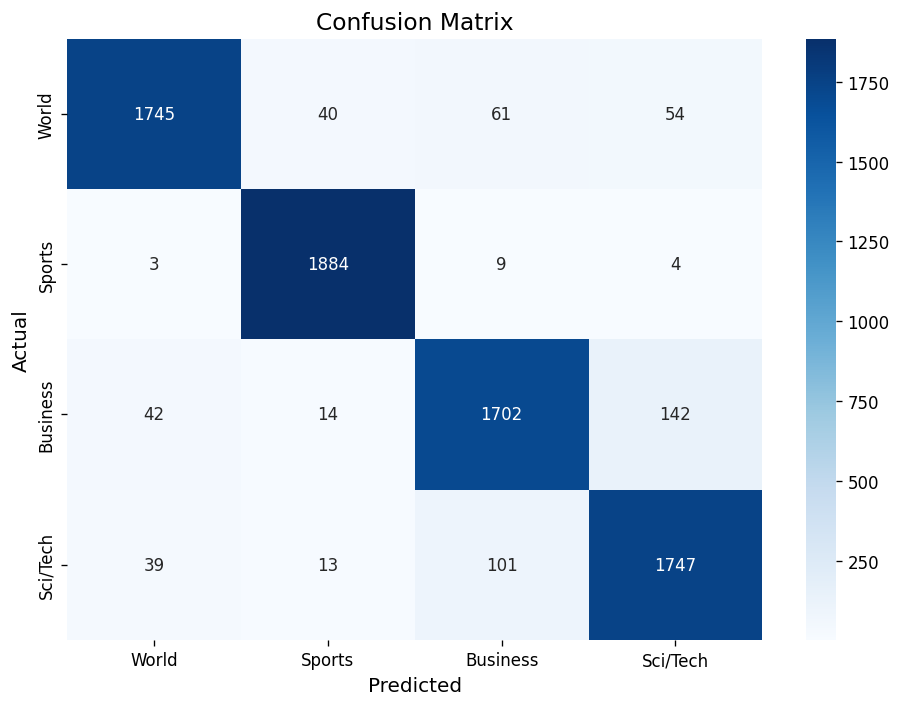

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


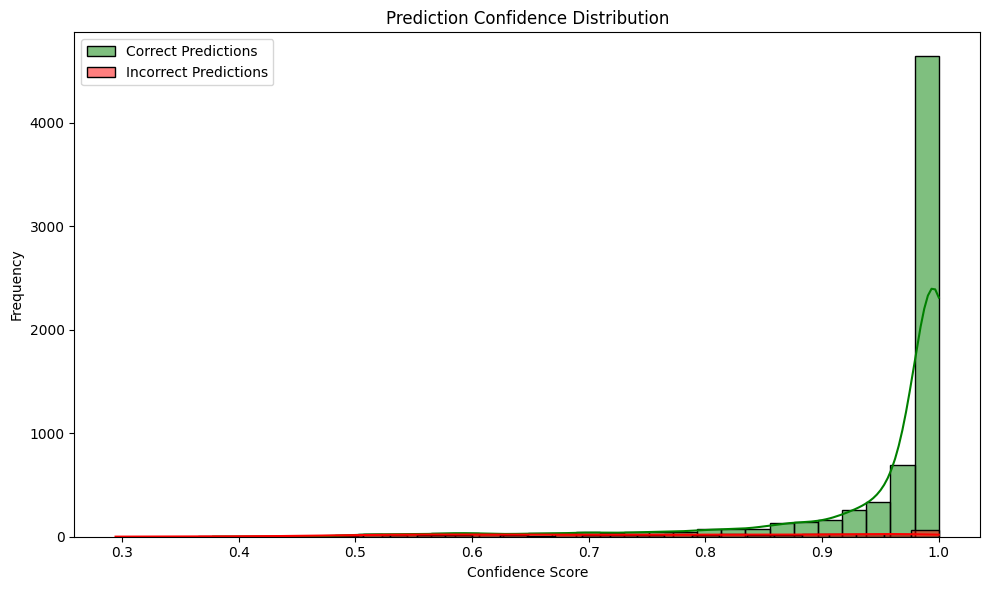

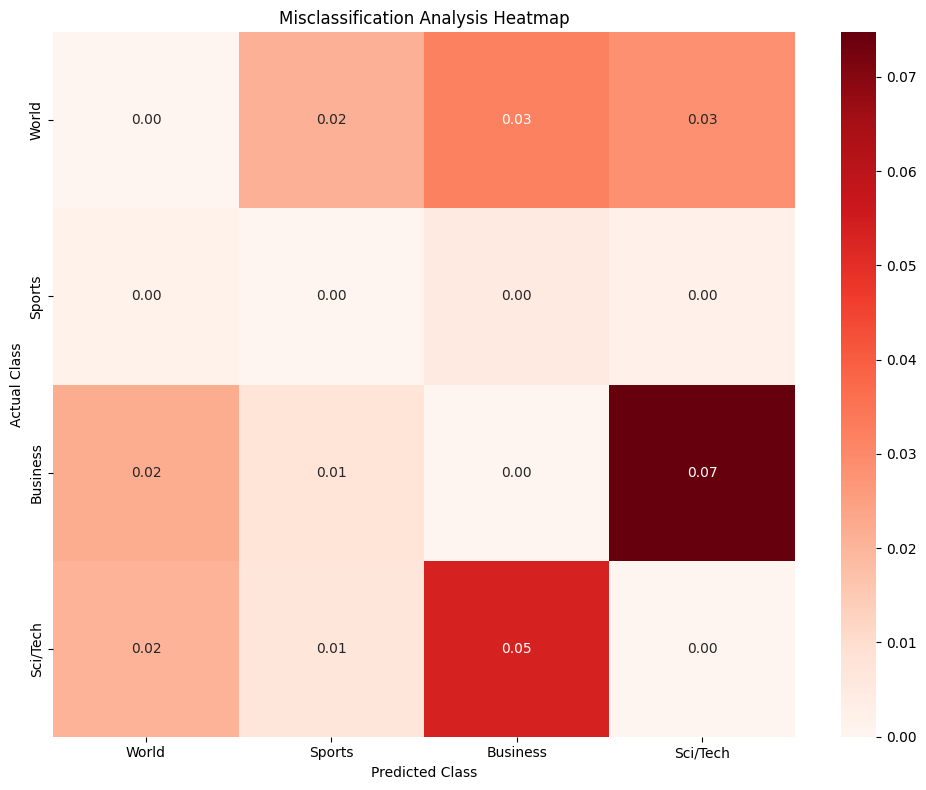

In [18]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=True with max_length=100
#model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4) model.add_dense_layer(units=128, activation='relu')
model = DynamicDeepLearningModels(max_words=10000, max_length=100, embedding_dim=100, batch_size=64, epochs=50)
#model = DynamicDeepLearningModels()
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']


glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_bilstm_layer(units=256, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=128, dropout_rate=0.3, activation='relu')
model.compile_model(learning_rate=0.0001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

### Bi-LSTM Refinement 10

Tokenizing and padding sequences...
Loading GloVe embeddings...
Loaded 400000 word vectors.
Embedding matrix created.

--- Model with Pretrained GloVe Embeddings ---
Adding pre-trained embedding layer...
Adding BiLSTM layer...
Compiling model...
Training model...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 510s 271ms/step - accuracy: 0.8080 - loss: 0.5190 - val_accuracy: 0.9130 - val_loss: 0.2587
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 408s 217ms/step - accuracy: 0.9077 - loss: 0.2726 - val_accuracy: 0.9180 - val_loss: 0.2385
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 404s 216ms/step - accuracy: 0.9200 - loss: 0.2327 - val_accuracy: 0.9204 - val_loss: 0.2303
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 404s 215ms/step - accuracy: 0.9257 - loss: 0.2138 - val_accuracy: 0.9254 - val_loss: 0.2203
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 396s 211ms/step - accuracy: 0.9320 - loss: 0.1978 - val_accuracy: 0.9284 - val_loss: 0.2162
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 392s 209ms/step - accura

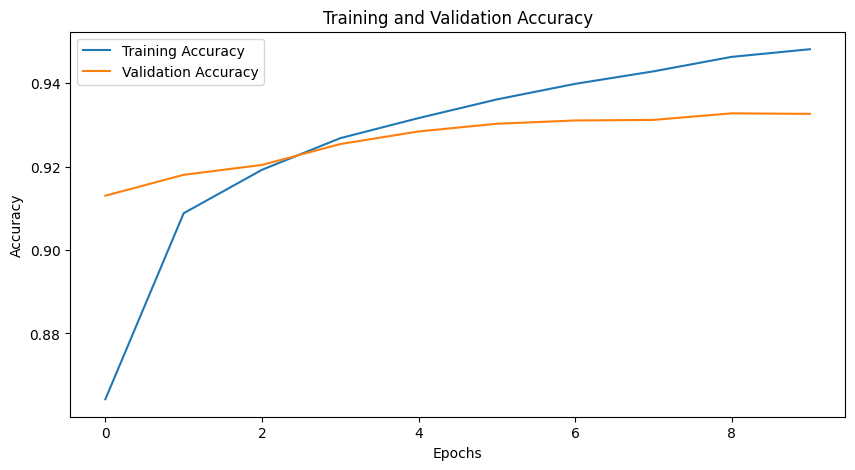

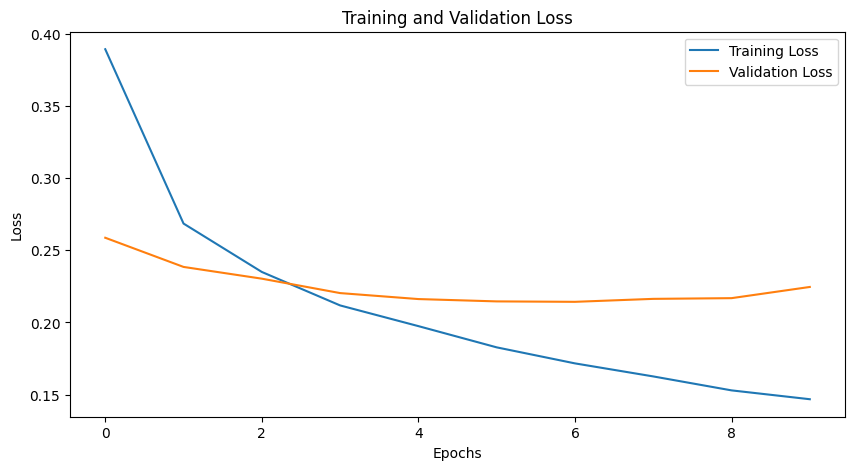

Generating ROC-AUC curves...
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step


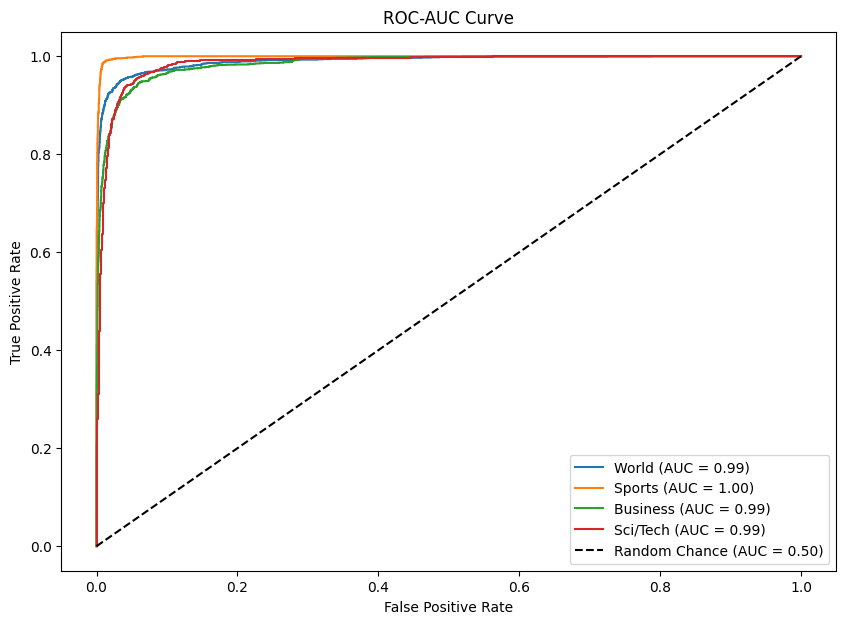

Generating classification report...
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step
              precision    recall  f1-score   support

       World       0.95      0.92      0.93      1900
      Sports       0.97      0.99      0.98      1900
    Business       0.90      0.90      0.90      1900
    Sci/Tech       0.90      0.92      0.91      1900

    accuracy                           0.93      7600
   macro avg       0.93      0.93      0.93      7600
weighted avg       0.93      0.93      0.93      7600

Generating confusion matrix...
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step
Confusion matrix saved as 'confusion_matrix.png' in the current directory.


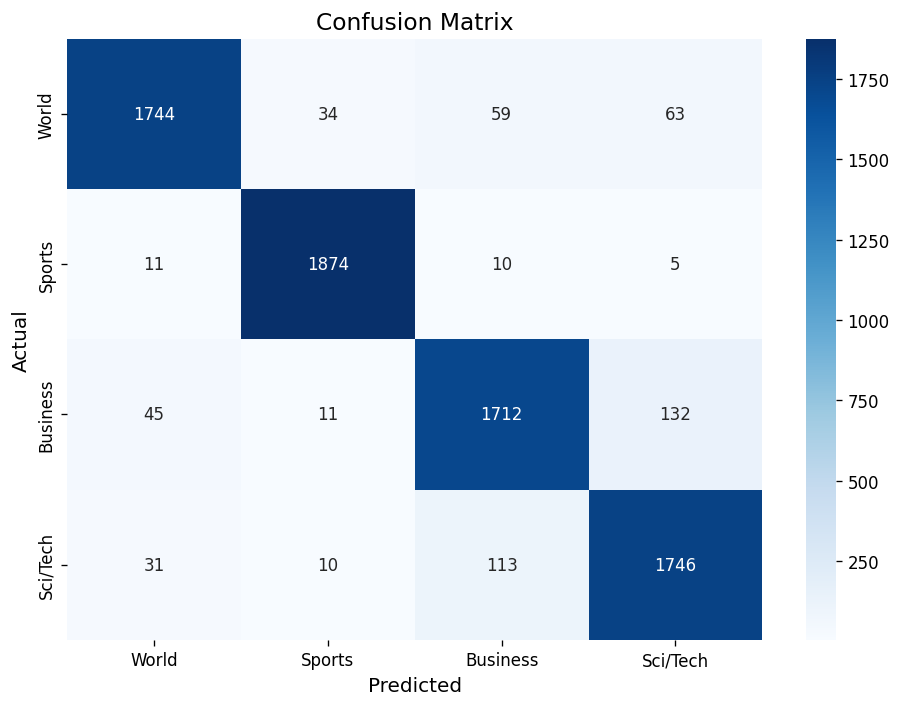

Plotting prediction confidence...
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step
Prediction confidence plot saved as 'prediction_confidence.png'.
Plotting misclassification analysis...
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step
Misclassification analysis heatmap saved as 'misclassification_analysis.png'.


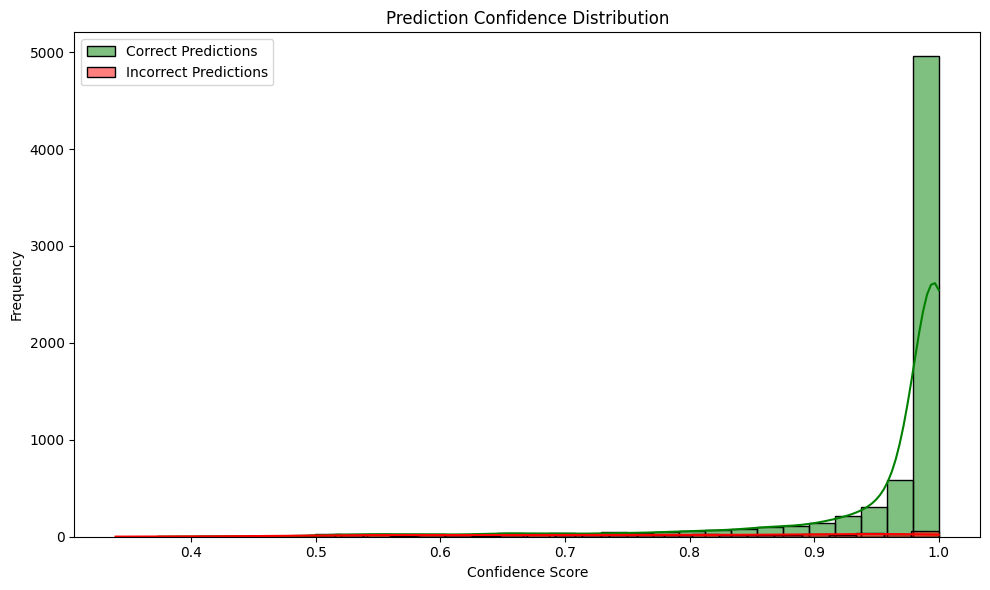

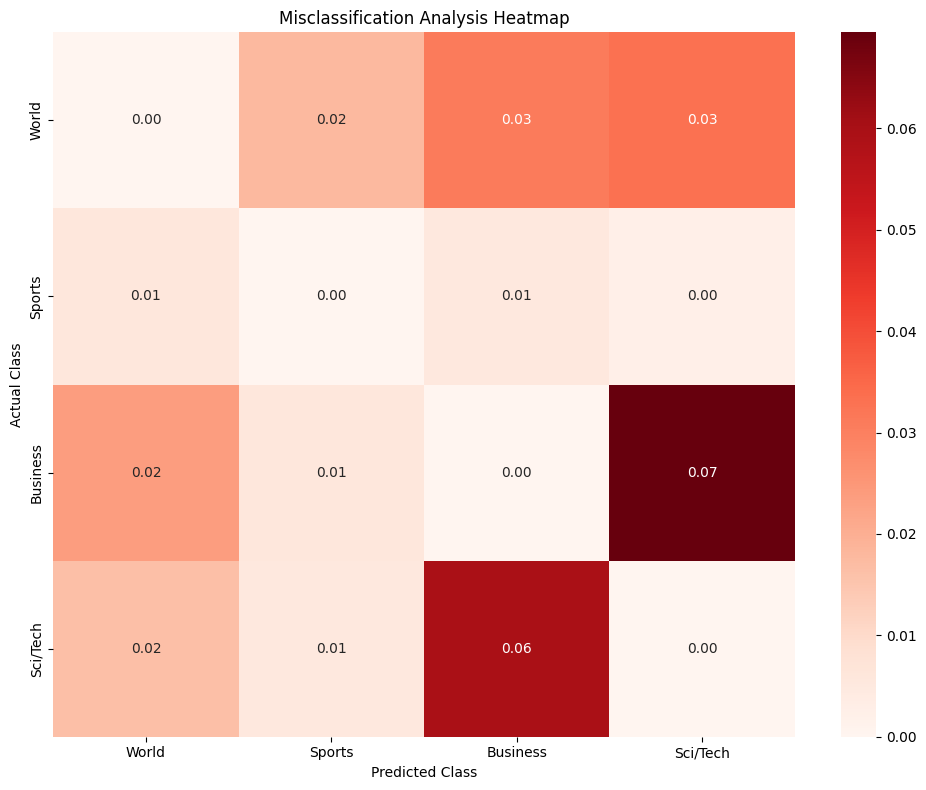

In [24]:
# Initialize the model with embedding_dim matching the GloVe file with trainable=True with max_length=100, batch size of 64
#model.add_bilstm_layer(units=512, dropout_rate=0.5, recurrent_dropout=0.4) model.add_dense_layer(units=128, activation='relu')
model = DynamicDeepLearningModels(max_words=10000, max_length=100, embedding_dim=100, batch_size=64, epochs=50)
X_train, X_test, y_train, y_test = model.preprocess(train_data, test_data)
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

glove_path = "glove.6B.100d.txt"  #ensure this is added programically or zipped with submission 
embedding_matrix = model.load_pretrained_embeddings(glove_path)
 
print("\n--- Model with Pretrained GloVe Embeddings ---")
model.add_pretrained_embedding(embedding_matrix, trainable=True)
model.add_bilstm_layer(units=128, dropout_rate=0.5, recurrent_dropout=0.4)
model.add_dense_layer(units=128, dropout_rate=0.3, activation='relu')
model.compile_model(learning_rate=0.001)
model.train(X_train, y_train, X_test, y_test)
model.evaluate(X_test, y_test)
model.plot_metrics()
model.plot_roc_auc(X_test, y_test, class_names)
model.generate_classification_report(X_test, y_test, class_names)
model.plot_confusion_matrix(X_test, y_test, class_names)
model.plot_prediction_confidence(X_test, y_test)
model.plot_misclassification_analysis(X_test, y_test, class_names)

In [28]:
##### Notebook End: Univeristy of Hull | DAIM | Student ID: 202403820 | Samuel Datubo Jaja